# EDA CASE STUDY ON LOAN ASSESSMENT

## Problem Statement :

When the consumer finance company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:


   1. Risk of Non-Approval for Creditworthy Applicants

   2. Risk of Approving Loans to Potential Defaulters.

The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:

**The client with payment difficulties:** he/she had late payment more than X days on at least one of the first Y instalments of the loan in the sample <br>
**All other cases:** All other cases when the payment is paid on time.


## Objective:

Aim is to identify the factors or features within the data that differentiates those who likely to repay the loan and those who become defaults through **Exploratory data analysis (EDA)**. This will bring out the insights hiding behind the data with which lending companies can take meaningfull decisions in future.

# Importing Neccesary Libraries to proceed with Analysis

In [6]:
import numpy as np                
import pandas as pd                
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## PART 1: Analysing the dataset "application_data.csv"

### 1.1 Data Sourcing and understanding the data

In [7]:
# load the dataset
app_d=pd.read_csv("application_data.csv")

In [8]:
# It is always good to have a look at the dataset
app_d.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [9]:
'''
Data understanding is important to know the type of data, no of null/missing values, range of data, shape of the dataset 
with which accordingly data cleansing can be done to make the dataset meaningful

'''

# Shape of the dataset(rows x cols)

app_d.shape

(307511, 122)

In [10]:
app_d.info(verbose=True) # we can able to see the range of indexes, the no of columns and its corresponding datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [11]:
# Lets see an overview on the types of data present in it for better analysis

data_type=app_d.dtypes.value_counts()
print(data_type)

float64    65
int64      41
object     16
dtype: int64


In [12]:
#Descriptive analysis on the dataset
app_d.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count               307511.000000  307511.000000  307511.000000  ...   
mean                     0.020868  -16036.995067   63815.045904  ...   
std                      0.013831    4363.988632  141275.766519  ...   
min                      0.000290  -25229.000000  -17912.000000  ...   
25%                      0.010006  -19682.000000   -2760.000000  ...   
50%                      0.018850  -15750.000000   -1213.000000  ...   
75%                      0.028663  -12413.000000    -289.000000  ...   
max                      0.072508   -7489.000000  365243.000000  ...   

       FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count     307511.000000     307511.000000     307511.000000     307511.000000   
mean           0.008130          0.000595          0.000507          0.000335   
std            0.089798          0.024387          0.022518          0.018299   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000                    0.000000  
25%              

#### Understanding on the dataset:
    1. It has 307511 rows and 122 columns
    2. It has 3 types of data - float, int and object
    3. The data has negative values in few columns.

### 1.2 Data cleaning and Manipulation

In [77]:
# Lets have look at the columns present in the dataframe

app_d.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'YEARS_BEGINEXPLUATATION_AVG', 'FLOOR

In [13]:
'''
Data cleaning is important to make the dataset meaningful by actioning on the outliers, manipulating the missing values, 
removing the unnecessary columns, correcting the data types accordingly.

''' 

#checking the percentage of null values in each column to get an insight
null_d=(app_d.isnull().sum()/len(app_d))*100
print(null_d[null_d.values>50.0])
print()
print('No of columns with null percentage greater than 50 :',len(null_d[null_d.values>50.0]))

OWN_CAR_AGE                 65.990810
EXT_SOURCE_1                56.381073
APARTMENTS_AVG              50.749729
BASEMENTAREA_AVG            58.515956
YEARS_BUILD_AVG             66.497784
COMMONAREA_AVG              69.872297
ELEVATORS_AVG               53.295980
ENTRANCES_AVG               50.348768
FLOORSMIN_AVG               67.848630
LANDAREA_AVG                59.376738
LIVINGAPARTMENTS_AVG        68.354953
LIVINGAREA_AVG              50.193326
NONLIVINGAPARTMENTS_AVG     69.432963
NONLIVINGAREA_AVG           55.179164
APARTMENTS_MODE             50.749729
BASEMENTAREA_MODE           58.515956
YEARS_BUILD_MODE            66.497784
COMMONAREA_MODE             69.872297
ELEVATORS_MODE              53.295980
ENTRANCES_MODE              50.348768
FLOORSMIN_MODE              67.848630
LANDAREA_MODE               59.376738
LIVINGAPARTMENTS_MODE       68.354953
LIVINGAREA_MODE             50.193326
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAREA_MODE          55.179164
APARTMENTS_M

In [14]:
'''There are 41 columns with null percentage greater than 50%. Since half of the values are null, Imputing these columns 
with values will lead to discrepancy, So it is better to drop these columns'''

app_d=app_d.drop(null_d[null_d.values>50.0].index,axis=1)
app_d.shape

(307511, 81)

To display all the columns and rows with breaking:

In [15]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [16]:
'''Lets find the columns with null value less than 13% and decide whether to impute or drop'''

null_d1=(app_d.isnull().sum()/len(app_d))*100
null_d1[null_d1.values<13.0].sort_values(ascending=False)

NAME_TYPE_SUITE                0.420148
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
EXT_SOURCE_2                   0.214626
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
DAYS_LAST_PHONE_CHANGE         0.000325
FLAG_DOCUMENT_4                0.000000
FLAG_DOCUMENT_3                0.000000
FLAG_DOCUMENT_2                0.000000
SK_ID_CURR                     0.000000
FLAG_DOCUMENT_6                0.000000
ORGANIZATION_TYPE              0.000000
LIVE_CITY_NOT_WORK_CITY        0.000000
FLAG_DOCUMENT_5                0.000000
FLAG_DOCUMENT_8                0.000000
FLAG_DOCUMENT_7                0.000000
REG_CITY_NOT_LIVE_CITY         0.000000
FLAG_DOCUMENT_9                0.000000
FLAG_DOCUMENT_10               0.000000
FLAG_DOCUMENT_11               0.000000
FLAG_DOCUMENT_12               0.000000


In [17]:
'''Lets analyse NAME_TYPE_SUITE column which has null value 0.42%'''

app_d.NAME_TYPE_SUITE.describe()

count            306219
unique                7
top       Unaccompanied
freq             248526
Name: NAME_TYPE_SUITE, dtype: object

In [18]:
app_d.NAME_TYPE_SUITE.value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

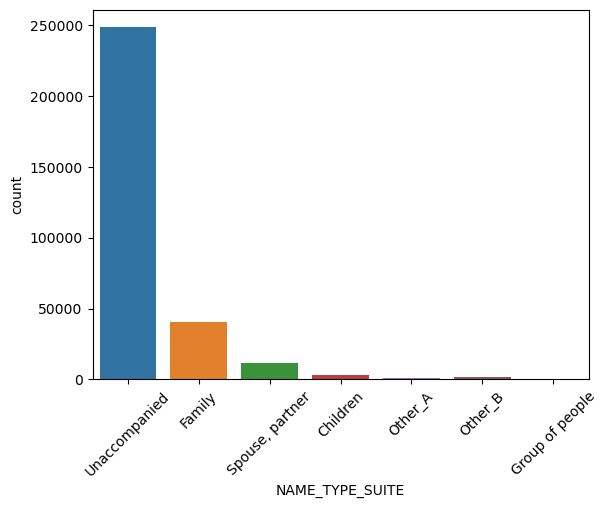

In [136]:
sns.countplot(data=app_d,x='NAME_TYPE_SUITE')
plt.xticks(rotation=45)
plt.show()

**Inference from the above analysis:**<br>
   1. NAME_TYPE_SUITE column is a categorical column.
   2. From the above plot, we can able to see that 'UNACCOMPANIED' category has more number of loan seekers.
   3. It would be appropriate, if we impute this column with Mode ie.,'UNACCOMPANIED' 

In [19]:
''' Lets analyse the column OBS_30_CNT_SOCIAL_CIRCLE which has null value 0.33%'''

app_d.OBS_30_CNT_SOCIAL_CIRCLE.value_counts()

0.0      163910
1.0       48783
2.0       29808
3.0       20322
4.0       14143
5.0        9553
6.0        6453
7.0        4390
8.0        2967
9.0        2003
10.0       1376
11.0        852
12.0        652
13.0        411
14.0        258
15.0        166
16.0        133
17.0         88
18.0         46
19.0         44
20.0         30
21.0         29
22.0         22
23.0         15
25.0         11
24.0         11
27.0          5
26.0          3
30.0          2
28.0          1
29.0          1
47.0          1
348.0         1
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: int64

In [21]:
app_d.OBS_30_CNT_SOCIAL_CIRCLE.describe()

count    306490.000000
mean          1.422245
std           2.400989
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [22]:
# Finding mode of the column OBS_30_CNT_SOCIAL_CIRCLE

app_d.OBS_30_CNT_SOCIAL_CIRCLE.mode()[0]

0.0

<Axes: >

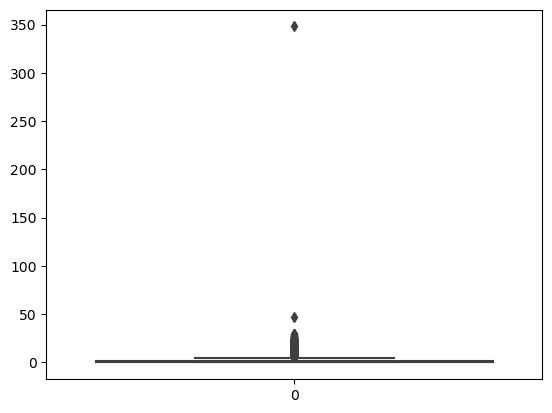

In [23]:
sns.boxplot(app_d.OBS_30_CNT_SOCIAL_CIRCLE)

**Inference from the above analysis:**<br>
   1. From the above plot it can be see that there are 2 outliers at 47 and 348
   2. Mean value is 1.422245
   3. Mode and median value of this column is 0.00
   4. Since percentage of null values of this column is less, imputing this with median or mode will be suitable.

In [24]:
''' Lets analyse the column DEF_30_CNT_SOCIAL_CIRCLE which has 0.33% null percentage'''

app_d.DEF_30_CNT_SOCIAL_CIRCLE.value_counts()

#From here it can be seen that 0.0 is the most recurring value and the outlier would be at 34.0

0.0     271324
1.0      28328
2.0       5323
3.0       1192
4.0        253
5.0         56
6.0         11
7.0          1
34.0         1
8.0          1
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: int64

<Axes: xlabel='DEF_30_CNT_SOCIAL_CIRCLE', ylabel='count'>

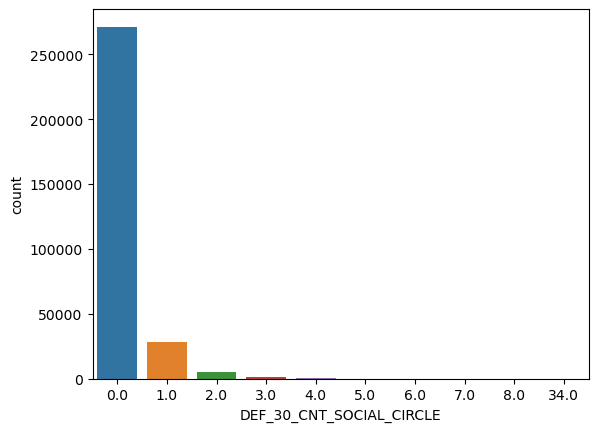

In [25]:
sns.countplot(data=app_d,x='DEF_30_CNT_SOCIAL_CIRCLE')

In [26]:
app_d.DEF_30_CNT_SOCIAL_CIRCLE.describe()

count    306490.000000
mean          0.143421
std           0.446698
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          34.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

<Axes: >

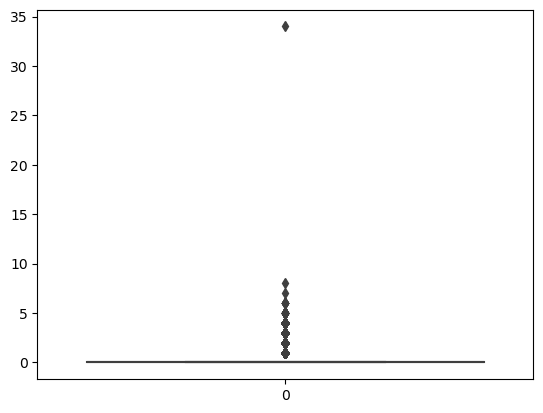

In [27]:
sns.boxplot(app_d.DEF_30_CNT_SOCIAL_CIRCLE)

**Inference from the above analysis:**<br>
   1. From the above plot it can be see that there is an outliers at 34
   2. Mean value is 0.143421
   3. Mode and median value of this column is 0.00
   4. Since percentage of null values of this column is less, imputing this with median or mode will be suitable.

In [28]:
'''Let analyse the column AMT_ANNUITY with null percentage 0.003902'''

app_d.AMT_ANNUITY.describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

<Axes: >

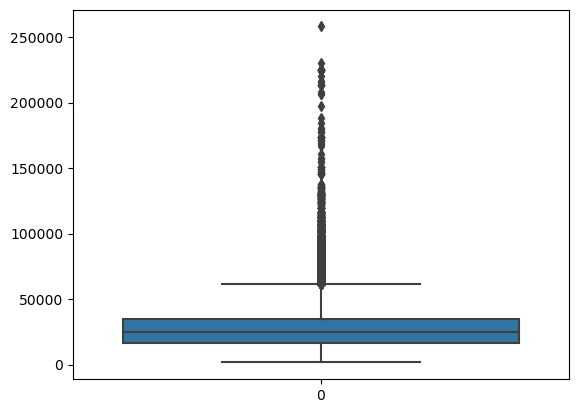

In [29]:
sns.boxplot(app_d.AMT_ANNUITY)

**Inference from the above analysis:**<br>
   1. This column has large number of outliers which is evident from the above plot, so it will inappropriate to use mean value for imputation.
   2. There is huge difference between max and min values.
   3. Hence it would be appropriate if we impute with median value.

In [30]:
#Lets analyse the column CNT_FAM_MEMBERS with null percentage 0.000650

# column description - How many family members does client have

app_d.CNT_FAM_MEMBERS.value_counts()

2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
12.0         2
20.0         2
16.0         2
13.0         1
15.0         1
11.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

<Axes: xlabel='CNT_FAM_MEMBERS', ylabel='count'>

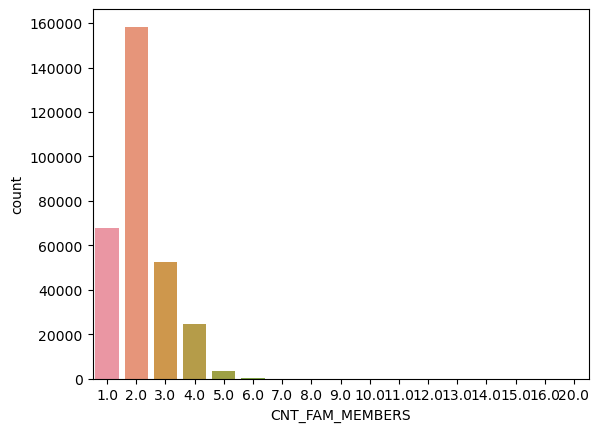

In [31]:
sns.countplot(data=app_d,x='CNT_FAM_MEMBERS')

#It is evident that mode ie, mostly majority of loan seekers have 2 members in their family

In [32]:
app_d.CNT_FAM_MEMBERS.mode()[0]

2.0

In [33]:
app_d.CNT_FAM_MEMBERS.describe()

count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

<Axes: >

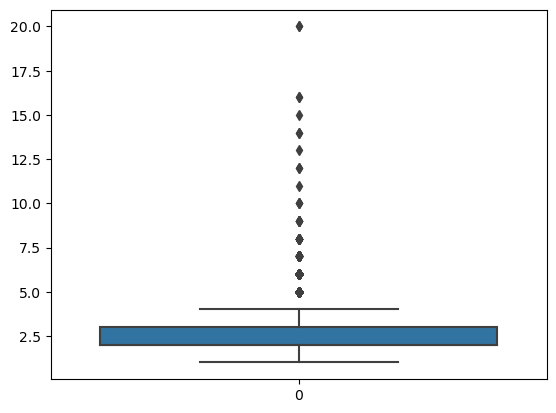

In [34]:
sns.boxplot(app_d.CNT_FAM_MEMBERS)

**Inference from the above analysis:**<br>
   1. This column has some outliers with mean 2.152665.
   2. There is huge difference between max and min values.
   3. Median and mode stays 2.0
   4. It wouldbe appropriate if we impute with median.

## 1.3 Inspecting the data types of all the columns 

In [35]:
app_d.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

In [36]:
app_d.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64
FLAG_CONT_MOBILE                  int64


### Standardizing the negative values

In [37]:
# It is visible that few numerical columns have negative values which ideally should not have
neg_cols = ["DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION", "DAYS_ID_PUBLISH", "DAYS_LAST_PHONE_CHANGE"]
app_d[neg_cols].head()

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
0       -9461           -637            -3648.0            -2120   
1      -16765          -1188            -1186.0             -291   
2      -19046           -225            -4260.0            -2531   
3      -19005          -3039            -9833.0            -2437   
4      -19932          -3038            -4311.0            -3458   

   DAYS_LAST_PHONE_CHANGE  
0                 -1134.0  
1                  -828.0  
2                  -815.0  
3                  -617.0  
4                 -1106.0

In [38]:
app_d[neg_cols].describe()

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
count  307511.000000  307511.000000      307511.000000    307511.000000   
mean   -16036.995067   63815.045904       -4986.120328     -2994.202373   
std      4363.988632  141275.766519        3522.886321      1509.450419   
min    -25229.000000  -17912.000000      -24672.000000     -7197.000000   
25%    -19682.000000   -2760.000000       -7479.500000     -4299.000000   
50%    -15750.000000   -1213.000000       -4504.000000     -3254.000000   
75%    -12413.000000    -289.000000       -2010.000000     -1720.000000   
max     -7489.000000  365243.000000           0.000000         0.000000   

       DAYS_LAST_PHONE_CHANGE  
count           307510.000000  
mean              -962.858788  
std                826.808487  
min              -4292.000000  
25%              -1570.000000  
50%               -757.000000  
75%               -274.000000  
max                  0.000000

In [39]:
# Converting all the negative values to positive values using abs() function

app_d[neg_cols]=abs(app_d[neg_cols])

In [40]:
app_d[neg_cols].head()

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
0        9461            637             3648.0             2120   
1       16765           1188             1186.0              291   
2       19046            225             4260.0             2531   
3       19005           3039             9833.0             2437   
4       19932           3038             4311.0             3458   

   DAYS_LAST_PHONE_CHANGE  
0                  1134.0  
1                   828.0  
2                   815.0  
3                   617.0  
4                  1106.0

In [41]:
# Converting the 'DAYS_BIRTH' from days to years and storing it in a new column:
app_d['AGE_YRS']=app_d['DAYS_BIRTH']/365
app_d['AGE_YRS'].head()

0    25.920548
1    45.931507
2    52.180822
3    52.068493
4    54.608219
Name: AGE_YRS, dtype: float64

In [42]:
#Binning the 'AGE' column to make our analysis easier and storing it in a new column

app_d['Age_group']=pd.cut(app_d.AGE_YRS,[0,20,25,30,35,40,45,50,55,60,100],labels=["0-20","20-25","25-30","30-35","35-40","40-45","45-50","50-55","55-60","60 Above"])

<Axes: >

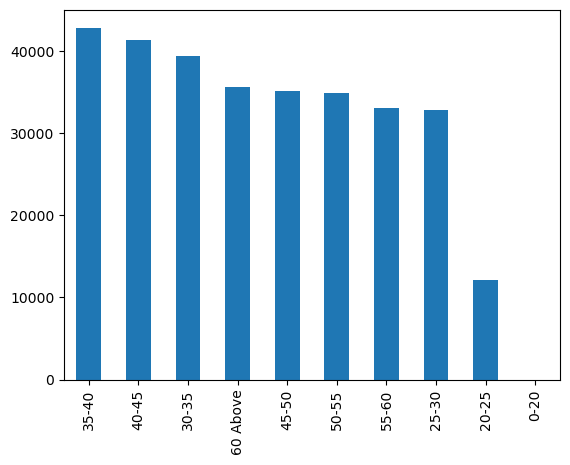

In [43]:
# Plotting Bar graph for better visualization
# From this we could see that people aged between 35 to 40 are more in number for applying loans
app_d['Age_group'].value_counts().plot.bar()

In [44]:
# Converting the 'DAYS_EMPLOYED' from days to years and storing it in a new column:

app_d['EMPLOYED_YRS']=app_d['DAYS_EMPLOYED']/365
app_d['EMPLOYED_YRS'].head()

0    1.745205
1    3.254795
2    0.616438
3    8.326027
4    8.323288
Name: EMPLOYED_YRS, dtype: float64

In [45]:
# Binning the column EMPLOYED_YRS and storing it in a new column Employment_yrs_group

app_d['Employment_yrs_group']=pd.cut(app_d.EMPLOYED_YRS,[0,5,10,15,20,25,30,50],labels=["0-5","5-10","10-15","15-20","20-25","25-30","30 Above"])
app_d['Employment_yrs_group'].value_counts(normalize=True)*100

0-5         54.061911
5-10        25.729074
10-15       10.926289
15-20        4.302854
20-25        2.476054
25-30        1.311996
30 Above     1.191822
Name: Employment_yrs_group, dtype: float64

In [46]:
app_d['Employment_yrs_group'].head()

0     0-5
1     0-5
2     0-5
3    5-10
4    5-10
Name: Employment_yrs_group, dtype: category
Categories (7, object): ['0-5' < '5-10' < '10-15' < '15-20' < '20-25' < '25-30' < '30 Above']

<Axes: ylabel='Employment_yrs_group'>

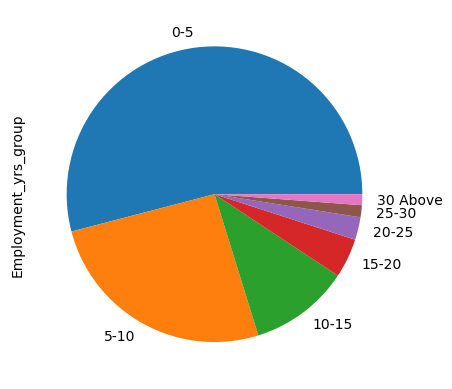

In [47]:
# From the below plot we could see that peolpe who applied for loans in large number are experienced between 0 to 5 years

(app_d['Employment_yrs_group'].value_counts(normalize=True)*100).plot.pie()

In [48]:
app_d.shape

(307511, 85)

### 1.4 Analyzing the Outliers

In [49]:
# Lets find the columns which has higher difference between 75th percentile nd maximum value

app_d.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868   16036.995067   67724.742149   
std                      0.013831    4363.988632  139443.751806   
min                      0.000290    7489.000000       0.000000   
25%                      0.010006   12413.000000     933.000000   
50%                      0.018850   15750.000000    2219.000000   
75%                      0.028663   19682.000000    5707.000000   
max                      0.072508   25229.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH     FLAG_MOBIL  FLAG_EMP_PHONE  \
count      307511.000000    307511.000000  307511.000000   307511.000000   
mean         4986.120328      2994.202373       0.999997        0.819889   
std          3522.886321      1509.450419       0.001803        0.384280   
min             0.000000         0.000000       0.000000        0.000000   
25%          2010.000000      1720.000000       1.000000        1.000000   
50%          4504.000000      3254.000000       1.000000        1.000000   
75%          7479.500000      4299.000000       1.000000        1.000000   
max         24672.000000      7197.000000       1.000000        1.000000   

       FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE     FLAG_EMAIL  \
count    307511.000000     307511.000000  307511.000000  307511.000000   
mean          0.199368          0.998133       0.281066       0.056720   
std           0.399526          0.043164       0.449521       0.231307   
min           0.000000          0.000000       0.000000       0.000000   
25%           0.000000          1.000000       0.000000       0.000000   
50%           0.000000          1.000000       0.000000       0.000000   
75%           0.000000          1.000000       1.000000       0.000000   
max           1.000000          1.000000       1.000000       1.000000   

       CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
count    307509.000000         307511.000000                307511.000000   
mean          2.152665              2.052463                     2.031521   
std           0.910682              0.509034                     0.502737   
min           1.000000              1.000000                     1.000000   
25%           2.000000              2.000000                     2.000000   
50%           2.000000              2.000000                     2.000000   
75%           3.000000              2.000000                     2.000000   
max          20.000000              3.000000                     3.000000   

       HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
count            307511.000000               307511.000000   
mean                 12.063419                    0.015144   
std                   3.26583

In [50]:
# lETS ANALYSE SOME 5 COLUMNS WHICH SEEMS TO HAVE OUTLIERS

outliers=["CNT_CHILDREN", "AMT_ANNUITY", "AMT_GOODS_PRICE","AGE_YRS", "EMPLOYED_YRS"]

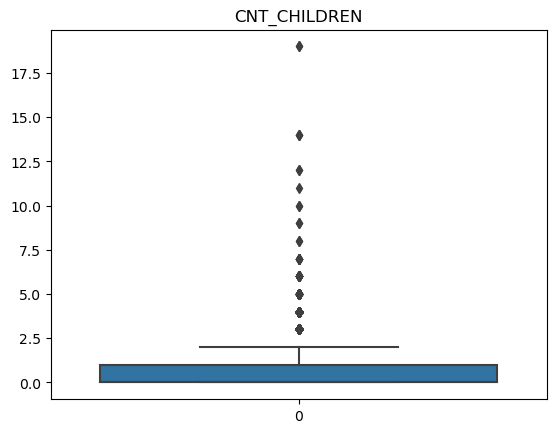

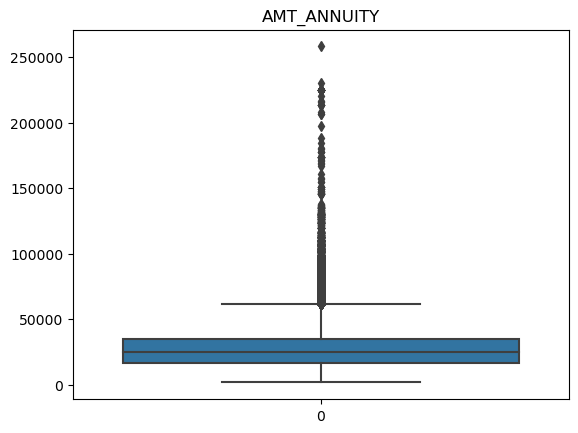

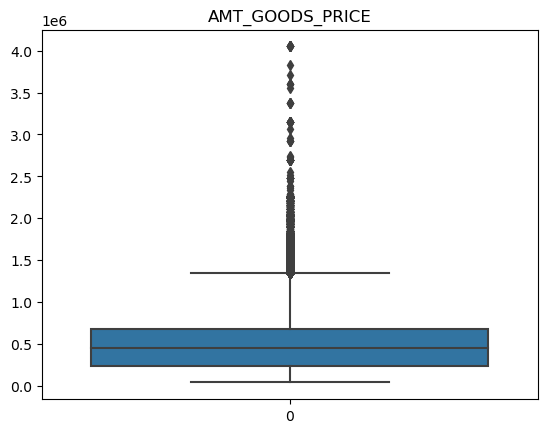

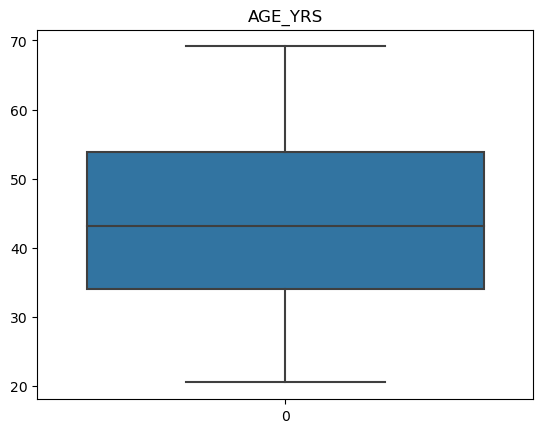

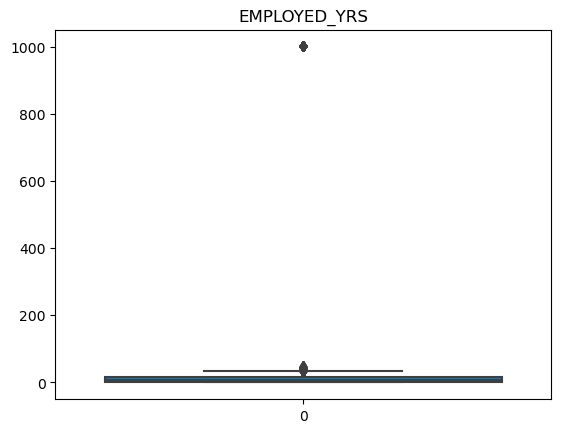

In [51]:
# I have used for loop to plot box plots 
for i in outliers:
    plt.title(i)
    sns.boxplot(app_d[i])
    plt.show()

### Treating Outliers:
    My suggestion on how to treat outlier is either dropping the outliers or treating them with IQR. If outliers are more   likely due to data entry errors or if maintaining the original distribution of data is crucial, then it is better to      remove the outliers. If we consider that outliers are still a valuable data point to be considered and to avoid data    loss then it is good to replace the outliers with lower bound and upper bound values.
    
    IQR = Q3 - Q1
    Where, Q3 is 75th percentile
           Q1 is 25th percentile
    Upper bound = Q3 + 1.5 * IQR
    Lower bound = Q1 - 1.5 * IQR
    
If the data point is above upper bound then replace it with upper bound value. Else if the data point is below the lower bound then replace it with lower bound value.

In [52]:
# Lets do binning for the column AMT_INCOME_TOTAL and store it in a new column for our analysis
ranges = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
range_name = ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

app_d['INCOME_RANGE']=pd.cut(app_d['AMT_INCOME_TOTAL'],ranges,labels=range_name)

# 1.4. DATA ANALYSIS

## 1.4.1 Univariate analysis on categorical columns

In [53]:
app_d.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461            637             3648.0   
1                    0.003541       16765           1188             1186.0   
2                    0.010032       19046            225             4260.0   
3                    0.008019       19005           3039             9833.0   
4                    0.028663       19932           3038             4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             2120           1               1                0   
1              291           1               1                0   
2             2531           1               1                1   
3             2437           1               1                0   
4             3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

### Imbalance of the target column

In [54]:
app_d.TARGET.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

<Axes: ylabel='TARGET'>

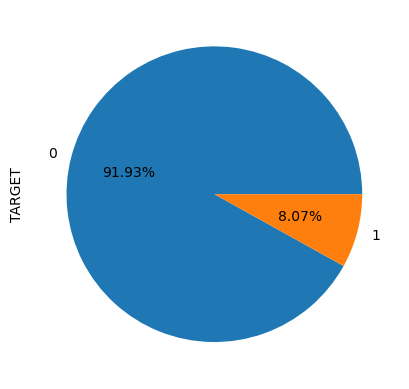

In [55]:
app_d.TARGET.value_counts(normalize=True).plot.pie(autopct='%.2f%%')

In [56]:
# Lets divide the data frame into 2 sub data frames.
# Dataframe 1: app_d_0 = Non defaulters
# Dataframe 2: app_d_1 = Defaulters

app_d_0 = app_d.loc[app_d["TARGET"]==0]
app_d_1 = app_d.loc[app_d["TARGET"]==1]

#### Analysing the column INCOME_RANGE

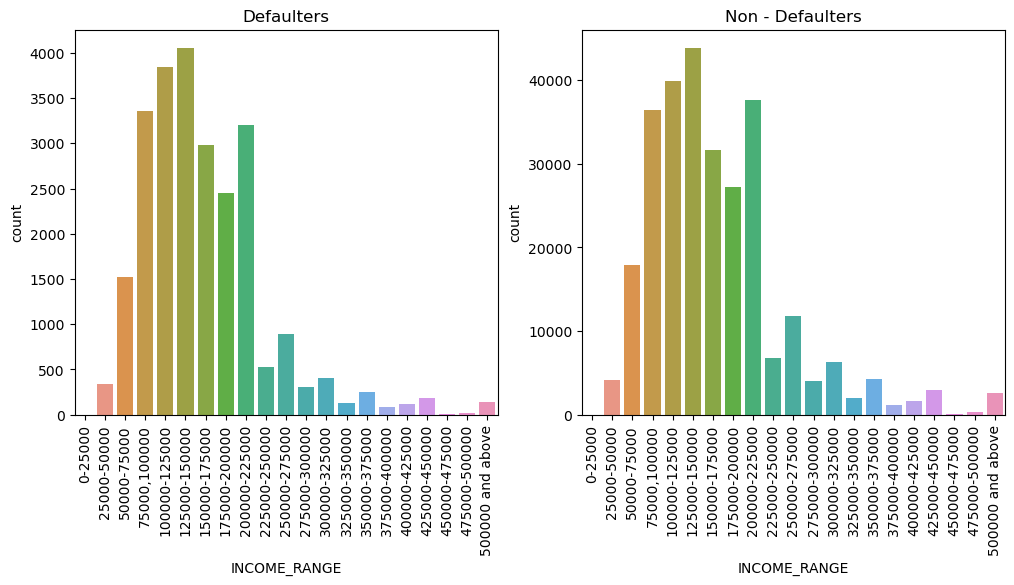

In [57]:
# Plotting count plot on the column INCOME_RANGE 
plt.figure(figsize = (12,5))

plt.subplot(1,2,1)
sns.countplot(data=app_d_1,x='INCOME_RANGE')
plt.title('Defaulters')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(data=app_d_0,x='INCOME_RANGE')
plt.title('Non - Defaulters')

plt.xticks(rotation=90)
plt.show()

### Inference from the above analysis on 'INCOME_RANGE' column
   1. The analysis suggests that individuals with an income range of 10,000 to 150000 constitute a substantial portion in both defaulter and non-defaulter groups

#### Analysing the column NAME_CONTRACT_TYPE

In [58]:
app_d_1.NAME_CONTRACT_TYPE.value_counts()

Cash loans         23221
Revolving loans     1604
Name: NAME_CONTRACT_TYPE, dtype: int64

In [59]:
app_d_0.NAME_CONTRACT_TYPE.value_counts()

Cash loans         255011
Revolving loans     27675
Name: NAME_CONTRACT_TYPE, dtype: int64

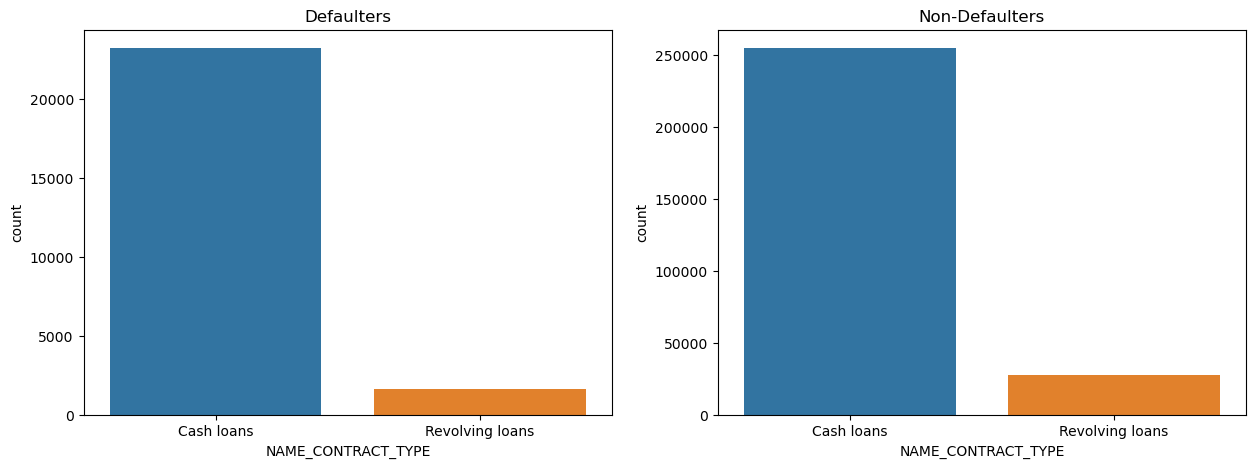

In [60]:
#Plotting a count plot on the column NAME_CONTRACT_TYPE

plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.title("Defaulters")
sns.countplot(data=app_d_1,x='NAME_CONTRACT_TYPE')



plt.subplot(1,2,2)
plt.title("Non-Defaulters")
sns.countplot(data=app_d_0,x='NAME_CONTRACT_TYPE')
plt.show()

### Inference from the above analysis on 'NAME_CONTRACT_TYPE' column
     The significantly lower number of defaulters compared to non-defaulters in the cash loans category implies that, while cash loans are associated with some defaults, the majority of individuals with cash loans are not defaulting. The number of defaulters in the revolving loans category is lower than in cash loans. However, the proportion of defaulters to non-defaulters appears relatively higher in revolving loans, indicating a comparatively higher risk associated with this type of loan.

#### Analysing the column CODE_GENDER

In [61]:
app_d_1['CODE_GENDER'].value_counts()

F    14170
M    10655
Name: CODE_GENDER, dtype: int64

In [62]:
app_d_0['CODE_GENDER'].value_counts()

F      188278
M       94404
XNA         4
Name: CODE_GENDER, dtype: int64

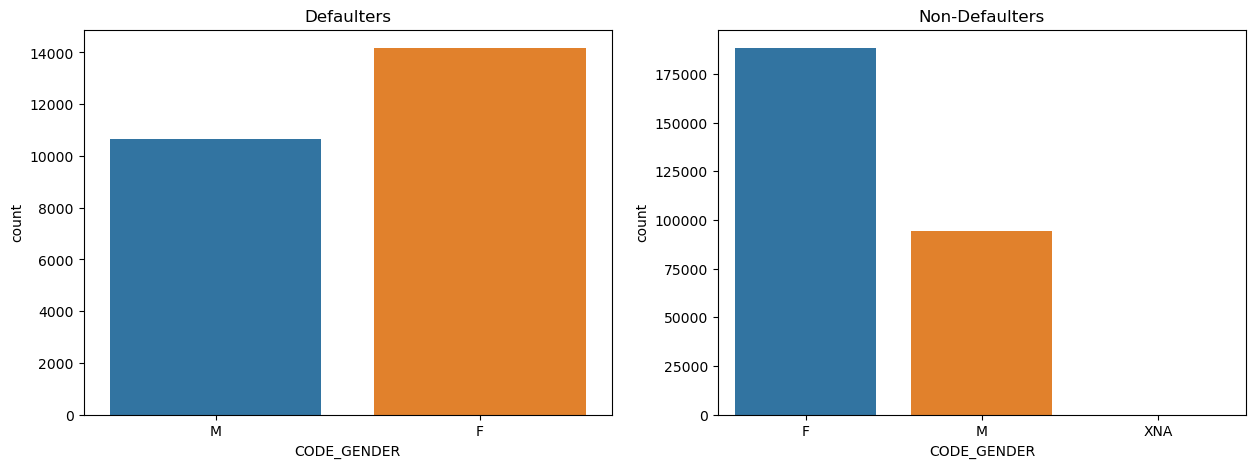

In [63]:
#Plotting a count plot on the column CODE_GENDER

plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.title("Defaulters")
sns.countplot(data=app_d_1,x='CODE_GENDER')



plt.subplot(1,2,2)
plt.title("Non-Defaulters")
sns.countplot(data=app_d_0,x='CODE_GENDER')
plt.show()

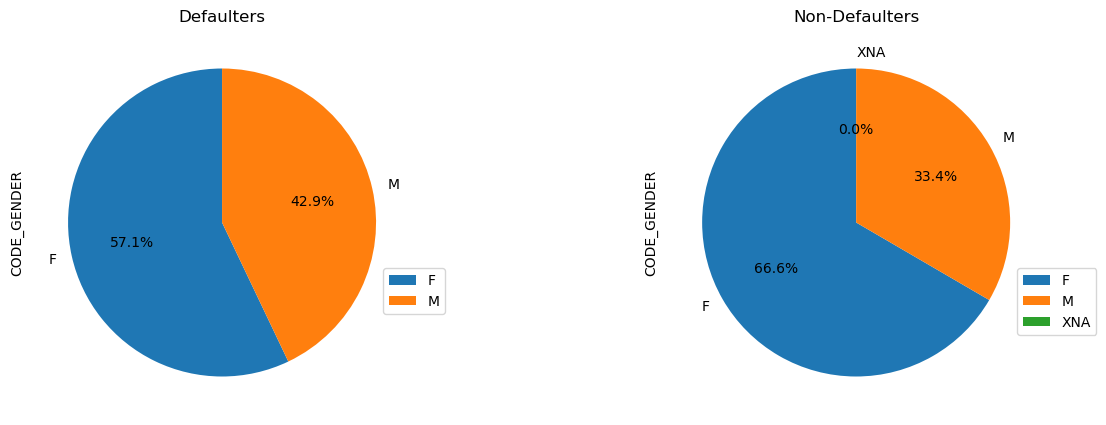

In [64]:
#Plotting a pie chart on the column CODE_GENDER

plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.title("Defaulters")
app_d_1.CODE_GENDER.value_counts().plot.pie(autopct='%1.1f%%',startangle=90)
plt.xticks(rotation = 90)
plt.legend(bbox_to_anchor=(0.9,0.4))


plt.subplot(1,2,2)
plt.title("Non-Defaulters")
app_d_0.CODE_GENDER.value_counts().plot.pie(autopct='%1.1f%%',startangle=90)
plt.xticks(rotation = 90)
plt.legend(bbox_to_anchor=(0.9,0.4))
plt.show()

### Inference from the above analysis on 'CODE_GENDER' column
    1. From the count plot and pie plot, we can see that MALE gender is contributing to more number of defaults than FEMALE.


#### Analysing the column FLAG_OWN_CAR

In [65]:
app_d_1['FLAG_OWN_CAR'].value_counts()

N    17249
Y     7576
Name: FLAG_OWN_CAR, dtype: int64

In [66]:
app_d_0['FLAG_OWN_CAR'].value_counts()

N    185675
Y     97011
Name: FLAG_OWN_CAR, dtype: int64

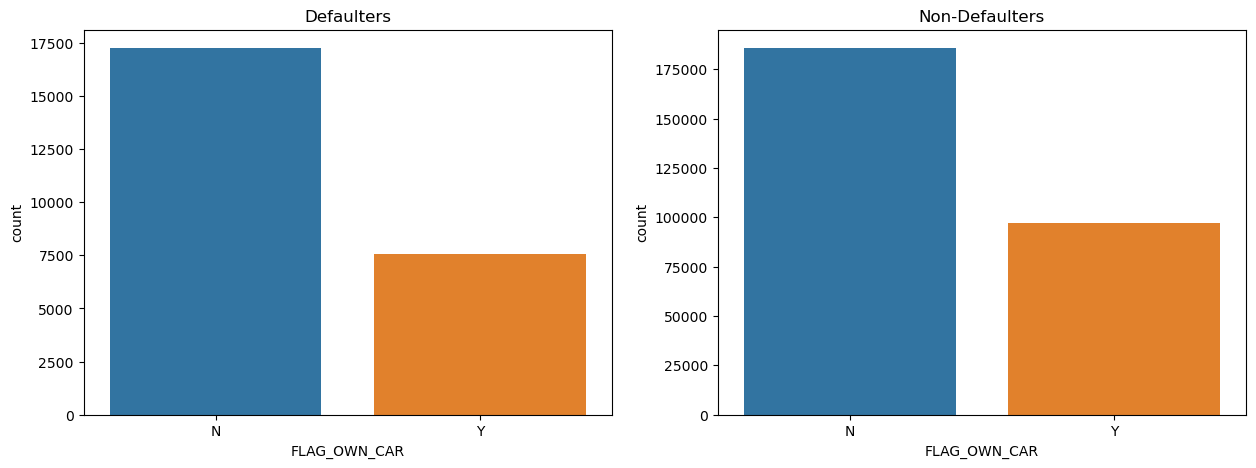

In [67]:
#Plotting a count plot on the column FLAG_OWN_CAR

plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.title("Defaulters")
sns.countplot(data=app_d_1,x='FLAG_OWN_CAR')



plt.subplot(1,2,2)
plt.title("Non-Defaulters")
sns.countplot(data=app_d_0,x='FLAG_OWN_CAR')
plt.show()

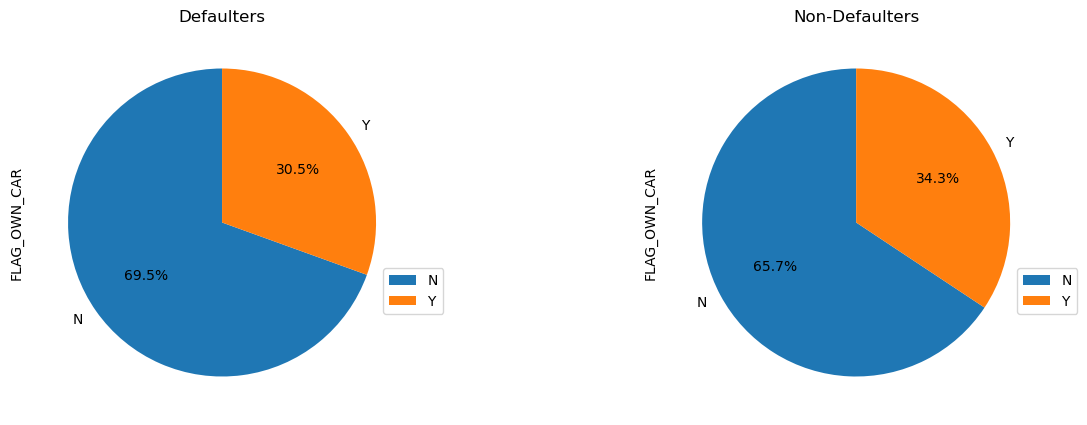

In [68]:
#Plotting a pie chart on the column FLAG_OWN_CAR

plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.title("Defaulters")
app_d_1.FLAG_OWN_CAR.value_counts().plot.pie(autopct='%1.1f%%',startangle=90)
plt.xticks(rotation = 90)
plt.legend(bbox_to_anchor=(0.9,0.4))


plt.subplot(1,2,2)
plt.title("Non-Defaulters")
app_d_0.FLAG_OWN_CAR.value_counts().plot.pie(autopct='%1.1f%%',startangle=90)
plt.xticks(rotation = 90)
plt.legend(bbox_to_anchor=(0.9,0.4))
plt.show()

### Inference from the above analysis on 'FLAG_OWN_CAR' column
    1. Among defaulters, Higher percentage is found with people who does not own a car. Conversely, More number of non defaulters are the people who owns a car which has maximum percentage of 34.3% 

#### Analysing the column NAME_INCOME_TYPE

In [69]:
app_d_1['NAME_INCOME_TYPE'].value_counts()

Working                 15224
Commercial associate     5360
Pensioner                2982
State servant            1249
Unemployed                  8
Maternity leave             2
Name: NAME_INCOME_TYPE, dtype: int64

In [70]:
app_d_0['NAME_INCOME_TYPE'].value_counts()

Working                 143550
Commercial associate     66257
Pensioner                52380
State servant            20454
Student                     18
Unemployed                  14
Businessman                 10
Maternity leave              3
Name: NAME_INCOME_TYPE, dtype: int64

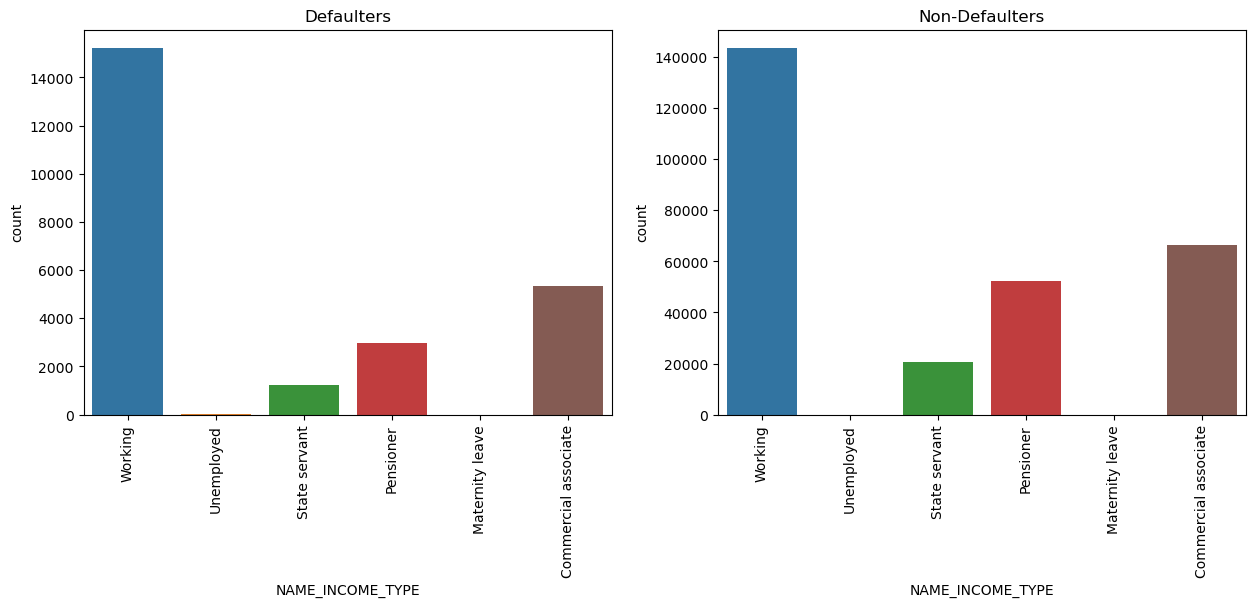

In [71]:
#Plotting a count plot on the column NAME_INCOME_TYPE

plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.title("Defaulters")
sns.countplot(data=app_d_1,x='NAME_INCOME_TYPE',order=sorted(app_d_1['NAME_INCOME_TYPE'].unique(),reverse=True))
plt.xticks(rotation = 90)


plt.subplot(1,2,2)
plt.title("Non-Defaulters")
sns.countplot(data=app_d_0,x='NAME_INCOME_TYPE',order=sorted(app_d_1['NAME_INCOME_TYPE'].unique(),reverse=True))
plt.xticks(rotation = 90)
plt.show()

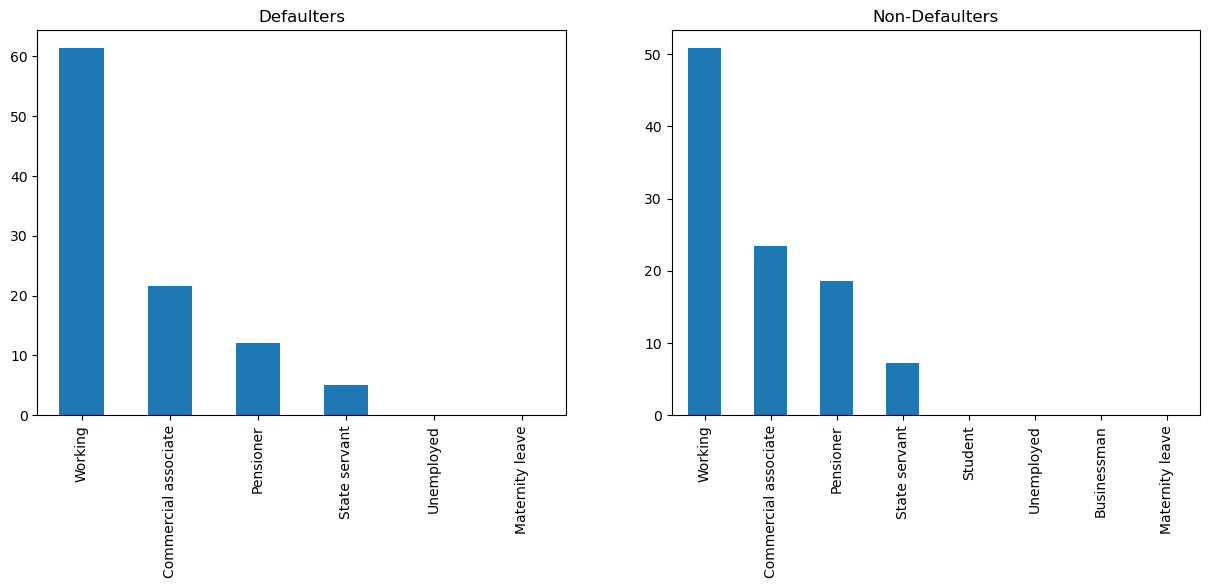

In [72]:
#Plotting a hist plot on the column NAME_INCOME_TYPE

plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.title("Defaulters")
(app_d_1['NAME_INCOME_TYPE'].value_counts(normalize=True)*100).plot.bar()
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.title("Non-Defaulters")
(app_d_0['NAME_INCOME_TYPE'].value_counts(normalize=True)*100).plot.bar()
plt.xticks(rotation=90)
plt.show()

### Inference from the above analysis on 'NAME_INCOME_TYPE' column
   1. Students have no diificulties in payment which is evident from bar plot.
   2. People who are doing business also have no payment difficulties but both students and businessman have less observations.
   3. Pensioner have higher percentage in non defaulters which indicates that it is non riskier to give loans to pensioners.

#### Analysing the column NAME_EDUCATION_TYPE

In [73]:
app_d_1['NAME_EDUCATION_TYPE'].value_counts()

Secondary / secondary special    19524
Higher education                  4009
Incomplete higher                  872
Lower secondary                    417
Academic degree                      3
Name: NAME_EDUCATION_TYPE, dtype: int64

In [74]:
app_d_0['NAME_EDUCATION_TYPE'].value_counts()

Secondary / secondary special    198867
Higher education                  70854
Incomplete higher                  9405
Lower secondary                    3399
Academic degree                     161
Name: NAME_EDUCATION_TYPE, dtype: int64

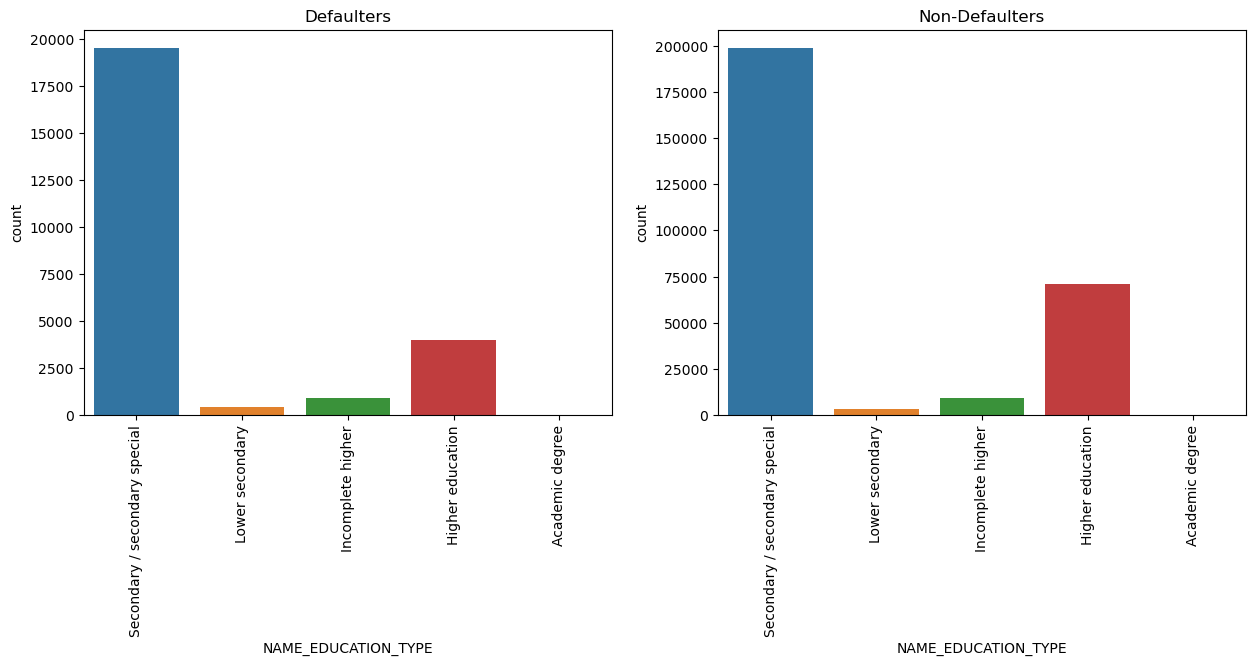

In [75]:
#Plotting a count plot on the column NAME_EDUCATION_TYPE

plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.title("Defaulters")
sns.countplot(data=app_d_1,x='NAME_EDUCATION_TYPE',order=sorted(app_d_1['NAME_EDUCATION_TYPE'].unique(),reverse=True))
plt.xticks(rotation = 90)


plt.subplot(1,2,2)
plt.title("Non-Defaulters")
sns.countplot(data=app_d_0,x='NAME_EDUCATION_TYPE',order=sorted(app_d_1['NAME_EDUCATION_TYPE'].unique(),reverse=True))
plt.xticks(rotation = 90)
plt.show()

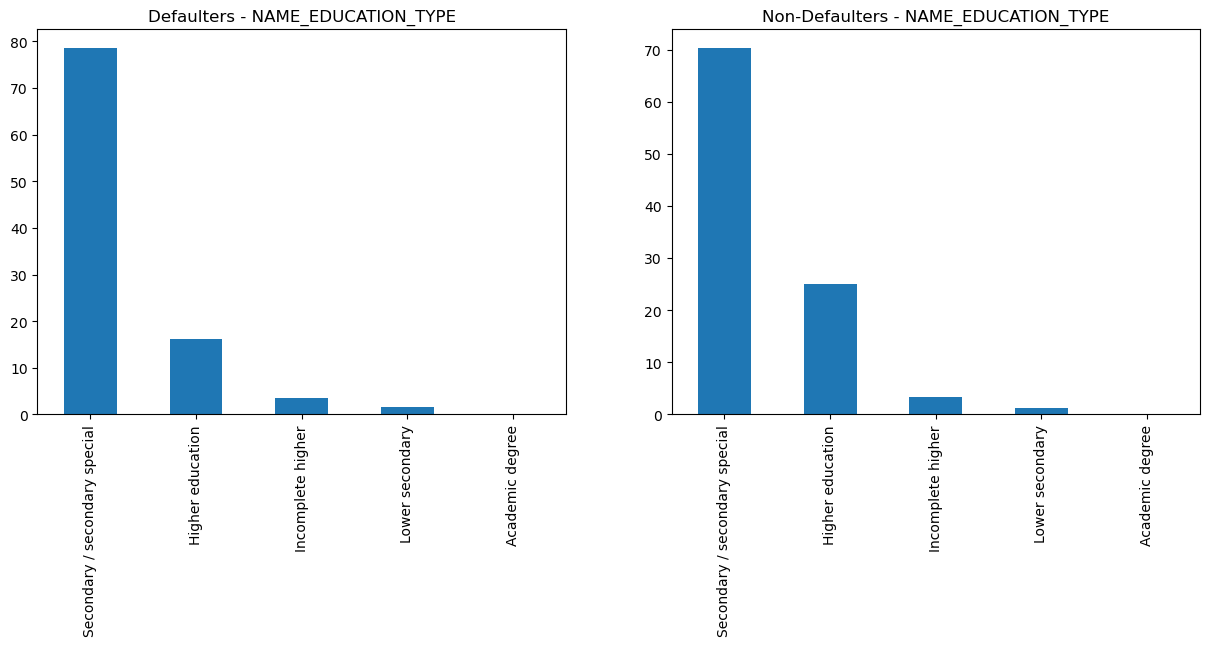

In [76]:
#Plotting a bar plot on the column NAME_EDUCATION_TYPE

plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.title("Defaulters - NAME_EDUCATION_TYPE")
(app_d_1['NAME_EDUCATION_TYPE'].value_counts(normalize=True)*100).plot.bar()
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.title("Non-Defaulters - NAME_EDUCATION_TYPE")
(app_d_0['NAME_EDUCATION_TYPE'].value_counts(normalize=True)*100).plot.bar()
plt.xticks(rotation=90)
plt.show()

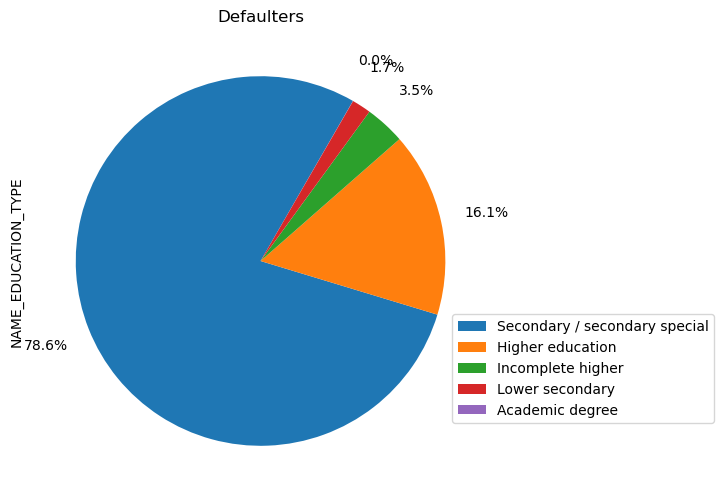

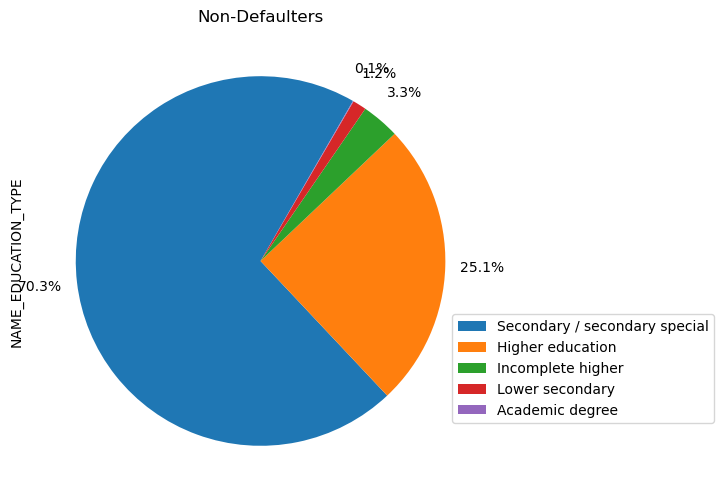

In [77]:
#Plotting a pie plot on the column NAME_EDUCATION_TYPE

plt.figure(figsize = (15,6))


plt.title("Defaulters")
app_d_1.NAME_EDUCATION_TYPE.value_counts().plot.pie(autopct='%1.1f%%',startangle=60,labeldistance=None,pctdistance=1.25)
plt.legend(bbox_to_anchor=(0.9,0.4))
plt.show()

plt.figure(figsize = (15,6))
plt.title("Non-Defaulters")
app_d_0.NAME_EDUCATION_TYPE.value_counts().plot.pie(autopct='%1.1f%%',startangle=60,labeldistance=None,pctdistance=1.2)
plt.legend(bbox_to_anchor=(0.9,0.4))
plt.show()

### Inference from the above analysis on 'NAME_EDUCATION_TYPE' column
    1. From the above analysis, we can infer that, there is higher percentage of people with higher education who has no    payment difficulties which indicates that there is no much risk in providing loans.

#### Analysing the column NAME_FAMILY_STATUS

In [78]:
app_d_1['NAME_FAMILY_STATUS'].value_counts()

Married                 14850
Single / not married     4457
Civil marriage           2961
Separated                1620
Widow                     937
Name: NAME_FAMILY_STATUS, dtype: int64

In [79]:
app_d_0['NAME_FAMILY_STATUS'].value_counts()

Married                 181582
Single / not married     40987
Civil marriage           26814
Separated                18150
Widow                    15151
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

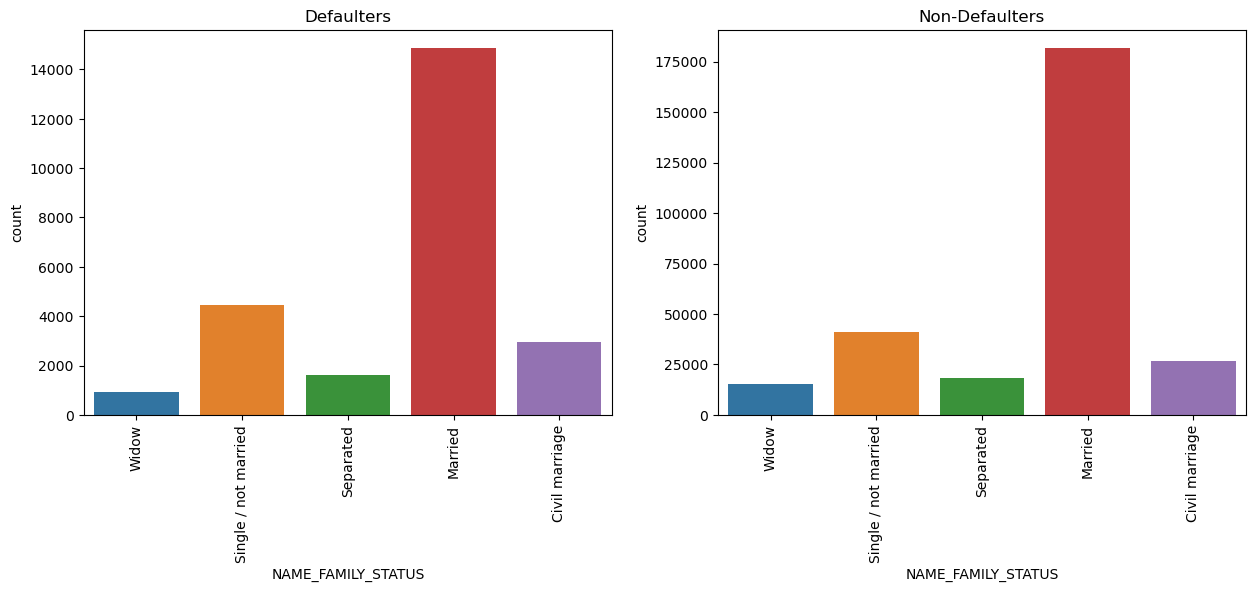

In [80]:
#Plotting a count plot on the column NAME_FAMILY_STATUS

plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.title("Defaulters")
sns.countplot(data=app_d_1,x='NAME_FAMILY_STATUS',order = sorted(app_d_1['NAME_FAMILY_STATUS'].unique(), reverse = True))
plt.xticks(rotation = 90)


plt.subplot(1,2,2)
plt.title("Non-Defaulters")
sns.countplot(data=app_d_0,x='NAME_FAMILY_STATUS',order = sorted(app_d_1['NAME_FAMILY_STATUS'].unique(), reverse = True))
plt.xticks(rotation = 90)
plt.show()

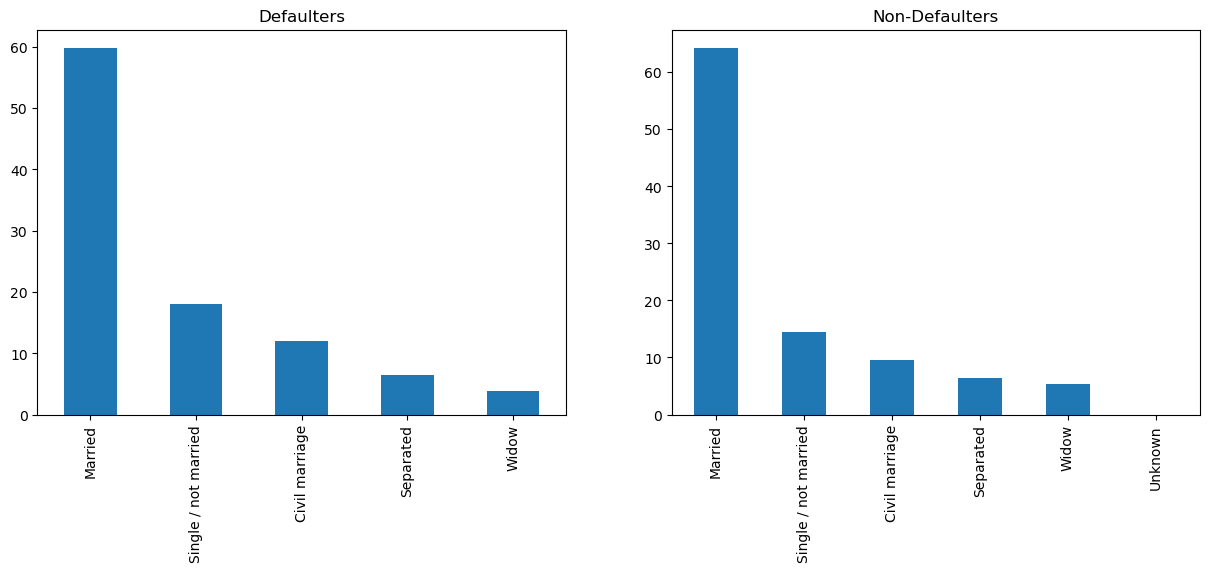

In [81]:
#Plotting a bar plot on the column NAME_FAMILY_STATUS

plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.title("Defaulters")
(app_d_1['NAME_FAMILY_STATUS'].value_counts(normalize=True)*100).plot.bar()
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.title("Non-Defaulters")
(app_d_0['NAME_FAMILY_STATUS'].value_counts(normalize=True)*100).plot.bar()
plt.xticks(rotation=90)
plt.show()

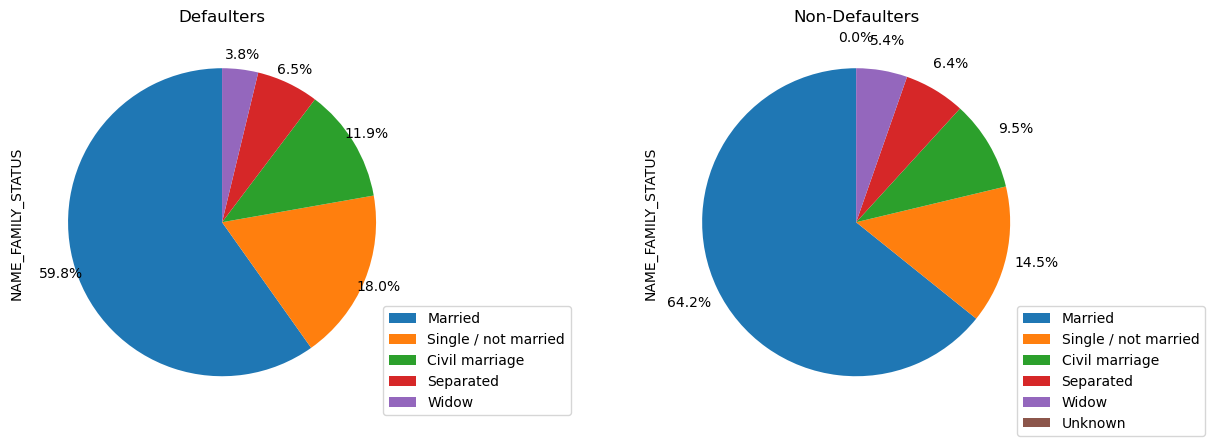

In [82]:
#Plotting a pie plot on the column NAME_FAMILY_STATUS

plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.title("Defaulters")
app_d_1.NAME_FAMILY_STATUS.value_counts().plot.pie(autopct='%1.1f%%',startangle=90,labeldistance=None,pctdistance=1.1)
plt.xticks(rotation = 90)
plt.legend(bbox_to_anchor=(0.9,0.3))


plt.subplot(1,2,2)
plt.title("Non-Defaulters")
app_d_0.NAME_FAMILY_STATUS.value_counts().plot.pie(autopct='%1.1f%%',startangle=90,labeldistance=None,pctdistance=1.2)
plt.xticks(rotation = 90)
plt.legend(bbox_to_anchor=(0.9,0.3))
plt.show()

### Inference from the above analysis on 'NAME_FAMILY_STATUS' column
    1. People who is married or widow are more likely to repay the loan comparatively. But even though there is no such a   strong correlation.
    2. On the other hand, Giving loans to people who is not married or done civil marriage or seperated is little riskier.

# 1.4.2 Univariate analysis on numerical columns

#### Analysing the column AMT_INCOME_TOTAL

<function matplotlib.pyplot.show(close=None, block=None)>

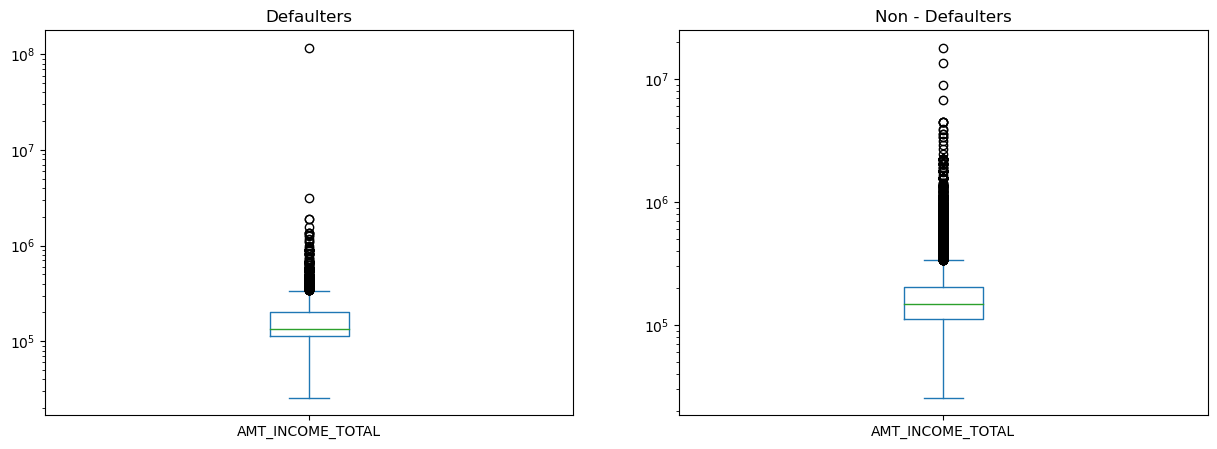

In [83]:
#Plotting box plot on the column AMT_INCOME_TOTAL
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)           
app_d_1['AMT_INCOME_TOTAL'].plot.box()
plt.yscale('log')
plt.title('Defaulters')

plt.subplot(1,2,2)   
app_d_0['AMT_INCOME_TOTAL'].plot.box()
plt.yscale('log')
plt.title('Non - Defaulters')
plt.show

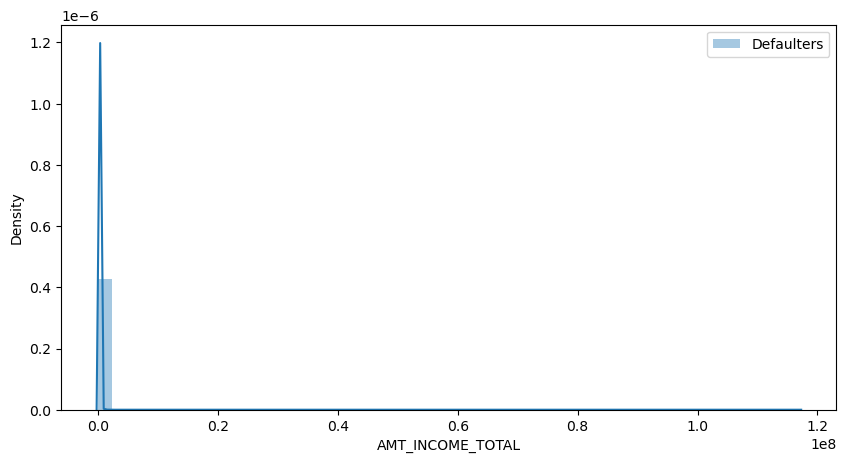

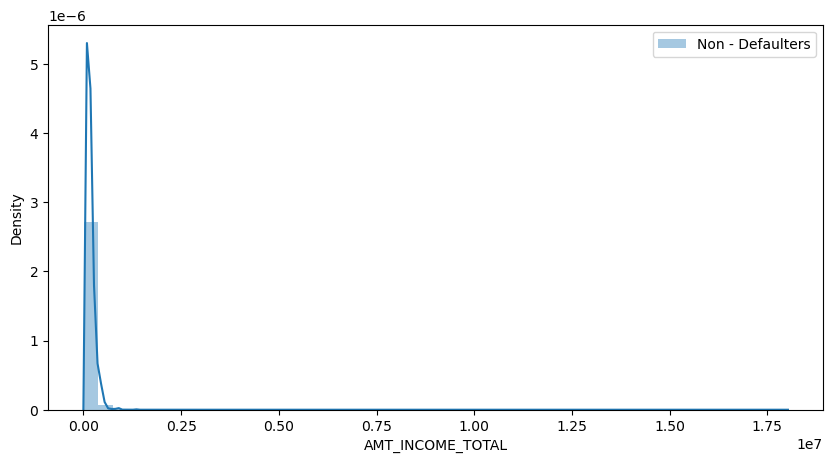

In [84]:
#Plotting hist plot on the column AMT_INCOME_TOTAL

plt.figure(figsize = [10,5])
sns.distplot(app_d_1['AMT_INCOME_TOTAL'],label = 'Defaulters')
plt.legend()
plt.show()

plt.figure(figsize = [10,5])
sns.distplot(app_d_0['AMT_INCOME_TOTAL'],label = 'Non - Defaulters')
plt.legend()
plt.show()

### Inference from the above analysis on 'AMT_INCOME_TOTAL' column
    1. From the box plot, we can see that 3rd quartile is narrow and most of the income lies in first quartile. There are   some outliers present in both plots
    2. From the histplot we cannot infer anything, since outlier are not treated.

#### Analysing the column AMT_CREDIT

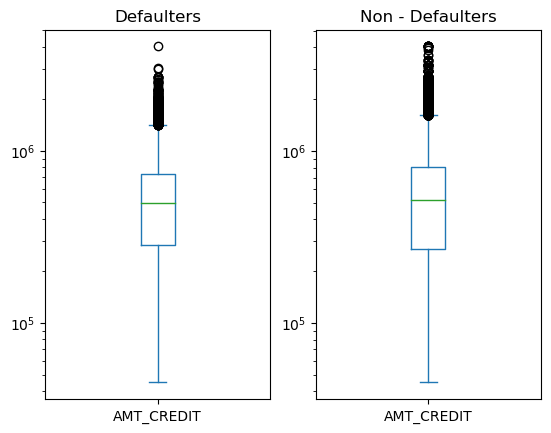

In [85]:
#Plotting box plot on the column AMT_CREDIT

plt.subplot(1,2,1)           
app_d_1['AMT_CREDIT'].plot.box()
plt.yscale('log')
plt.title('Defaulters')

plt.subplot(1,2,2)   
app_d_0['AMT_CREDIT'].plot.box()
plt.yscale('log')
plt.title('Non - Defaulters')
plt.show()

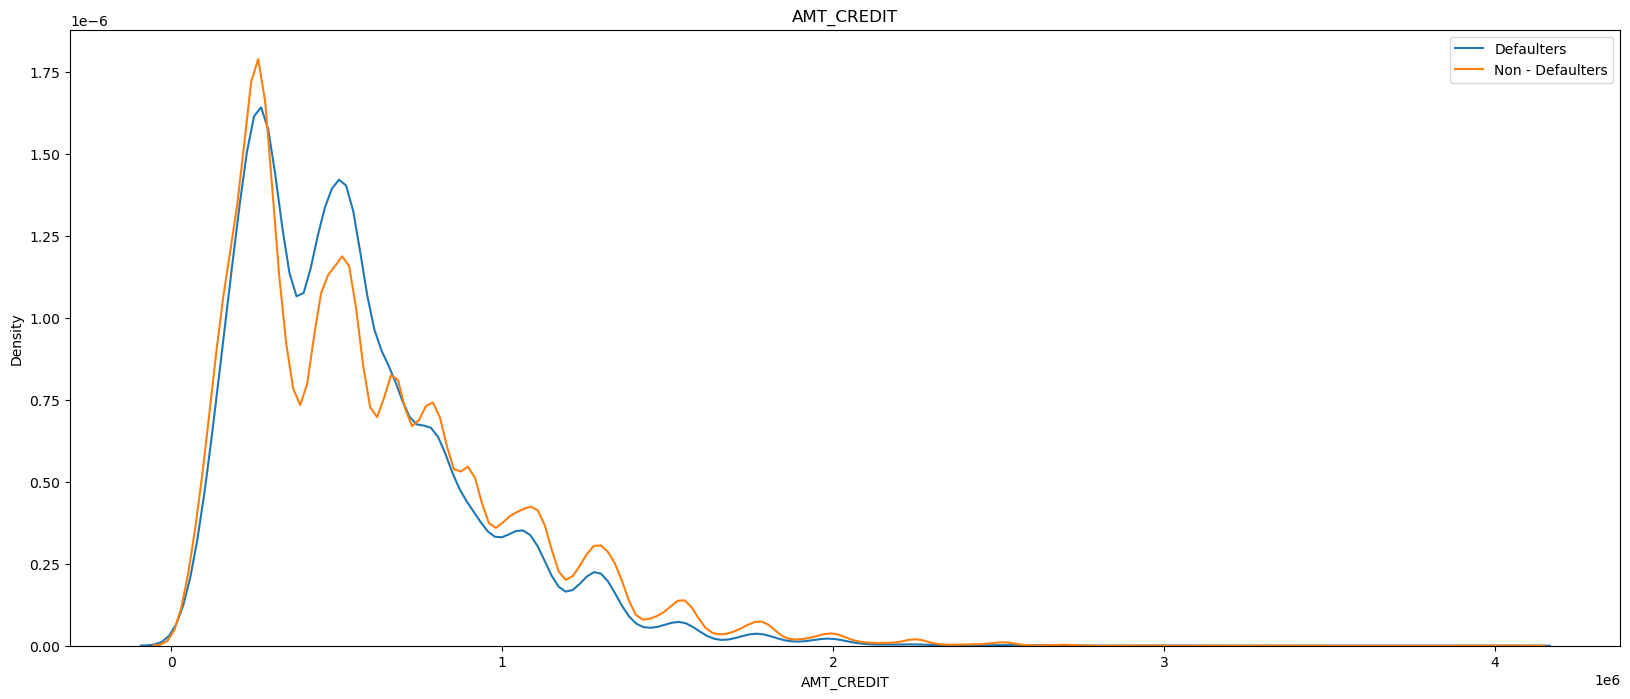

In [86]:
#Plotting hist plot on the column AMT_CREDIT

plt.figure(figsize = [20,8])
sns.distplot(app_d_1['AMT_CREDIT'],label = 'Defaulters',hist=False)
sns.distplot(app_d_0['AMT_CREDIT'],label = 'Non - Defaulters',hist=False)
plt.title('AMT_CREDIT')
plt.legend()
plt.show()



### Inference from the above analysis on 'AMT_CREDIT' column
    1. From the box plot, we can see that there are some outliers present. 1st quartile is bigger than 3rd quartile. Most of the credit amount falls within 1st quartile.
    2. From the histplot, we can able to see that in between there are some payment difficulties. when the credit amount increases, gradually the defaulters decreases and on payment increases.

#### Analysing the column AGE_YRS

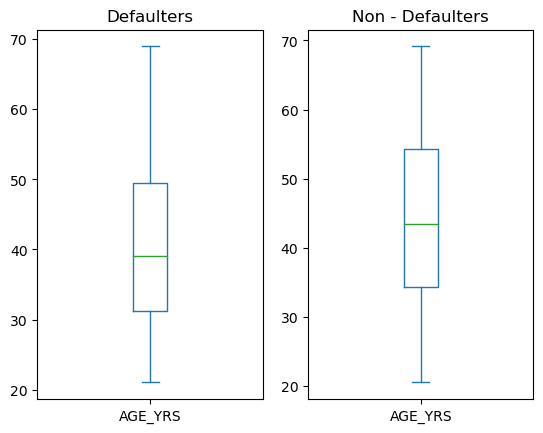

In [87]:
#Plotting box plot on the column AGE_YRS

plt.subplot(1,2,1)           
app_d_1['AGE_YRS'].plot.box()
plt.title('Defaulters')

plt.subplot(1,2,2)   
app_d_0['AGE_YRS'].plot.box()
plt.title('Non - Defaulters')
plt.show()

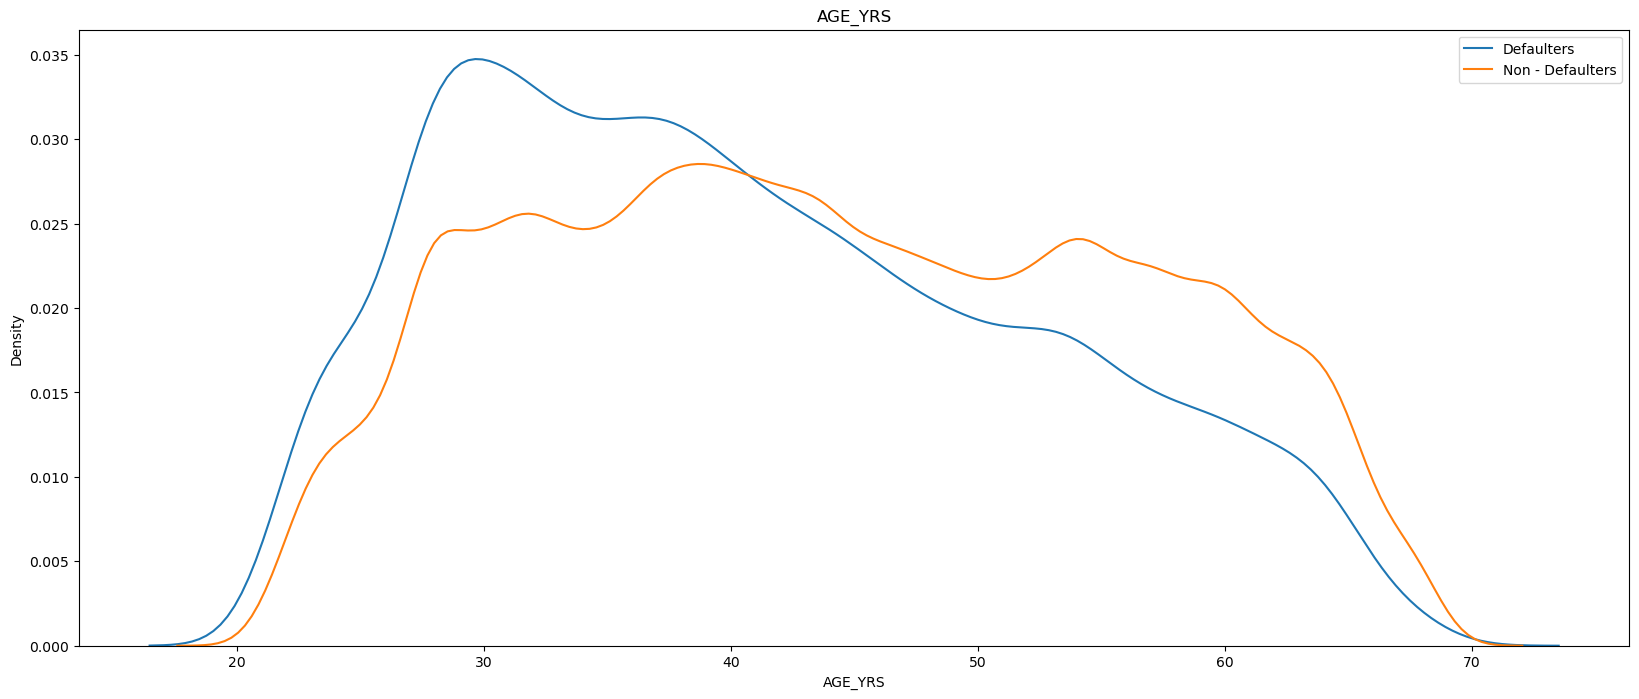

In [88]:
#Plotting hist plot on the column AGE_YRS

plt.figure(figsize = [20,8])
sns.distplot(app_d_1['AGE_YRS'],label = 'Defaulters',hist=False)
sns.distplot(app_d_0['AGE_YRS'],label = 'Non - Defaulters',hist=False)
plt.title('AGE_YRS')
plt.legend()
plt.show()

### Inference from the above analysis on 'AGE_YRS' column
    1. From the box plot, we can see that there is no outliers.
    2. From the histplot, people between the age 20 and 40 are facing difficulties in repaying, whereas people aged between 40 and 70 are more likely to repay the loan amount on time.

#### Analysing the column AMT_GOODS_PRICE

Text(0.5, 1.0, 'Non-Defaulters')

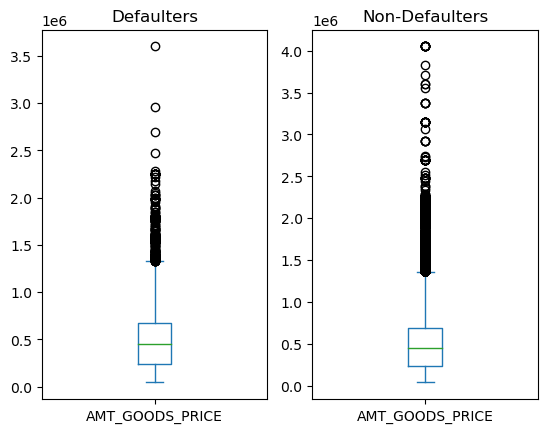

In [89]:
#Plotting box plot on the column AMT_GOODS_PRICE

plt.subplot(1,2,1)
app_d_1.AMT_GOODS_PRICE.plot.box()
plt.title('Defaulters')
plt.subplot(1,2,2)
app_d_0.AMT_GOODS_PRICE.plot.box()
plt.title('Non-Defaulters')

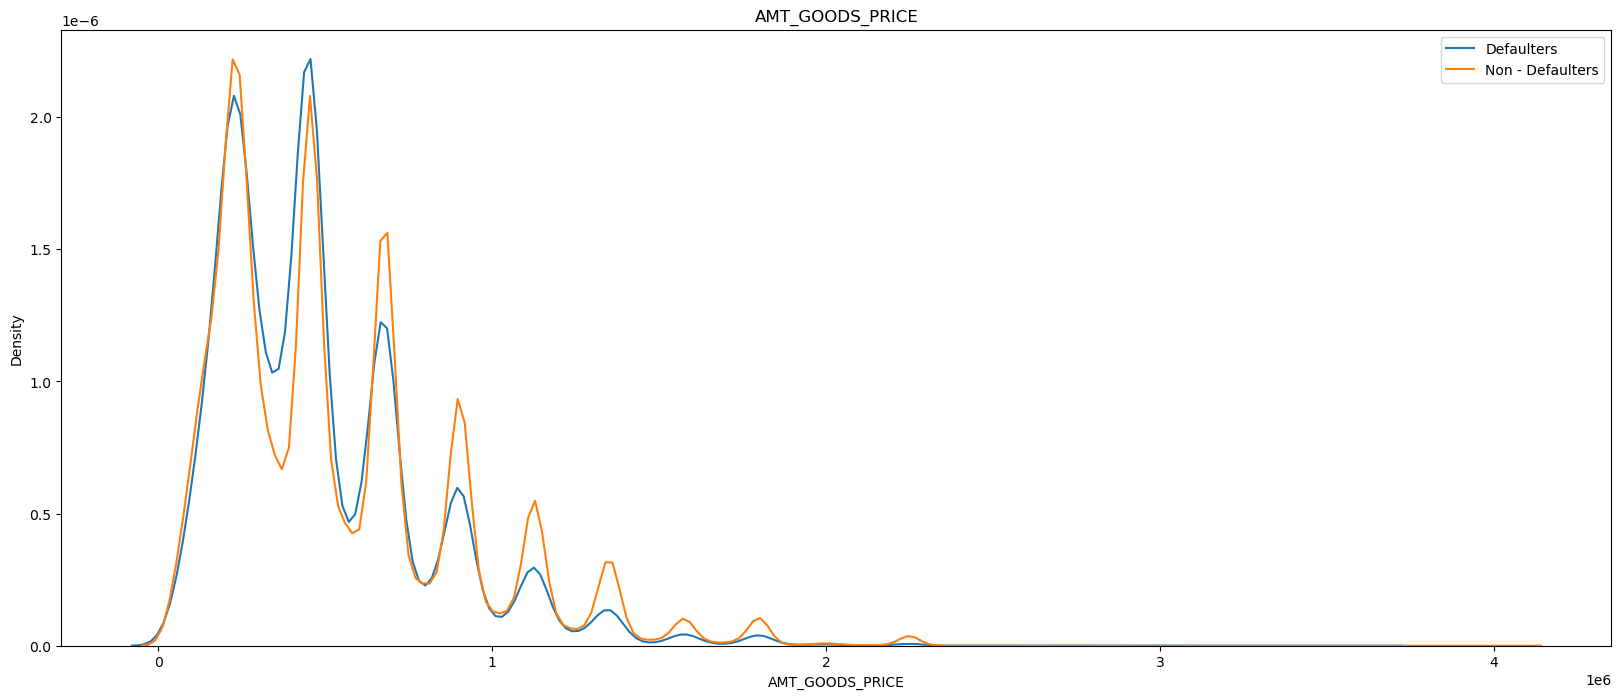

In [90]:
#Plotting hist plot on the column AMT_GOODS_PRICE

plt.figure(figsize = [20,8])
sns.distplot(app_d_1['AMT_GOODS_PRICE'],label = 'Defaulters',hist=False)
sns.distplot(app_d_0['AMT_GOODS_PRICE'],label = 'Non - Defaulters',hist=False)
plt.title('AMT_GOODS_PRICE')
plt.legend()
plt.show()

### Inference from the above analysis on 'AMT_GOODS_PRICE' column
    1. From the box plot, we could see there are severe outliers.
    2. From the histplot, we could see a spike which indicates that there is increase in defaulters for a particular price range. There are some consecutive spikes which indicates that on payment increases

#### Analysing the column EMPLOYED_YRS

Text(0.5, 1.0, 'Non - Defaulters')

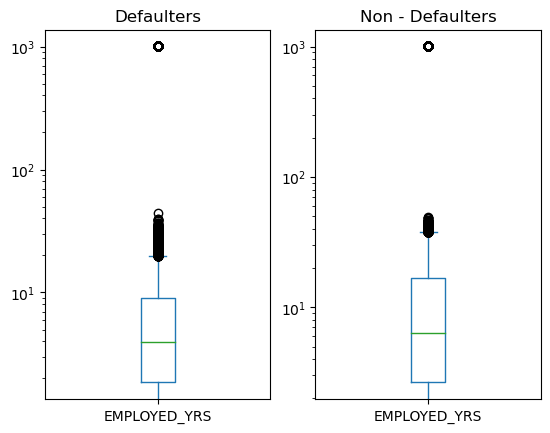

In [91]:
#Plotting box plot on the column EMPLOYED_YRS

plt.subplot(1,2,1)
app_d_1.EMPLOYED_YRS.plot.box()
plt.yscale('log')
plt.title('Defaulters')
plt.subplot(1,2,2)
app_d_0.EMPLOYED_YRS.plot.box()
plt.yscale('log')
plt.title('Non - Defaulters')

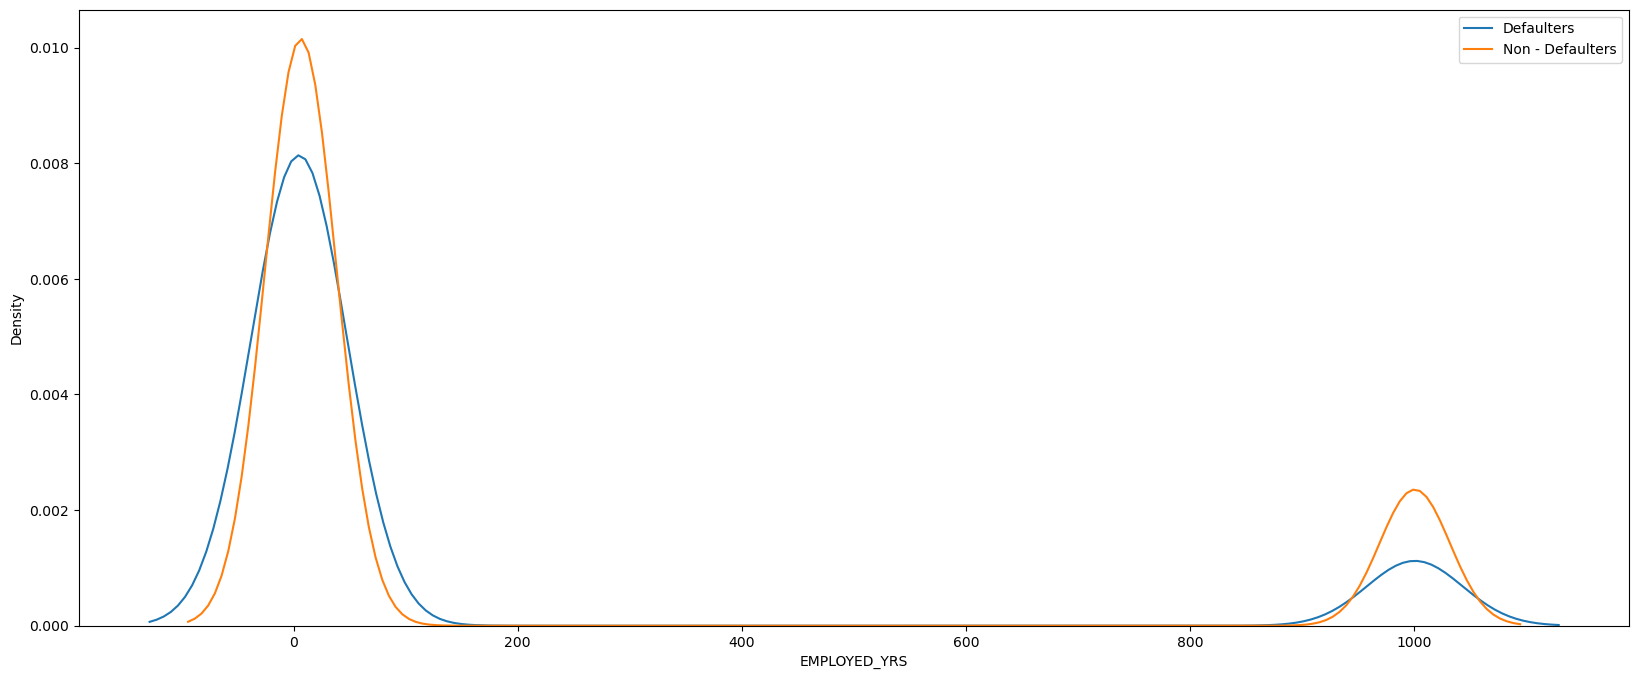

In [92]:
#Plotting hist plot on the column EMPLOYED_YRS

plt.figure(figsize = [20,8])
sns.distplot(app_d_1['EMPLOYED_YRS'],label = 'Defaulters',hist=False)
sns.distplot(app_d_0['EMPLOYED_YRS'],label = 'Non - Defaulters',hist=False)
plt.legend()
plt.show()

### Inference from the above analysis on 'EMPLOYED_YRS' column
    1. From the box plot, we could see there are severe outliers.
    2. From the histplot, we could see some spikes indicating there are particular years of experience in which on payments increased.

#### Analysing the column CNT_CHILDREN

Text(0.5, 1.0, 'Non Defaulters')

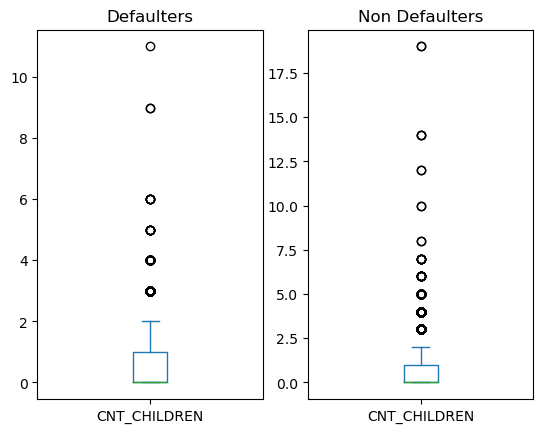

In [93]:
#Plotting box plot on the column CNT_CHILDREN


plt.subplot(1,2,1)
app_d_1.CNT_CHILDREN.plot.box()
plt.title('Defaulters')
plt.subplot(1,2,2)
app_d_0.CNT_CHILDREN.plot.box()
plt.title('Non Defaulters')

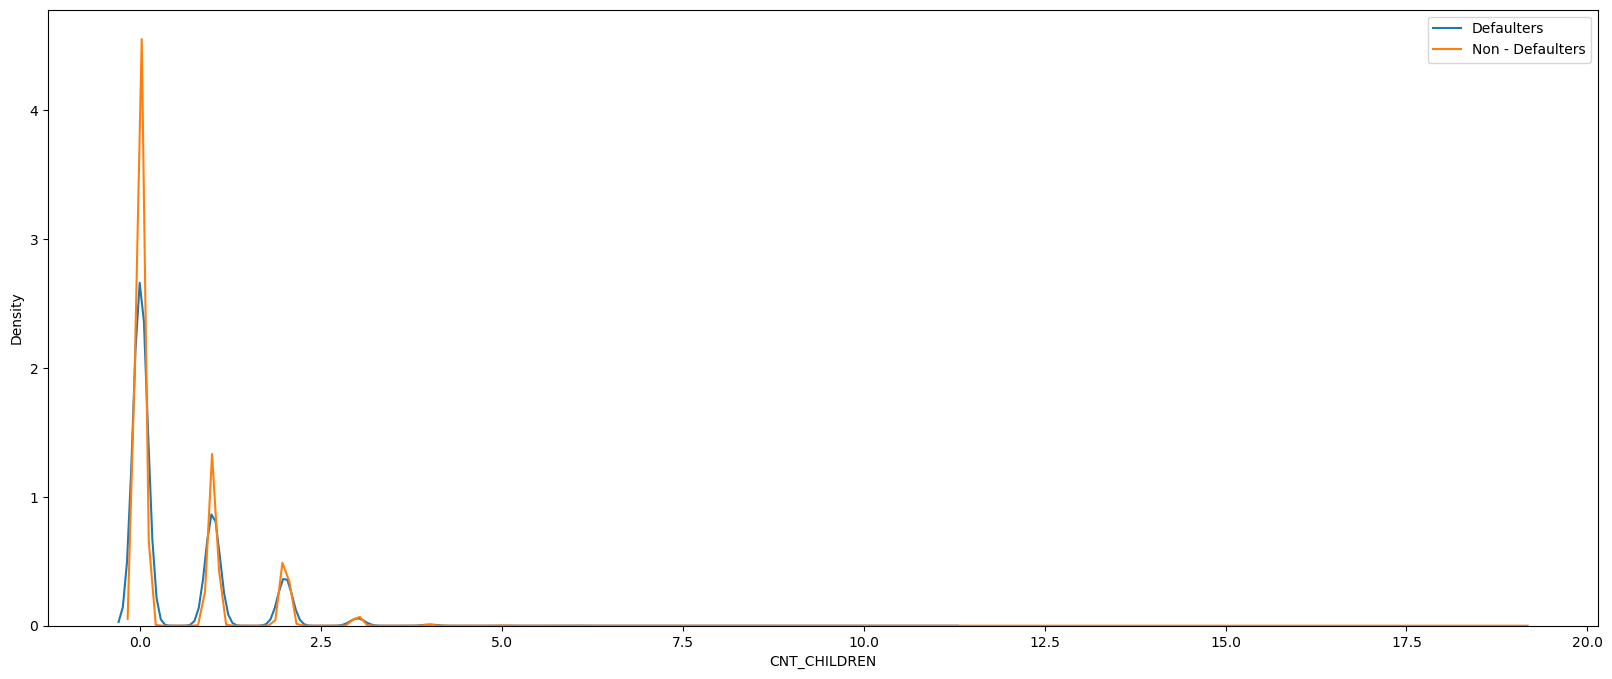

In [94]:
#Plotting hist plot on the column CNT_CHILDREN

plt.figure(figsize = [20,8])
sns.distplot(app_d_1['CNT_CHILDREN'],label = 'Defaulters',hist=False)
sns.distplot(app_d_0['CNT_CHILDREN'],label = 'Non - Defaulters',hist=False)
plt.legend()
plt.show()

### Inference from the above analysis on CNT_CHILDREN column
    1. From the box plot, we could see there are severe outliers.
    2. From the histplot, we could see people with 0 child has large number of on payments records, whereas people with 1 or more child has shown decrease in no of on payments

# 1.4.3 Bivariate analysis

### Correlation matrix for numerical columns for the category Defaulters

In [95]:
app_d_1_num=app_d_1[['SK_ID_CURR','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY',
                               'AMT_GOODS_PRICE','CNT_FAM_MEMBERS','REGION_RATING_CLIENT',
                              'REGION_POPULATION_RELATIVE','DAYS_ID_PUBLISH']]
app_d_1_num_corr=app_d_1_num.corr()

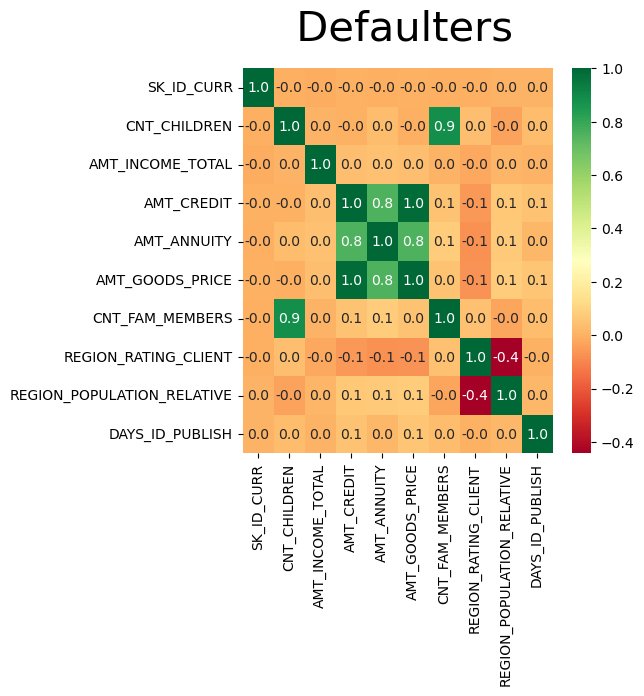

In [96]:
plt.figure(figsize=(5,5))
sns.heatmap(data = app_d_1_num_corr, fmt='.1f', cmap="RdYlGn", annot=True)
plt.title(" Defaulters",fontsize=30, pad=20 )
plt.show()

In [97]:
app_d_1_num_corr[app_d_1_num_corr <= 0.99].unstack().sort_values(ascending = False).head(22)

AMT_CREDIT                  AMT_GOODS_PRICE               0.983103
AMT_GOODS_PRICE             AMT_CREDIT                    0.983103
CNT_FAM_MEMBERS             CNT_CHILDREN                  0.885484
CNT_CHILDREN                CNT_FAM_MEMBERS               0.885484
AMT_GOODS_PRICE             AMT_ANNUITY                   0.752699
AMT_ANNUITY                 AMT_GOODS_PRICE               0.752699
                            AMT_CREDIT                    0.752195
AMT_CREDIT                  AMT_ANNUITY                   0.752195
REGION_POPULATION_RELATIVE  AMT_GOODS_PRICE               0.076049
AMT_GOODS_PRICE             REGION_POPULATION_RELATIVE    0.076049
CNT_FAM_MEMBERS             AMT_ANNUITY                   0.075711
AMT_ANNUITY                 CNT_FAM_MEMBERS               0.075711
REGION_POPULATION_RELATIVE  AMT_ANNUITY                   0.071690
AMT_ANNUITY                 REGION_POPULATION_RELATIVE    0.071690
REGION_POPULATION_RELATIVE  AMT_CREDIT                    0.06

#### Inference I could see from the above heat map is the a strong correlation between the below columns for the category defaulters.
1. AMT_CREDIT                  AMT_GOODS_PRICE 
2. CNT_FAM_MEMBERS             CNT_CHILDREN
3. AMT_GOODS_PRICE             AMT_ANNUITY
4. AMT_CREDIT                  AMT_ANNUITY

### Correlation matrix for numerical columns for the category Non - Defaulters

In [98]:
app_d_0_num=app_d_0[['SK_ID_CURR','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY',
                               'AMT_GOODS_PRICE','CNT_FAM_MEMBERS','REGION_RATING_CLIENT',
                              'REGION_POPULATION_RELATIVE','DAYS_ID_PUBLISH']]
app_d_0_num_corr=app_d_0_num.corr()

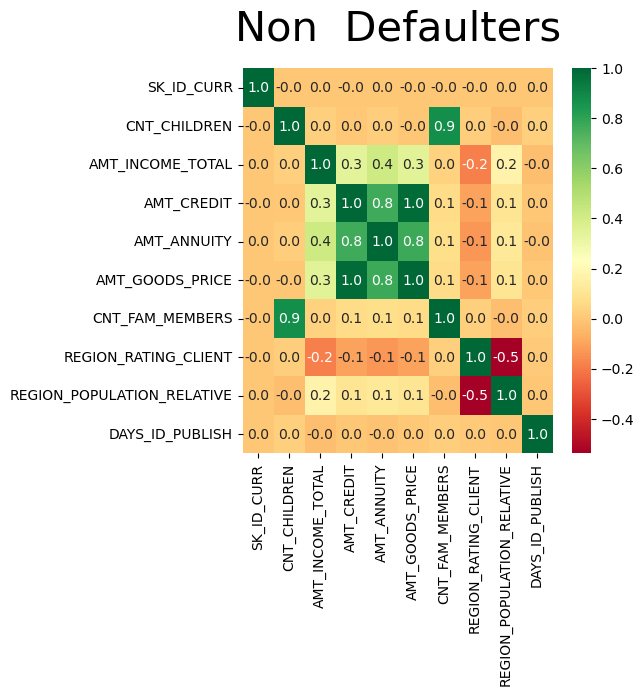

In [99]:
plt.figure(figsize=(5,5))
sns.heatmap(data = app_d_0_num_corr, fmt='.1f', cmap="RdYlGn", annot=True)
plt.title("Non  Defaulters",fontsize=30, pad=20 )
plt.show()

In [101]:
app_d_0_num_corr[app_d_0_num_corr <= 0.99].unstack().sort_values(ascending = False).head(22)

AMT_CREDIT                  AMT_GOODS_PRICE               0.987250
AMT_GOODS_PRICE             AMT_CREDIT                    0.987250
CNT_CHILDREN                CNT_FAM_MEMBERS               0.878571
CNT_FAM_MEMBERS             CNT_CHILDREN                  0.878571
AMT_GOODS_PRICE             AMT_ANNUITY                   0.776686
AMT_ANNUITY                 AMT_GOODS_PRICE               0.776686
AMT_CREDIT                  AMT_ANNUITY                   0.771309
AMT_ANNUITY                 AMT_CREDIT                    0.771309
AMT_INCOME_TOTAL            AMT_ANNUITY                   0.418953
AMT_ANNUITY                 AMT_INCOME_TOTAL              0.418953
AMT_GOODS_PRICE             AMT_INCOME_TOTAL              0.349462
AMT_INCOME_TOTAL            AMT_GOODS_PRICE               0.349462
AMT_CREDIT                  AMT_INCOME_TOTAL              0.342799
AMT_INCOME_TOTAL            AMT_CREDIT                    0.342799
REGION_POPULATION_RELATIVE  AMT_INCOME_TOTAL              0.16

#### Inference I could see from the above heat map is the a strong correlation between the below columns for the category non defaulters.
1. AMT_CREDIT                  AMT_GOODS_PRICE 
2. CNT_FAM_MEMBERS             CNT_CHILDREN
3. AMT_GOODS_PRICE             AMT_ANNUITY
4. AMT_CREDIT                  AMT_ANNUITY

Both Dataset has same columns that are strongly correlated

## Numerical vs Numerical column

#### Analysing the columns AMT_GOODS_PRICE V/S AMT_CREDIT

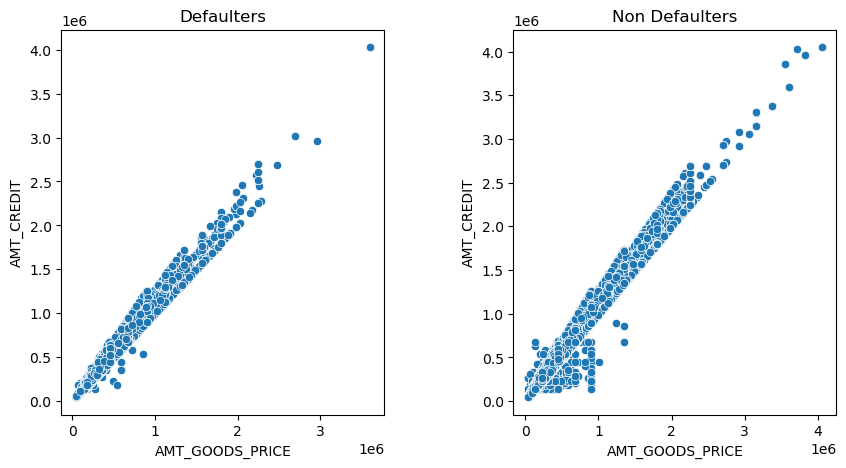

In [102]:
#Plotting hist plot on the columns AMT_GOODS_PRICE V/S AMT_CREDIT

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.scatterplot(x=app_d_1['AMT_GOODS_PRICE'],y=app_d_1['AMT_CREDIT'], data=app_d_1)
plt.title('Defaulters')
plt.subplot(1,2,2)
sns.scatterplot(x=app_d_0['AMT_GOODS_PRICE'],y=app_d_0['AMT_CREDIT'], data=app_d_0)
plt.title('Non Defaulters')
plt.subplots_adjust(wspace=0.4)
plt.show()

### Inference from the above analysis on AMT_GOODS_PRICE V/S AMT_CREDIT columns
    1. We could see that there is a strong positve correlation ie., when Goods price increases, then loan amount also       increases.
    2. There are some outliers present

#### Analysing the columns AMT_ANNUITY V/S AMT_CREDIT

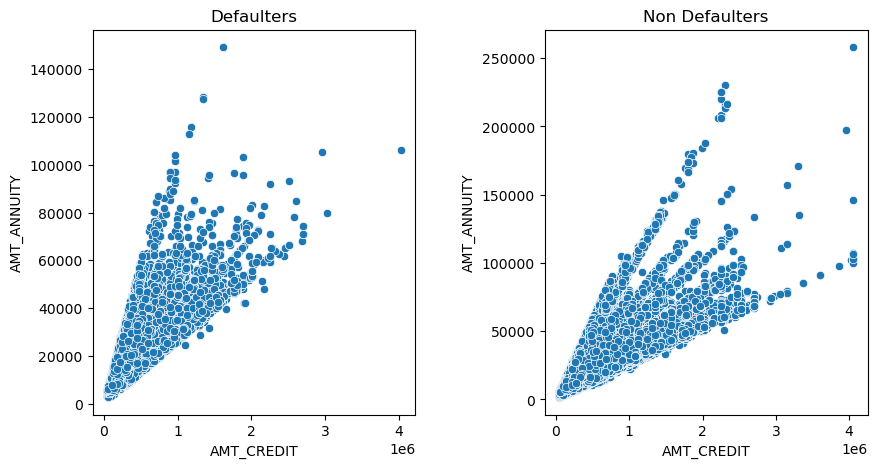

In [103]:
#Plotting hist plot on the columns AMT_ANNUITY V/S AMT_CREDIT

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.scatterplot(x=app_d_1['AMT_CREDIT'],y=app_d_1['AMT_ANNUITY'], data=app_d_1)
plt.title('Defaulters')
plt.subplot(1,2,2)
sns.scatterplot(x=app_d_0['AMT_CREDIT'],y=app_d_0['AMT_ANNUITY'], data=app_d_0)
plt.title('Non Defaulters')
plt.subplots_adjust(wspace=0.4)

### Inference from the above analysis on AMT_ANNUITY V/S AMT_CREDIT columns
    1. We could see that there is a strong positve correlation ie., when loan amount increases, then annuity amount also       increases.
    2. There are some outliers present

#### Analysing the columns DAYS_EMPLOYED V/S AMT_INCOME_TOTAL

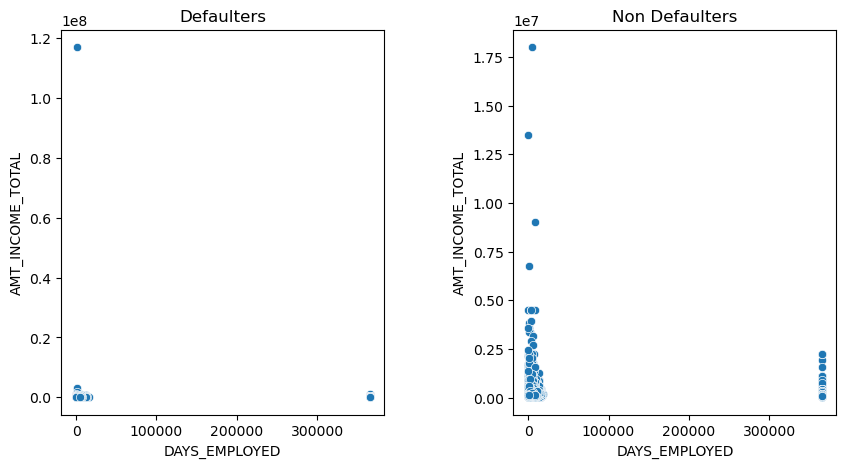

In [104]:
#Plotting hist plot on the columns DAYS_EMPLOYED V/S AMT_INCOME_TOTAL

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.scatterplot(x=app_d_1['DAYS_EMPLOYED'],y=app_d_1['AMT_INCOME_TOTAL'], data=app_d_1)
plt.title('Defaulters')
plt.subplot(1,2,2)
sns.scatterplot(x=app_d_0['DAYS_EMPLOYED'],y=app_d_0['AMT_INCOME_TOTAL'], data=app_d_0)
plt.title('Non Defaulters')
plt.subplots_adjust(wspace=0.4)

### Inference from the above analysis on DAYS_EMPLOYED V/S AMT_INCOME_TOTAL
    1. We could see there are severe outliers, due to which we are not getting any meaningful insights from the graph.

#### Analysing the columns AMT_CREDIT V/S DAYS_BIRTH

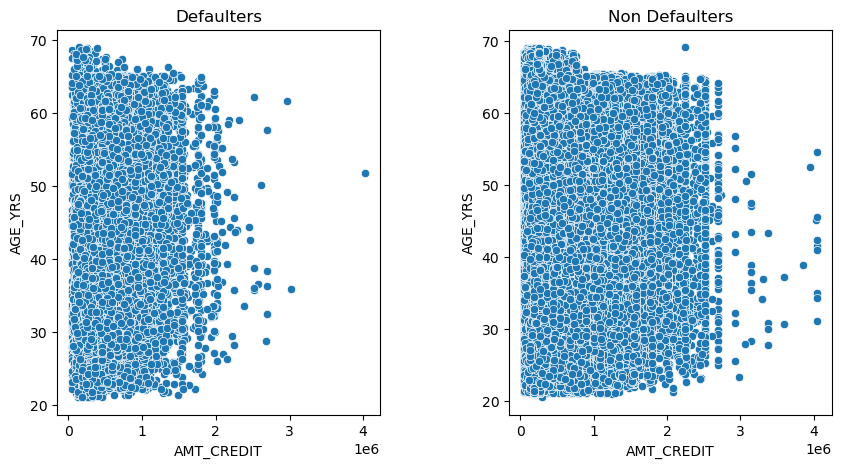

In [105]:
#Plotting hist plot on the columns AMT_CREDIT V/S DAYS_BIRTH

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.scatterplot(x=app_d_1['AMT_CREDIT'],y=app_d_1['AGE_YRS'], data=app_d_1)
plt.title('Defaulters')
plt.subplot(1,2,2)
sns.scatterplot(x=app_d_0['AMT_CREDIT'],y=app_d_0['AGE_YRS'], data=app_d_0)
plt.title('Non Defaulters')
plt.subplots_adjust(wspace=0.4)

### Inference from the above analysis on DAYS_EMPLOYED V/S AMT_INCOME_TOTAL
    1. From the above scatter plot we could not see any significant correlation between the columns

#### Analysing the columns AMT_ANNUITY V/S AMT_GOODS_PRICE

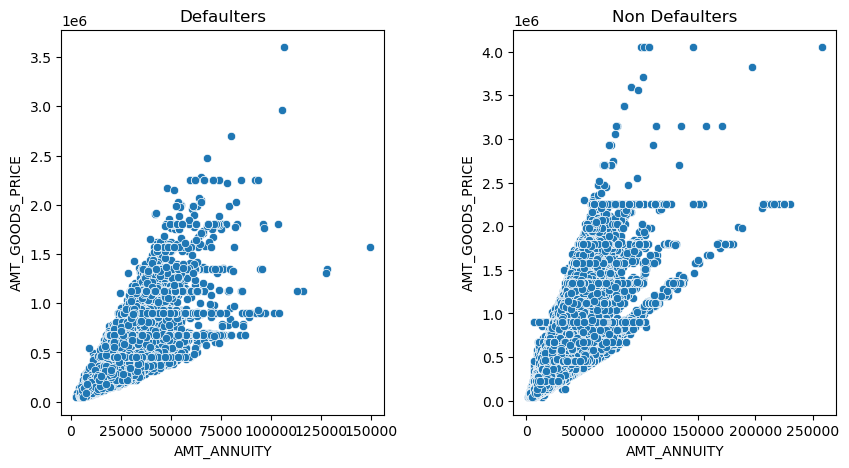

In [106]:
#Plotting hist plot on the columns AMT_ANNUITY V/S AMT_GOODS_PRICE

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.scatterplot(x=app_d_1['AMT_ANNUITY'],y=app_d_1['AMT_GOODS_PRICE'], data=app_d_1)
plt.title('Defaulters')
plt.subplot(1,2,2)
sns.scatterplot(x=app_d_0['AMT_ANNUITY'],y=app_d_0['AMT_GOODS_PRICE'], data=app_d_0)
plt.title('Non Defaulters')
plt.subplots_adjust(wspace=0.4)

### Inference from the above analysis on AMT_ANNUITY V/S AMT_GOODS_PRICE
    1. From the above scatter plot we could see some positive correlation along with there are some outliers

## Categorical vs Categorical column

#### Analysing the columns INCOME_RANGE V/S CODE_GENDER

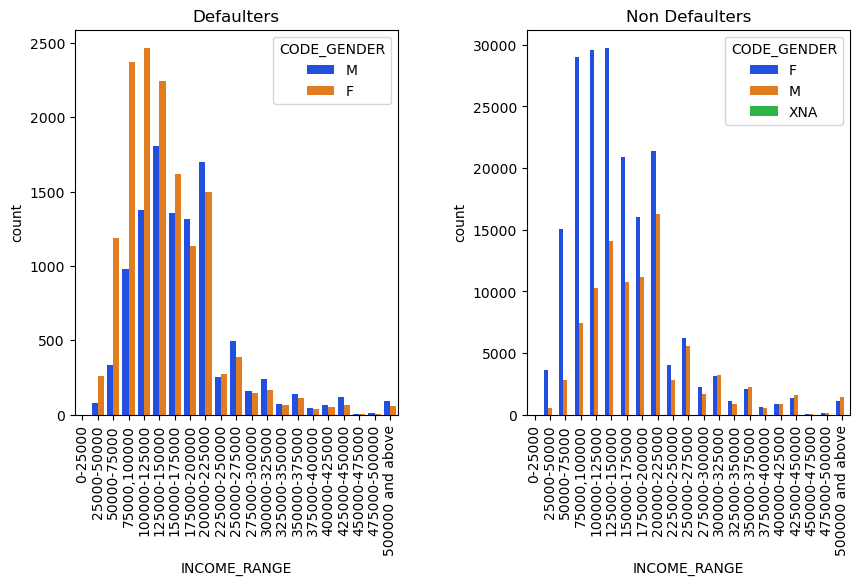

In [107]:
#Plotting count plot on the columns INCOME_RANGE V/S CODE_GENDER

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x='INCOME_RANGE',hue='CODE_GENDER', data= app_d_1,palette='bright')
plt.title("Defaulters")
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(x='INCOME_RANGE',hue='CODE_GENDER', data= app_d_0,palette='bright')
plt.title("Non Defaulters")
plt.xticks(rotation=90)
plt.subplots_adjust(wspace=0.4)

### Inference from the above analysis on INCOME_RANGE V/S CODE_GENDER
    1. From the above plot, we can infer that males are facing payment difficulties whose income range is between 175000 and above.
    2. Females are making their payment on time are high in number

#### Analysing the columns NAME_INCOME_TYPE V/S CODE_GENDER

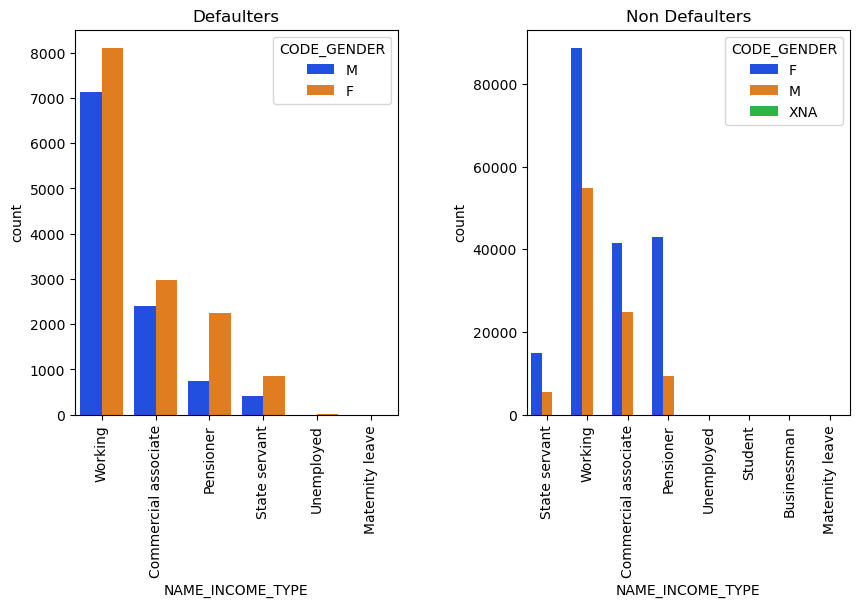

In [108]:
#Plotting count plot on the columns NAME_INCOME_TYPE V/S CODE_GENDER

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x='NAME_INCOME_TYPE',hue='CODE_GENDER', data= app_d_1,palette='bright')
plt.title("Defaulters")
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(x='NAME_INCOME_TYPE',hue='CODE_GENDER', data= app_d_0,palette='bright')
plt.title("Non Defaulters")
plt.xticks(rotation=90)
plt.subplots_adjust(wspace=0.4)

### Inference from the above analysis on NAME_INCOME_TYPE V/S CODE_GENDER
    1. From the above plot, we can infer that males in working type are more likely to default.
    2. Students and businessman of both gender where able to pay on time and also there are less number of observation      found.

#### Analysing the columns NAME_EDUCATION_TYPE V/S CODE_GENDER

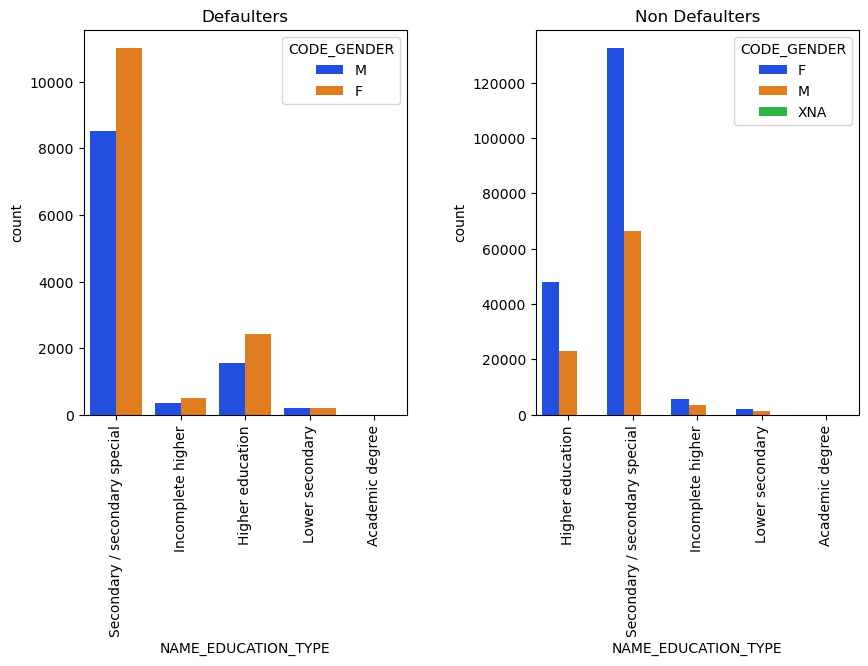

In [109]:
#Plotting count plot on the columns NAME_EDUCATION_TYPE V/S CODE_GENDER

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x='NAME_EDUCATION_TYPE',hue='CODE_GENDER', data= app_d_1,palette='bright')
plt.title("Defaulters")
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(x='NAME_EDUCATION_TYPE',hue='CODE_GENDER', data= app_d_0,palette='bright')
plt.title("Non Defaulters")
plt.xticks(rotation=90)
plt.subplots_adjust(wspace=0.4)

### Inference from the above analysis on NAME_EDUCATION_TYPE V/S CODE_GENDER
    1. From the above plot we could see that in secondary special, male have difficultis in on payment and females are more likely to repay the amount  on time.
    2. Females with higher education are more likely to repay the amount.

#### Analysing the columns 'OCCUPATION_TYPE','NAME_CONTRACT_TYPE'

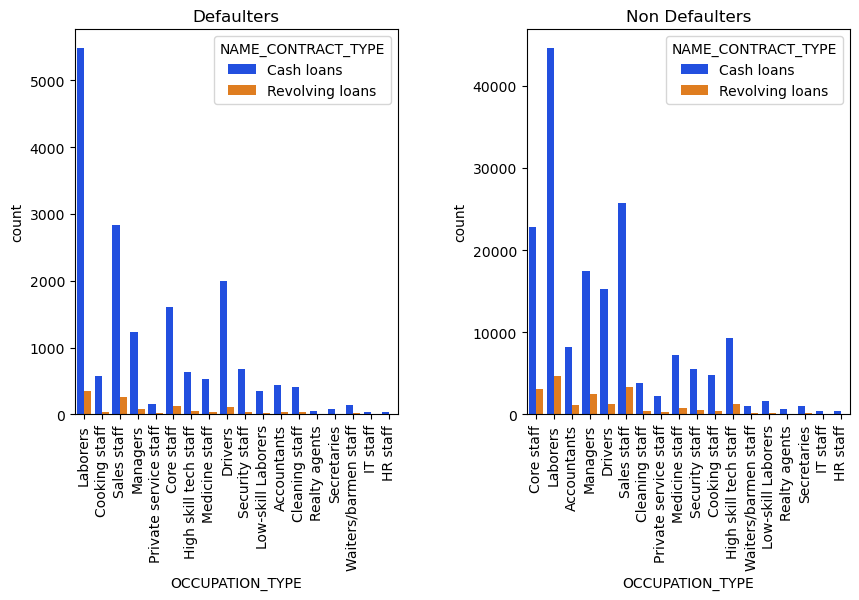

In [110]:
#Plotting count plot on the columns 'OCCUPATION_TYPE','NAME_CONTRACT_TYPE'

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x='OCCUPATION_TYPE',hue='NAME_CONTRACT_TYPE', data= app_d_1,palette='bright')
plt.title("Defaulters")
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(x='OCCUPATION_TYPE',hue='NAME_CONTRACT_TYPE', data= app_d_0,palette='bright')
plt.title("Non Defaulters")
plt.xticks(rotation=90)
plt.subplots_adjust(wspace=0.4)

### Inference from the above analysis on 'OCCUPATION_TYPE','NAME_CONTRACT_TYPE'
    1. From the above plot we could see that in core staff, drivers with cash loans are more likely to be defaulters.

## Categorical vs Numerical column

#### Analysing the columns AMT_CREDIT V/S NAME_EDUCATION_TYPE

In [111]:
app_d_1.groupby(by = ['NAME_EDUCATION_TYPE']).AMT_CREDIT.describe().head()

count           mean            std  \
NAME_EDUCATION_TYPE                                                    
Academic degree                    3.0  950245.500000  504711.375348   
Higher education                4009.0  645981.010851  410094.685355   
Incomplete higher                872.0  534740.986239  350600.260937   
Lower secondary                  417.0  481589.525180  268009.902708   
Secondary / secondary special  19524.0  542263.182160  330192.238006   

                                    min       25%       50%         75%  \
NAME_EDUCATION_TYPE                                                       
Academic degree                544491.0  667660.5  790830.0  1153122.75   
Higher education                45000.0  326439.0  545040.0   848745.00   
Incomplete higher               74628.0  270000.0  450000.0   675000.00   
Lower secondary                 50940.0  284400.0  450000.0   628114.50   
Secondary / secondary special   45000.0  284400.0  485640.0   704844.00   

                                     max  
NAME_EDUCATION_TYPE                       
Academic degree                1515415.5  
Higher education               2695500.0  
Incomplete higher              2695500.0  
Lower secondary                1546020.0  
Secondary / secondary special  4027680.0

In [112]:
app_d_0.groupby(by = ['NAME_EDUCATION_TYPE']).AMT_CREDIT.describe().head()

count           mean            std  \
NAME_EDUCATION_TYPE                                                     
Academic degree                   161.0  719290.844720  475782.447516   
Higher education                70854.0  692438.297379  466618.291991   
Incomplete higher                9405.0  569696.524880  396235.566096   
Lower secondary                  3399.0  490749.537511  328811.133220   
Secondary / secondary special  198867.0  574033.649640  379858.957660   

                                   min       25%       50%        75%  \
NAME_EDUCATION_TYPE                                                     
Academic degree                74182.5  337923.0  607500.0  1006920.0   
Higher education               45000.0  312768.0  574668.0   942300.0   
Incomplete higher              45000.0  258709.5  472500.0   781920.0   
Lower secondary                45000.0  241974.0  431280.0   675000.0   
Secondary / secondary special  45000.0  270000.0  497520.0   787131.0   

                                     max  
NAME_EDUCATION_TYPE                       
Academic degree                2463840.0  
Higher education               4050000.0  
Incomplete higher              2517300.0  
Lower secondary                2250000.0  
Secondary / secondary special  3150000.0

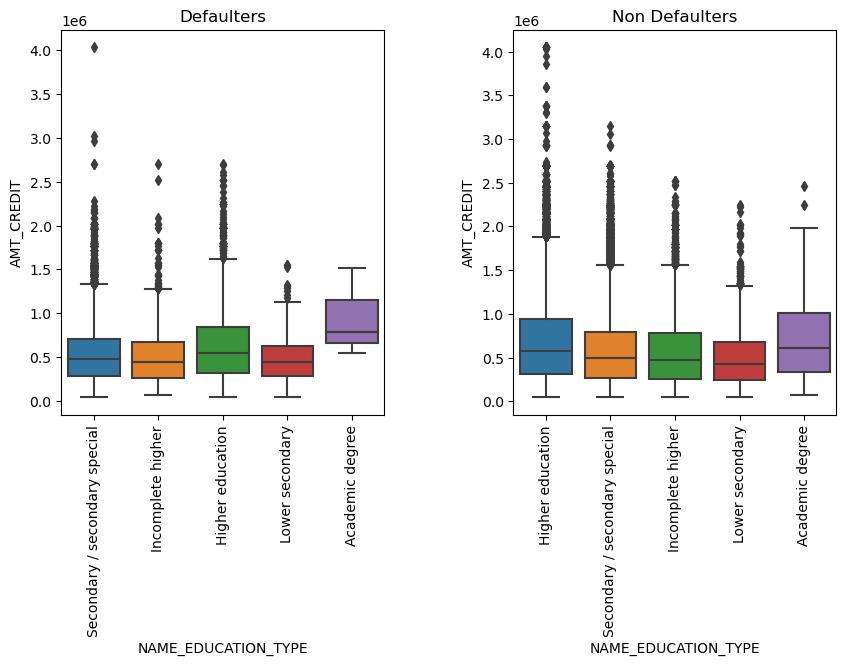

In [113]:


plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(x='NAME_EDUCATION_TYPE',y='AMT_CREDIT',data=app_d_1)
plt.title("Defaulters")
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.boxplot(x='NAME_EDUCATION_TYPE',y='AMT_CREDIT',data=app_d_0)
plt.xticks(rotation=90)
plt.title("Non Defaulters")
plt.subplots_adjust(wspace=0.4)

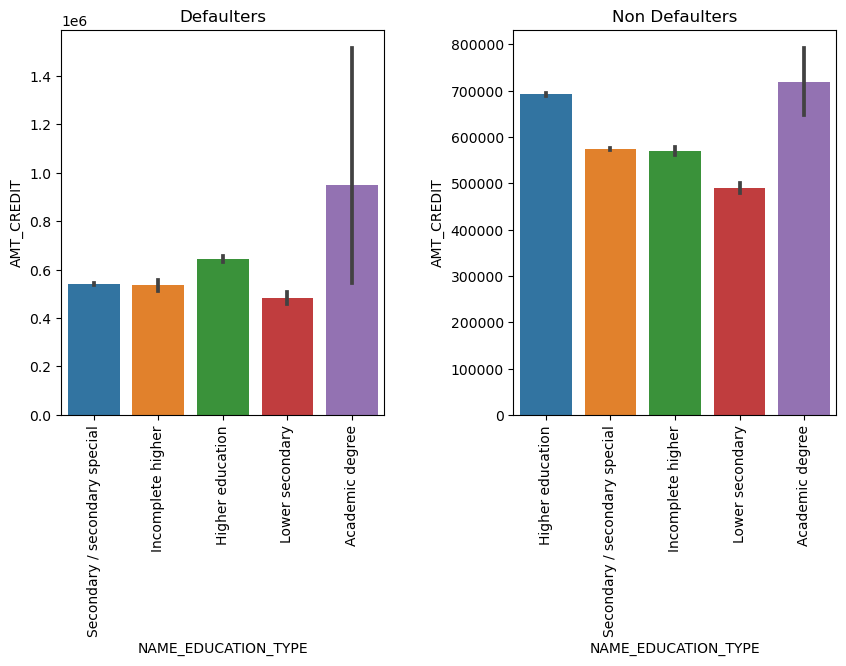

In [114]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.barplot(x='NAME_EDUCATION_TYPE',y='AMT_CREDIT',data=app_d_1)
plt.title("Defaulters")
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.barplot(x='NAME_EDUCATION_TYPE',y='AMT_CREDIT',data=app_d_0)
plt.xticks(rotation=90)
plt.title("Non Defaulters")
plt.subplots_adjust(wspace=0.4)

### Inference from the above analysis on AMT_CREDIT V/S NAME_EDUCATION_TYPE
    1. From the box plot we could see that 'Academic degree' has very less number of outliers and also has broader 3rd      quartile comparing others. 
    2. People with higher education are high in number in getting loans.People with Acadeemic degree are more likely to      default.

# 1.4.5 Multivariate analysis

#### Analysing the columns NAME_EDUCATION_TYPE, AMT_CREDIT, CODE_GENDER

In [115]:
app_d_1.groupby(by = ['NAME_EDUCATION_TYPE','CODE_GENDER']).AMT_CREDIT.describe()

count           mean  \
NAME_EDUCATION_TYPE           CODE_GENDER                           
Academic degree               F                3.0  950245.500000   
Higher education              F             2438.0  648500.581624   
                              M             1571.0  642070.944940   
Incomplete higher             F              504.0  520150.348214   
                              M              368.0  554723.816576   
Lower secondary               F              214.0  463681.871495   
                              M              203.0  500467.544335   
Secondary / secondary special F            11011.0  545461.521796   
                              M             8513.0  538126.342300   

                                                     std       min       25%  \
NAME_EDUCATION_TYPE           CODE_GENDER                                      
Academic degree               F            504711.375348  544491.0  667660.5   
Higher education              F            410415.703440   47970.0  323595.0   
                              M            409695.934841   45000.0  329202.0   
Incomplete higher             F            352227.493127   91692.0  269550.0   
                              M            347843.706372   74628.0  284400.0   
Lower secondary               F            276698.861494   50940.0  269662.5   
                              M            257868.829269   89388.0  311719.5   
Secondary / secondary special F            335125.668113   45000.0  283500.0   
                              M            323672.404216   45000.0  284400.0   

                                                50%          75%        max  
NAME_EDUCATION_TYPE           CODE_GENDER                                    
Academic degree               F            790830.0  1153122.750  1515415.5  
Higher education              F            545040.0   877500.000  2687355.0  
                              M            545040.0   832797.000  2695500.0  
Incomplete higher             F            450000.0   675000.000  2695500.0  
                              M            497520.0   699976.125  2013840.0  
Lower secondary               F            401580.0   599355.000  1325475.0  
                              M            457717.5   640080.000  1546020.0  
Secondary / secondary special F            490495.5   724248.000  4027680.0  
                              M            479974.5   679500.000  2961000.0

In [116]:
app_d_0.groupby(by = ['NAME_EDUCATION_TYPE','CODE_GENDER']).AMT_CREDIT.describe()

count           mean  \
NAME_EDUCATION_TYPE           CODE_GENDER                            
Academic degree               F                97.0  708770.737113   
                              M                64.0  735235.382812   
Higher education              F             47851.0  682490.801133   
                              M             23002.0  713144.543844   
                              XNA               1.0  405000.000000   
Incomplete higher             F              5779.0  555343.188787   
                              M              3625.0  592586.904414   
                              XNA               1.0  540000.000000   
Lower secondary               F              2097.0  476462.358369   
                              M              1302.0  513760.455069   
Secondary / secondary special F            132454.0  567125.136108   
                              M             66411.0  587819.857027   
                              XNA               2.0  326250.000000   

                                                     std       min       25%  \
NAME_EDUCATION_TYPE           CODE_GENDER                                      
Academic degree               F            463052.418484  130824.0  354469.5   
                              M            497739.972619   74182.5  309519.0   
Higher education              F            456645.788200   45000.0  302206.5   
                              M            486073.660453   45000.0  315000.0   
                              XNA                    NaN  405000.0  405000.0   
Incomplete higher             F            386013.944548   45000.0  253737.0   
                              M            411077.547244   45000.0  269982.0   
                              XNA                    NaN  540000.0  540000.0   
Lower secondary               F            320800.325909   45000.0  229230.0   
                              M            340183.479332   47970.0  260586.0   
Secondary / secondary special F            375246.617357   45000.0  269550.0   
                              M            388533.792660   45000.0  270000.0   
                              XNA           79549.512883  270000.0  298125.0   

                                                50%        75%        max  
NAME_EDUCATION_TYPE           CODE_GENDER                                  
Academic degree               F            607500.0  1006920.0  2463840.0  
                              M            610056.0  1036890.0  1984500.0  
Higher education              F            568057.5   916470.0  4050000.0  
                              M            592560.0   973503.0  4050000.0  
                              XNA          405000.0   405000.0   405000.0  
Incomplete higher             F            454500.0   760225.5  2517300.0  
                              M            490536.0   808650.0  2517300.0  
                              XNA          540000.0   540000.0   540000.0  
Lower secondary               F            405000.0   675000.0  2013840.0  
                              M            450000.0   675000.0  2250000.0  
Secondary / secondary special F            495891.0   781920.0  3150000.0  
                              M            508495.5   808650.0  2931660.0  
                              XNA          326250.0   354375.0   382500.0

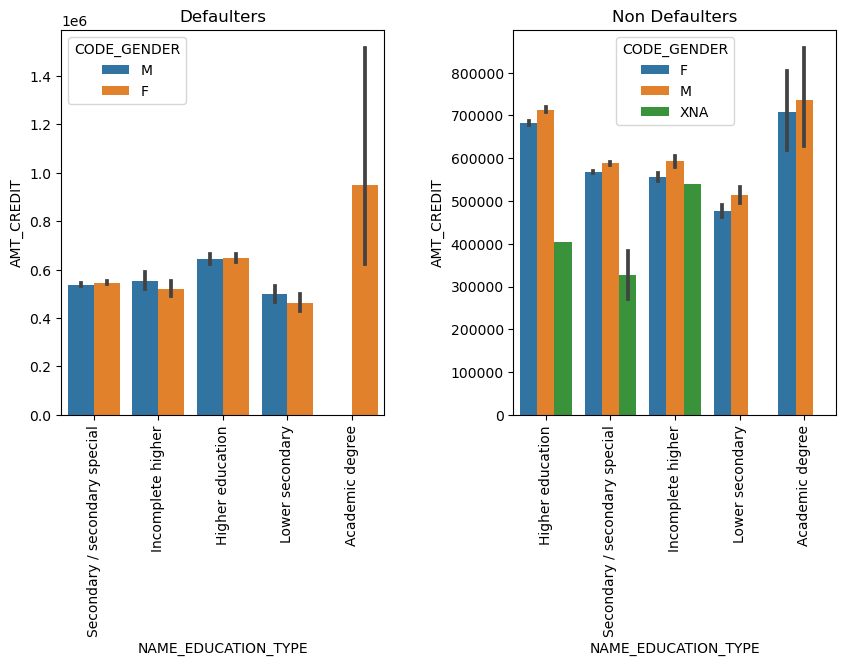

In [117]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.barplot(data =app_d_1, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='CODE_GENDER',)
plt.title("Defaulters")
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.barplot(x='NAME_EDUCATION_TYPE',y='AMT_CREDIT',data=app_d_0,hue='CODE_GENDER')
plt.xticks(rotation=90)
plt.title("Non Defaulters")
plt.subplots_adjust(wspace=0.4)

### Inference from the above analysis on NAME_EDUCATION_TYPE, AMT_CREDIT, CODE_GENDER
    1. Male applicants are has no difficulties on paying the amount on time who has academic degree.
    2. Mean and median of academic degree has higher values than non defaulters.

#### Analysing the columns NAME_FAMILY_STATUS, AMT_INCOME_TOTAL, CODE_GENDER

In [118]:
app_d_1.groupby(by = ['NAME_FAMILY_STATUS','CODE_GENDER']).AMT_INCOME_TOTAL.describe()

count           mean           std  \
NAME_FAMILY_STATUS   CODE_GENDER                                        
Civil marriage       F            1753.0  153620.720194  1.010459e+05   
                     M            1208.0  173949.988411  9.244917e+04   
Married              F            8324.0  159907.850853  1.283283e+06   
                     M            6526.0  182233.063975  9.478777e+04   
Separated            F            1045.0  161159.546411  8.263333e+04   
                     M             575.0  178888.280870  8.503485e+04   
Single / not married F            2220.0  150373.572973  7.699614e+04   
                     M            2237.0  166827.989048  8.047161e+04   
Widow                F             828.0  141806.896739  6.764706e+04   
                     M             109.0  145368.701835  6.754357e+04   

                                      min       25%       50%       75%  \
NAME_FAMILY_STATUS   CODE_GENDER                                          
Civil marriage       F            25650.0  108000.0  135000.0  180000.0   
                     M            36000.0  117000.0  157500.0  202500.0   
Married              F            27000.0   90000.0  135000.0  180000.0   
                     M            31500.0  126000.0  157500.0  225000.0   
Separated            F            36000.0  112500.0  135000.0  202500.0   
                     M            45000.0  126000.0  157500.0  225000.0   
Single / not married F            31500.0  103500.0  135000.0  180000.0   
                     M            40500.0  112500.0  157500.0  202500.0   
Widow                F            28575.0   90000.0  130500.0  180000.0   
                     M            45000.0   90000.0  135000.0  180000.0   

                                          max  
NAME_FAMILY_STATUS   CODE_GENDER               
Civil marriage       F              3150000.0  
                     M              1350000.0  
Married              F            117000000.0  
                     M              1890000.0  
Separated            F               832500.0  
                     M               675000.0  
Single / not married F               810000.0  
                     M               990000.0  
Widow                F               540000.0  
                     M               360000.0

In [119]:
app_d_0.groupby(by = ['NAME_FAMILY_STATUS','CODE_GENDER']).AMT_INCOME_TOTAL.describe()

count           mean            std  \
NAME_FAMILY_STATUS   CODE_GENDER                                           
Civil marriage       F             19016.0  162081.562557  106812.505915   
                     M              7797.0  184126.294363  106559.488198   
                     XNA               1.0  247500.000000            NaN   
Married              F            114121.0  154288.788885   88594.708463   
                     M             67458.0  199589.116133  147597.710029   
                     XNA               3.0  166500.000000   36834.087473   
Separated            F             14416.0  166374.209767   94782.184577   
                     M              3734.0  191625.458356  102991.275912   
Single / not married F             26364.0  160796.867506   89306.040122   
                     M             14623.0  183592.862532  117388.187402   
Unknown              F                 1.0  202500.000000            NaN   
                     M                 1.0  450000.000000            NaN   
Widow                F             14360.0  142114.631481   76227.052530   
                     M               791.0  160029.193426   95460.171022   

                                       min       25%       50%       75%  \
NAME_FAMILY_STATUS   CODE_GENDER                                           
Civil marriage       F             27000.0  112500.0  135000.0  202500.0   
                     M             27000.0  121500.0  157500.0  225000.0   
                     XNA          247500.0  247500.0  247500.0  247500.0   
Married              F             26100.0   94500.0  135000.0  180000.0   
                     M             27000.0  135000.0  180000.0  225000.0   
                     XNA          135000.0  146250.0  157500.0  182250.0   
Separated            F             27000.0  112500.0  139500.0  202500.0   
                     M             32850.0  135000.0  180000.0  225000.0   
Single / not married F             25650.0  112500.0  135000.0  198000.0   
                     M             27000.0  121500.0  157500.0  225000.0   
Unknown              F            202500.0  202500.0  202500.0  202500.0   
                     M            450000.0  450000.0  450000.0  450000.0   
Widow                F             26100.0   90000.0  126000.0  180000.0   
                     M             28350.0   99000.0  135000.0  202500.0   

                                         max  
NAME_FAMILY_STATUS   CODE_GENDER              
Civil marriage       F             9000000.0  
                     M             3825000.0  
                     XNA            247500.0  
Married              F             3600000.0  
                     M            18000090.0  
                     XNA            207000.0  
Separated            F             2250000.0  
                     M             1235038.5  
Single / not married F             2250000.0  
                     M             4500000.0  
Unknown              F              202500.0  
                     M              450000.0  
Widow                F             1800000.0  
                     M             1035000.0

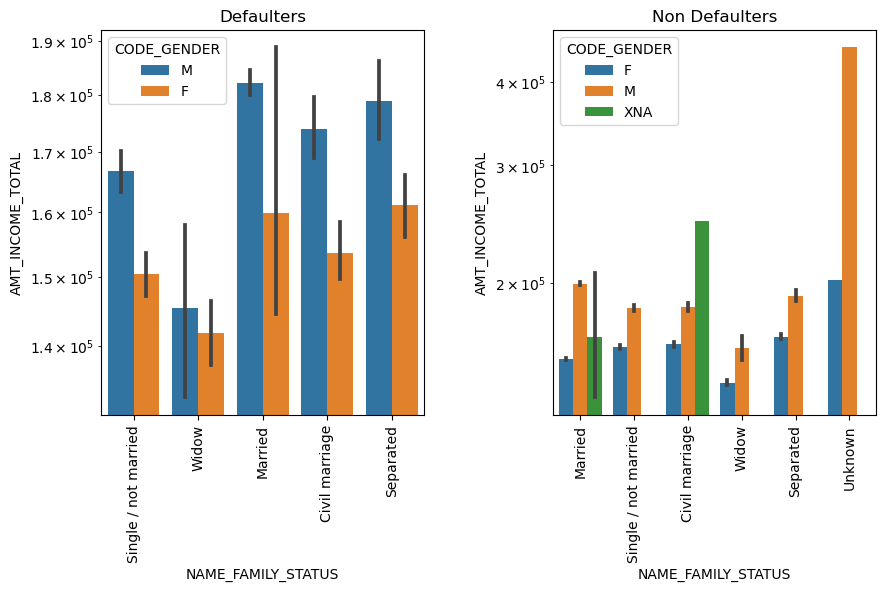

In [120]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.barplot(x='NAME_FAMILY_STATUS',y='AMT_INCOME_TOTAL',data=app_d_1,hue='CODE_GENDER')
plt.title("Defaulters")
plt.xticks(rotation=90)
plt.yscale('log')

plt.subplot(1,2,2)
sns.barplot(x='NAME_FAMILY_STATUS',y='AMT_INCOME_TOTAL',data=app_d_0,hue='CODE_GENDER')
plt.xticks(rotation=90)
plt.title("Non Defaulters")
plt.subplots_adjust(wspace=0.4)
plt.yscale('log')

### Inference from the above analysis on NAME_FAMILY_STATUS, AMT_INCOME_TOTAL, CODE_GENDER
      1. Married male and seperated  male has quite higher mean and median in on payments.
      2. Widowed male has less difficulty in doing payment on time.

#### Analysing the columns Age_group, AMT_INCOME_TOTAL , NAME_HOUSING_TYPE

In [121]:
app_d_1.groupby(by = ['Age_group','NAME_HOUSING_TYPE']).AMT_INCOME_TOTAL.describe()

count           mean           std       min  \
Age_group NAME_HOUSING_TYPE                                                    
20-25     Co-op apartment        14.0  131542.714286  5.085971e+04   67500.0   
          House / apartment    1048.0  141153.140267  6.096344e+04   31500.0   
          Municipal apartment    33.0  145772.727273  4.920431e+04   58500.0   
          Office apartment        7.0  125357.142857  3.341621e+04   67500.0   
          Rented apartment       77.0  135778.558442  6.015555e+04   49500.0   
          With parents          317.0  131392.831230  5.021097e+04   36000.0   
25-30     Co-op apartment        25.0  154242.000000  6.119218e+04   76500.0   
          House / apartment    2804.0  154779.587910  7.287305e+04   36000.0   
          Municipal apartment   106.0  158421.226415  8.727951e+04   50400.0   
          Office apartment       30.0  148950.000000  5.338028e+04   67500.0   
          Rented apartment      137.0  148187.956204  5.986064e+04   45000.0   
          With parents          560.0  147874.451786  7.440065e+04   27900.0   
30-35     Co-op apartment        16.0  182556.562500  1.109171e+05   81000.0   
          House / apartment    3323.0  199319.867740  2.028551e+06   27000.0   
          Municipal apartment   147.0  158724.489796  8.672980e+04   45000.0   
          Office apartment       30.0  184297.950000  1.135201e+05   52438.5   
          Rented apartment      121.0  162298.450413  6.872245e+04   36000.0   
          With parents          418.0  150713.321770  7.187756e+04   45000.0   
35-40     Co-op apartment        11.0  224181.818182  6.782377e+04  135000.0   
          House / apartment    3320.0  168622.576807  1.026551e+05   32400.0   
          Municipal apartment   137.0  170241.240876  8.492715e+04   38250.0   
          Office apartment       31.0  173540.322581  7.984751e+04   67500.0   
          Rented apartment      114.0  169125.000000  6.605822e+04   67500.0   
          With parents          220.0  154597.500000  6.305918e+04   40500.0   
40-45     Co-op apartment         8.0  218250.000000  1.085877e+05   58500.0   
          House / apartment    2905.0  170045.287435  9.295814e+04   27000.0   
          Municipal apartment   137.0  164939.781022  9.563704e+04   45000.0   
          Office apartment       26.0  182769.230769  7.669644e+04   54000.0   
          Rented apartment       55.0  171000.000000  9.918543e+04   40500.0   
          With parents          119.0  193598.319328  1.332965e+05   40500.0   
45-50     Co-op apartment         4.0  174375.000000  6.462633e+04   90000.0   
          House / apartment    2366.0  171961.758030  9.840813e+04   31500.0   
          Municipal apartment   121.0  163606.611570  8.622392e+04   63000.0   
          Office apartment       10.0  180000.000000  1.220266e+05   54000.0   
          Rented apartment       49.0  183994.897959  1.260011e+05   56250.0   
          With parents           56.0  178698.214286  1.067591e+05   45450.0   
50-55     Co-op apartment         6.0  177000.000000  1.093293e+05   54000.0   
          House / apartment    2156.0  169668.697124  9.184588e+04   27000.0   
          Municipal apartment   111.0  162334.054054  8.255086e+04   36000.0   
          Office apartment       15.0  135000.000000  4.085558e+04   76500.0   
          Rented apartment       21.0  156214.285714  6.457371e+04   67500.0   
          With parents           31.0  157282.258065  7.897544e+04   49500.0   
55-60     Co-op apartment         2.0  157500.000000  3.181981e+04  135000.0   
          House / apartment    1699.0  154363.921130  8.089576e+04   25650.0   
          Municipal apartment    93.0  152724.193548  7.601758e+04   37350.0   
          Office apartment        8.0  185062.500000  4.703907e+04  135000.0   
          Rented apartment       19.0  160673.684211  7.440748e+04   63000.0   
          With parents           11.0  183681.818182  1.116656e+05   58500.0   
60 Above  Co-op apartment       

In [122]:
app_d_0.groupby(by = ['Age_group','NAME_HOUSING_TYPE']).AMT_INCOME_TOTAL.describe()

count           mean            std      min  \
Age_group NAME_HOUSING_TYPE                                                     
20-25     Co-op apartment        101.0  153908.910891   67387.916349  45000.0   
          House / apartment     7383.0  148939.352011   73275.661062  31500.0   
          Municipal apartment    221.0  148349.321267  101214.990410  45000.0   
          Office apartment        99.0  159136.363636   72794.040186  45000.0   
          Rented apartment       473.0  139657.519027   61593.306108  29250.0   
          With parents          2386.0  138296.134954   59363.663877  27000.0   
25-30     Co-op apartment        180.0  164963.000000   81724.796029  45000.0   
          House / apartment    22995.0  167492.958035   96776.472364  27000.0   
          Municipal apartment    779.0  168725.160462   84520.159390  45000.0   
          Office apartment       306.0  182741.941176  129769.841004  36000.0   
          Rented apartment       970.0  158237.387629   70342.118783  36000.0   
          With parents          3970.0  158742.177234  104985.502674  31500.0   
30-35     Co-op apartment        150.0  173320.980000   86777.536808  63000.0   
          House / apartment    29877.0  177374.651607  101110.658045  27000.0   
          Municipal apartment   1063.0  180539.407338   85324.878148  31500.0   
          Office apartment       415.0  196585.481928  106067.397686  45000.0   
          Rented apartment       902.0  172138.794346   91601.198853  40500.0   
          With parents          2978.0  165610.662552   87376.718918  27000.0   
35-40     Co-op apartment        168.0  162650.892857   76041.632836  49500.0   
          House / apartment    34596.0  181136.013586  129564.828721  27000.0   
          Municipal apartment   1384.0  182728.882587  101049.625777  40500.0   
          Office apartment       396.0  210572.613636  113397.734026  45000.0   
          Rented apartment       659.0  177067.147193   93804.593486  36000.0   
          With parents          1832.0  168493.286299   90770.425669  36000.0   
40-45     Co-op apartment        138.0  193370.967391  108866.458872  54000.0   
          House / apartment    34620.0  182762.894684  150830.168956  26550.0   
          Municipal apartment   1575.0  174654.728571  122354.989172  29250.0   
          Office apartment       338.0  205444.158284  121278.448294  27967.5   
          Rented apartment       486.0  189520.861111  103324.203187  45000.0   
          With parents           999.0  174821.860360  100172.792218  40500.0   
45-50     Co-op apartment         92.0  168383.152174   78095.078455  45000.0   
          House / apartment    30139.0  179728.824867  104298.890313  27000.0   
          Municipal apartment   1271.0  182199.756491  104556.239680  36000.0   
          Office apartment       262.0  205517.181298  117416.688646  67500.0   
          Rented apartment       315.0  181562.857143   99905.359602  45000.0   
          With parents           450.0  170672.800000   87286.551625  25650.0   
50-55     Co-op apartment         60.0  175725.000000   78005.781239  67500.0   
          House / apartment    30375.0  171560.600179  115939.275703  27000.0   
          Municipal apartment   1448.0  167811.013467   97887.010297  30150.0   
          Office apartment       235.0  171359.923404   99065.721227  33300.0   
          Rented apartment       222.0  186379.054054  127961.045580  45000.0   
          With parents           262.0  169629.423664   84129.421219  27000.0   
55-60     Co-op apartment         79.0  164517.721519   78676.466294  45000.0   
          House / apartment    29494.0  158868.586327   92337.178955  26100.0   
          Municipal apartment   1249.0  155570.033227   86985.124102  29700.0   
          Office apartment       196.0  170353.790816  171579.940915  28593.0   
          Rented apartment       132.0  166997.727273   94321.684397  28350.0   
          With parents           138.0  154890.945652   74935.37

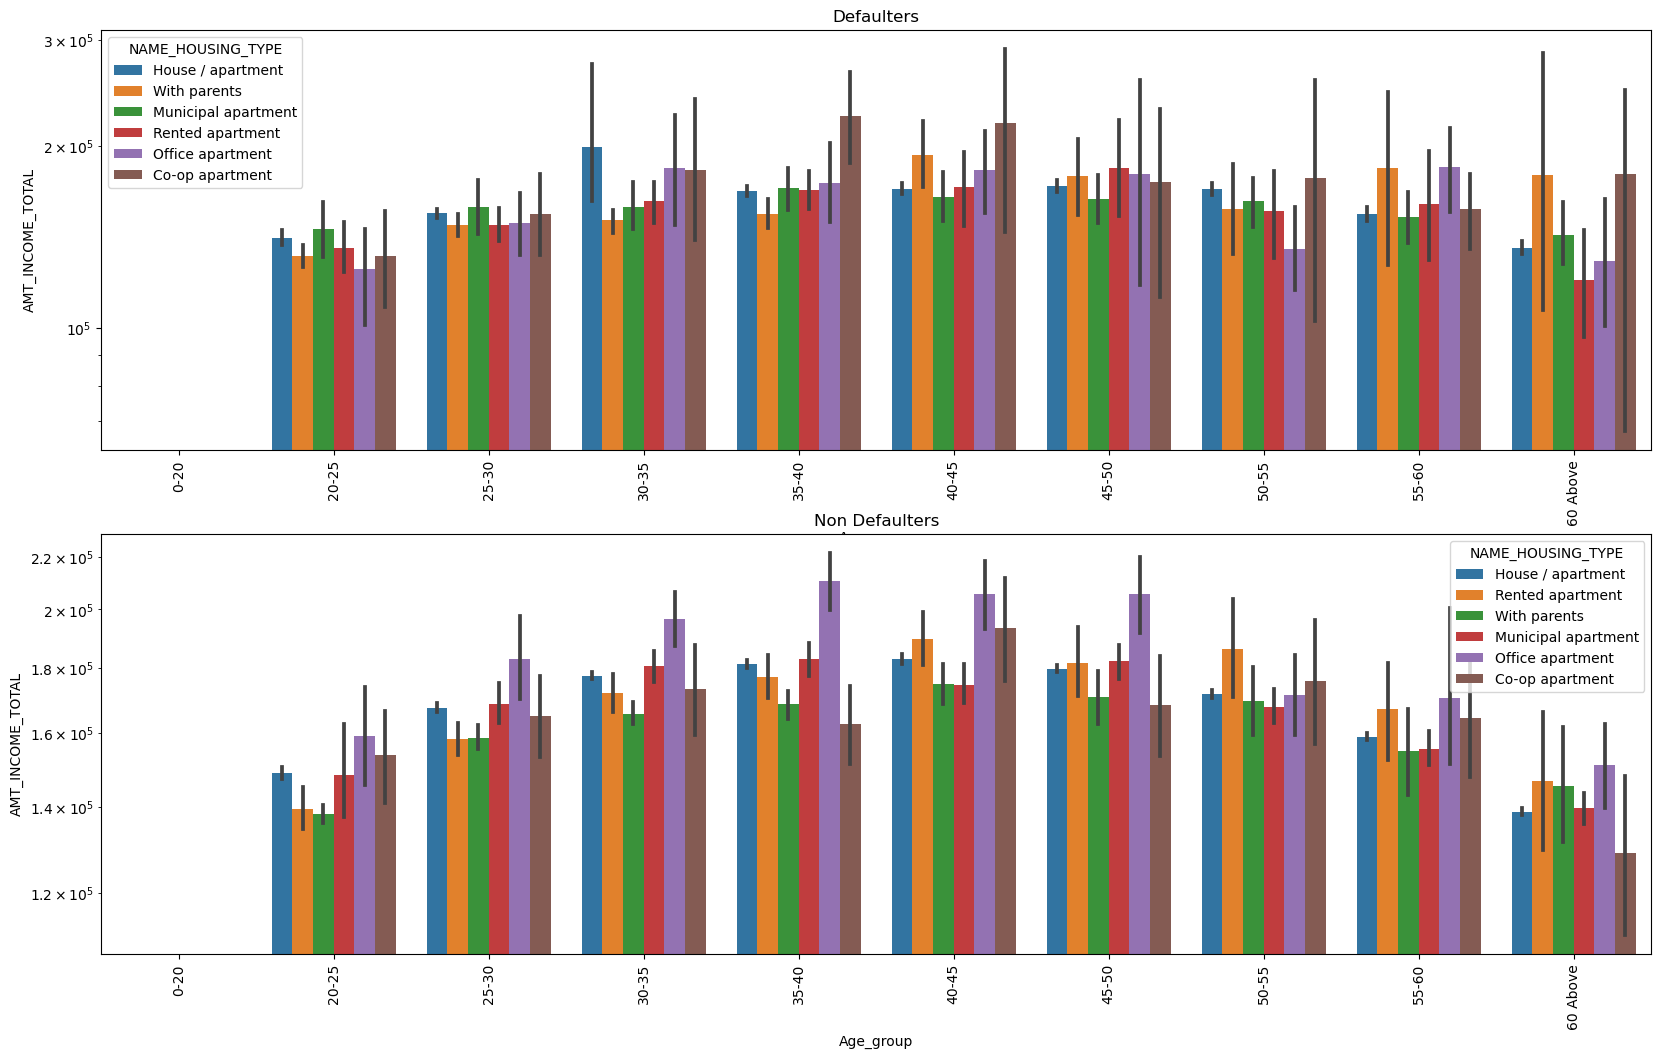

In [123]:
plt.figure(figsize = [20,12])
plt.subplot(2,1,1)
sns.barplot(x='Age_group',y='AMT_INCOME_TOTAL',data=app_d_1,hue='NAME_HOUSING_TYPE')
plt.title("Defaulters")
plt.xticks(rotation=90)
plt.yscale('log')

plt.subplot(2,1,2)
sns.barplot(x='Age_group',y='AMT_INCOME_TOTAL',data=app_d_0,hue='NAME_HOUSING_TYPE')
plt.xticks(rotation=90)
plt.title("Non Defaulters")
plt.subplots_adjust(wspace=0.4)
plt.yscale('log')

### Inference from the above analysis on Age_group, AMT_INCOME_TOTAL , NAME_HOUSING_TYPE
      1. People aged above 60 and living in Co-op apartment had shown a significant increase in payment difficulties.

#### Analysing the columns FLAG_OWN_CAR, AMT_ANNUITY, CODE_GENDER

In [125]:
app_d_1.groupby(by = ['FLAG_OWN_CAR','CODE_GENDER']).AMT_ANNUITY.describe()

count          mean           std     min  \
FLAG_OWN_CAR CODE_GENDER                                                
N            F            11567.0  24910.533717  11855.563615  2722.5   
             M             5682.0  26258.836061  12075.777539  3172.5   
Y            F             2603.0  28577.909527  13256.174575  3559.5   
             M             4973.0  29293.817313  13130.940168  4374.0   

                                25%       50%       75%       max  
FLAG_OWN_CAR CODE_GENDER                                           
N            F            16350.750  23715.00  31261.50  149211.0  
             M            17517.375  25202.25  32352.75  127507.5  
Y            F            18969.750  26797.50  35961.75  128178.0  
             M            20007.000  27558.00  36459.00  115803.0

In [126]:
app_d_0.groupby(by = ['FLAG_OWN_CAR','CODE_GENDER']).AMT_ANNUITY.describe()

count          mean           std      min  \
FLAG_OWN_CAR CODE_GENDER                                                  
N            F            145915.0  25351.374461  13579.077073   1615.5   
             M             39749.0  26799.801001  14295.319107   1980.0   
             XNA               2.0  16875.000000   4772.970773  13500.0   
Y            F             42355.0  29830.540692  15706.261079   1993.5   
             M             54651.0  30200.482077  15988.655901   2317.5   
             XNA               2.0  23062.500000   5568.465902  19125.0   

                               25%      50%       75%       max  
FLAG_OWN_CAR CODE_GENDER                                         
N            F            15448.50  23283.0  32125.50  230161.5  
             M            16294.50  24750.0  34114.50  225000.0  
             XNA          15187.50  16875.0  18562.50   20250.0  
Y            F            18409.50  27085.5  38133.00  225000.0  
             M            19125.00  27630.0  38322.00  258025.5  
             XNA          21093.75  23062.5  25031.25   27000.0

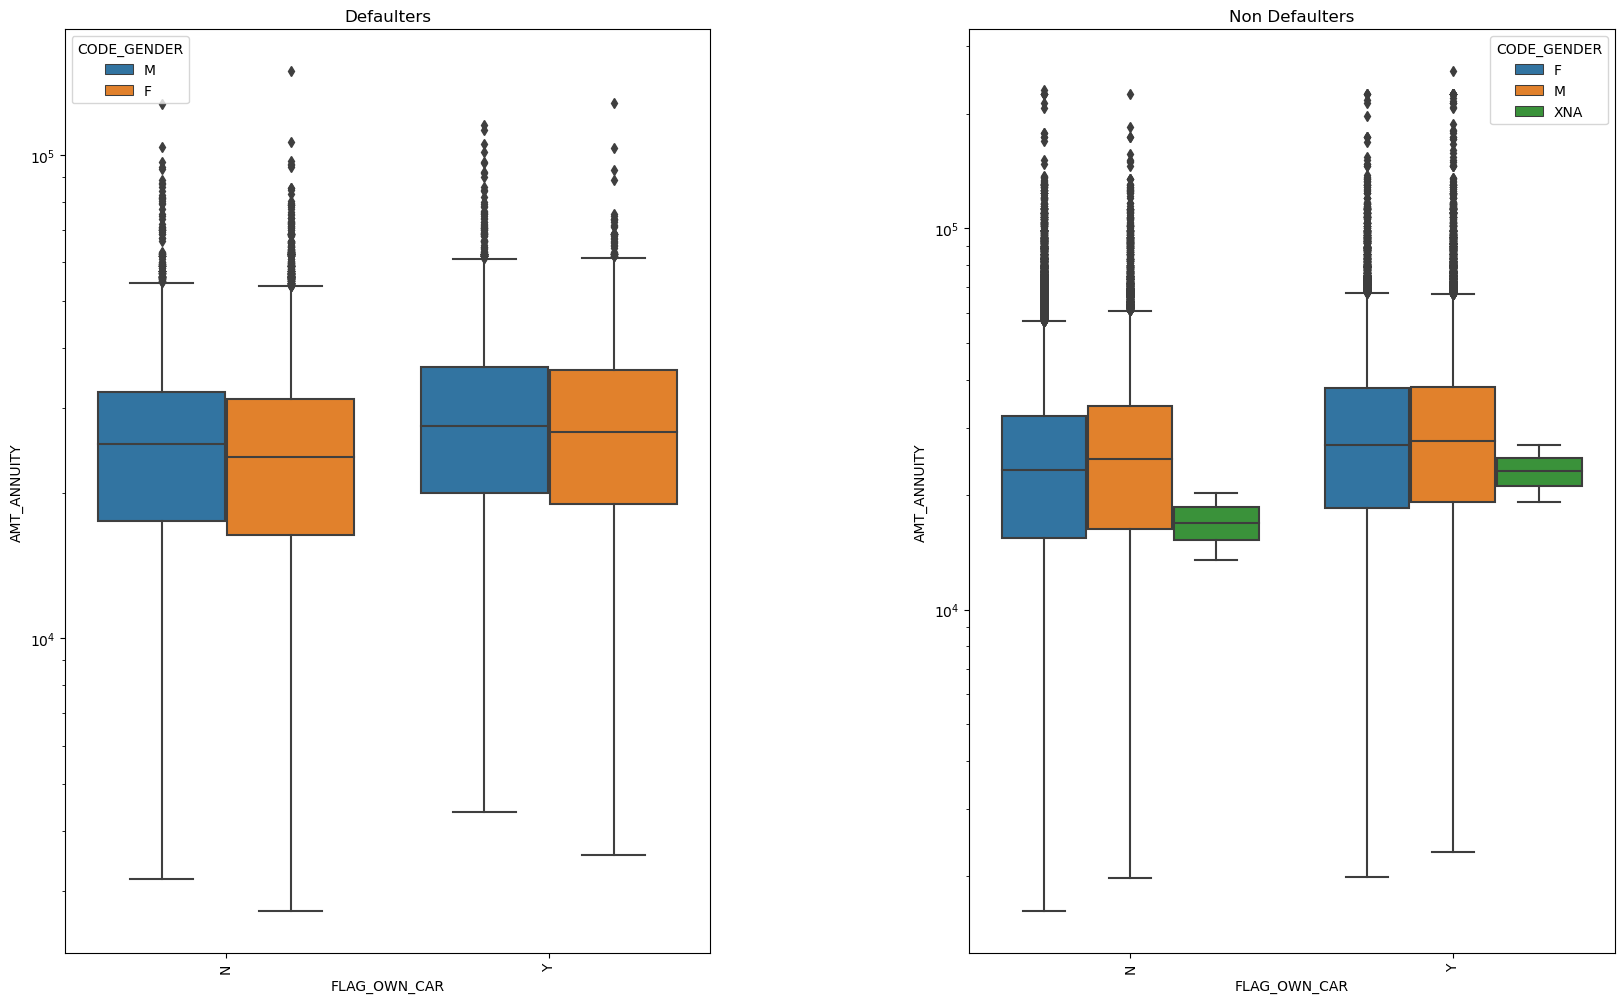

In [127]:
plt.figure(figsize = [20,12])
plt.subplot(1,2,1)
sns.boxplot(x='FLAG_OWN_CAR',y='AMT_ANNUITY',data=app_d_1,hue='CODE_GENDER')
plt.title("Defaulters")
plt.xticks(rotation=90)
plt.yscale('log')

plt.subplot(1,2,2)
sns.boxplot(x='FLAG_OWN_CAR',y='AMT_ANNUITY',data=app_d_0,hue='CODE_GENDER')
plt.xticks(rotation=90)
plt.title("Non Defaulters")
plt.subplots_adjust(wspace=0.4)
plt.yscale('log')

### Inference from the above analysis on FLAG_OWN_CAR, AMT_ANNUITY, CODE_GENDER
      1. No conclusive evidence can be derived a there is no significant difference.

#### Analysing the columns NAME_INCOME_TYPE , AMT_GOODS_PRICE, CODE_GENDER

In [128]:
app_d_1.groupby(by = ['NAME_INCOME_TYPE','CODE_GENDER']).AMT_GOODS_PRICE.describe()

count           mean            std  \
NAME_INCOME_TYPE     CODE_GENDER                                         
Commercial associate F            2966.0  536362.214262  353710.652628   
                     M            2391.0  526387.309912  335859.941286   
Maternity leave      F               2.0  929250.000000  715945.615951   
Pensioner            F            2241.0  495016.255020  317042.451456   
                     M             739.0  486543.075101  321104.431714   
State servant        F             845.0  544343.655621  336441.615365   
                     M             402.0  536955.223881  339694.979045   
Unemployed           F               6.0  653250.000000  321180.439940   
                     M               2.0  546750.000000   54093.668761   
Working              F            8092.0  470567.564755  297850.814382   
                     M            7118.0  466368.636204  286902.625313   

                                       min       25%       50%        75%  \
NAME_INCOME_TYPE     CODE_GENDER                                            
Commercial associate F             45000.0  270000.0  450000.0   675000.0   
                     M             45000.0  270000.0  450000.0   675000.0   
Maternity leave      F            423000.0  676125.0  929250.0  1182375.0   
Pensioner            F             45000.0  229500.0  450000.0   675000.0   
                     M             45000.0  229500.0  450000.0   675000.0   
State servant        F             45000.0  270000.0  450000.0   675000.0   
                     M             45000.0  270000.0  450000.0   675000.0   
Unemployed           F            328500.0  433125.0  603000.0   745875.0   
                     M            508500.0  527625.0  546750.0   565875.0   
Working              F             45000.0  229500.0  450000.0   675000.0   
                     M             45000.0  238500.0  450000.0   652500.0   

                                        max  
NAME_INCOME_TYPE     CODE_GENDER             
Commercial associate F            3600000.0  
                     M            2961000.0  
Maternity leave      F            1435500.0  
Pensioner            F            2173500.0  
                     M            1800000.0  
State servant        F            1800000.0  
                     M            1980000.0  
Unemployed           F            1215000.0  
                     M             585000.0  
Working              F            2254500.0  
                     M            2250000.0

In [129]:
app_d_0.groupby(by = ['NAME_INCOME_TYPE','CODE_GENDER']).AMT_GOODS_PRICE.describe()

count          mean           std  \
NAME_INCOME_TYPE     CODE_GENDER                                        
Businessman          F                3.0  1.125000e+06  1.031080e+06   
                     M                7.0  1.272857e+06  7.551041e+05   
Commercial associate F            41521.0  6.022355e+05  4.008271e+05   
                     M            24691.0  6.202202e+05  4.224455e+05   
                     XNA              1.0  9.000000e+05           NaN   
Maternity leave      F                2.0  5.625000e+05  3.500179e+05   
                     M                1.0  7.650000e+05           NaN   
Pensioner            F            43001.0  4.819800e+05  3.428263e+05   
                     M             9358.0  5.150351e+05  3.730444e+05   
State servant        F            14993.0  5.977504e+05  3.998562e+05   
                     M             5440.0  6.291650e+05  4.394893e+05   
Student              F                7.0  3.381429e+05  1.672973e+05   
                     M               11.0  5.346818e+05  2.809515e+05   
Unemployed           F               11.0  7.879091e+05  5.102986e+05   
                     M                3.0  1.045500e+06  2.918531e+05   
Working              F            88569.0  5.193865e+05  3.499810e+05   
                     M            54807.0  5.290899e+05  3.601533e+05   
                     XNA              3.0  2.625000e+05  6.495191e+04   

                                       min       25%        50%        75%  \
NAME_INCOME_TYPE     CODE_GENDER                                             
Businessman          F            225000.0  562500.0   900000.0  1575000.0   
                     M            495000.0  607500.0  1350000.0  1800000.0   
Commercial associate F             45000.0  270000.0   472500.0   837000.0   
                     M             45000.0  270000.0   472500.0   900000.0   
                     XNA          900000.0  900000.0   900000.0   900000.0   
Maternity leave      F            315000.0  438750.0   562500.0   686250.0   
                     M            765000.0  765000.0   765000.0   765000.0   
Pensioner            F             45000.0  225000.0   450000.0   675000.0   
                     M             45000.0  225000.0   450000.0   675000.0   
State servant        F             45000.0  270000.0   472500.0   819000.0   
                     M             45000.0  270000.0   472500.0   900000.0   
Student              F            180000.0  209250.0   238500.0   472500.0   
                     M             90000.0  411750.0   468000.0   654750.0   
Unemployed           F            135000.0  510750.0   634500.0   983250.0   
                     M            855000.0  877500.0   900000.0  1140750.0   
Working              F             45000.0  234000.0   450000.0   679500.0   
                     M             40500.0  238500.0   450000.0   679500.0   
                     XNA          225000.0  225000.0   225000.0   281250.0   

                                        max  
NAME_INCOME_TYPE     CODE_GENDER             
Businessman          F            2250000.0  
                     M            2250000.0  
Commercial associate F            4050000.0  
                     M            4050000.0  
                     XNA           900000.0  
Maternity leave      F             810000.0  
                     M             765000.0  
Pensioner            F            3150000.0  
                     M            2250000.0  
State servant        F            2700000.0  
                     M            3600000.0  
Student              F             585000.0  
                     M            1206000.0  
Unemployed           F            1804500.0  
                     M            1381500.0  
Working              F            2700000.0  
                     M            3712500.0  
                     XNA           337500.0

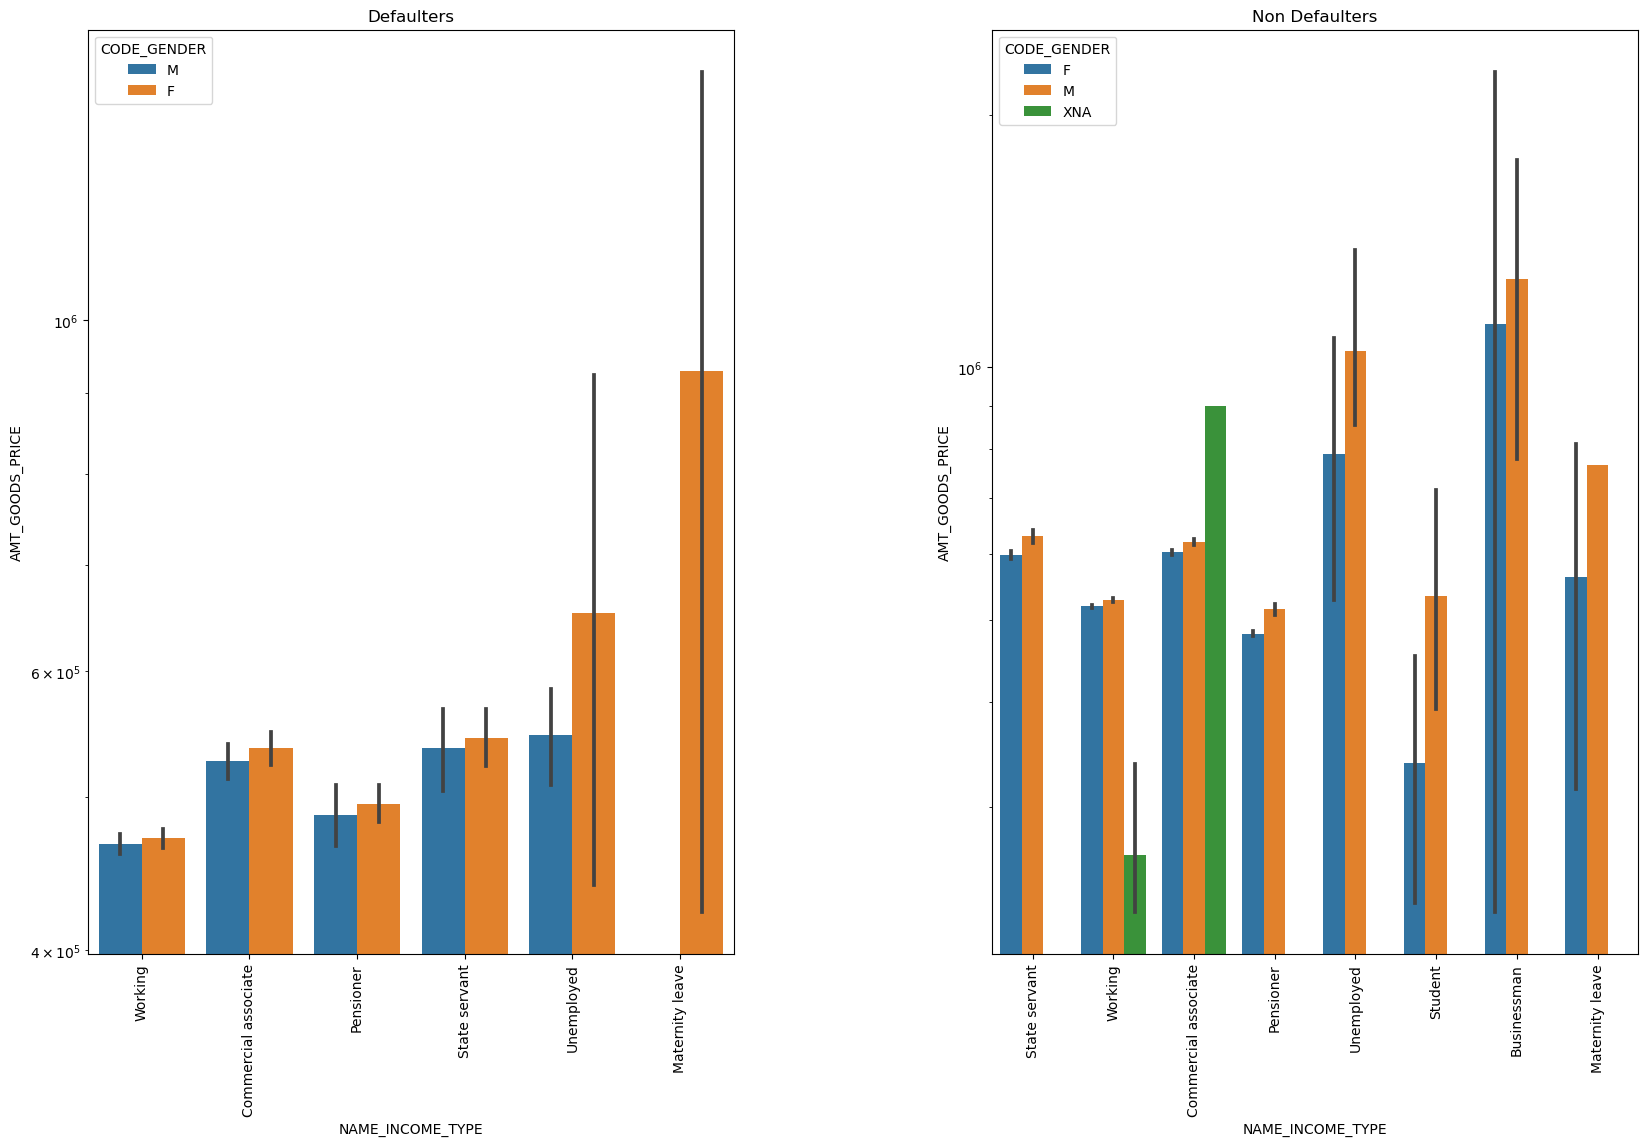

In [130]:
plt.figure(figsize = [20,12])
plt.subplot(1,2,1)
sns.barplot(x='NAME_INCOME_TYPE',y='AMT_GOODS_PRICE',data=app_d_1,hue='CODE_GENDER')
plt.title("Defaulters")
plt.xticks(rotation=90)
plt.yscale('log')

plt.subplot(1,2,2)
sns.barplot(x='NAME_INCOME_TYPE',y='AMT_GOODS_PRICE',data=app_d_0,hue='CODE_GENDER')
plt.xticks(rotation=90)
plt.title("Non Defaulters")
plt.subplots_adjust(wspace=0.4)
plt.yscale('log')

### Inference from the above analysis on  NAME_INCOME_TYPE , AMT_GOODS_PRICE, CODE_GENDER
      1. Students and businessman of both the genders are showing good result in making their payments on time.
      
    

# PART 2: Analysing the dataset "previous_application.csv"

### 2.1 Data sourcing and understanding

In [131]:
# Read the data set

app_pr=pd.read_csv('previous_application.csv')

In [132]:
# Lets have a look at the dataset

app_pr.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [133]:
# Descriptive view of the dataset

app_pr.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  \
count            5951.000000               5951.000000   1.670214e+06   
mean                0.188357                  0.773503  -8.806797e+02   
std                 0.087671                  0.100879   7.790997e+02   
min                 0.034781                  0.373150  -2.922000e+03   
25%                 0.160716                  0.715645  -1.300000e+03   
50%                 0.189122                  0.835095  -5.810000e+02   
75%                 0.193330                  0.852537  -2.800000e+02   
max                 1.000000                  1.000000  -1.000000e+00   

       SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count      1.670214e+06  1.297984e+06       997149.000000   997149.000000   
mean       3.139511e+02  1.605408e+01       342209.855039    13826.269337   
std        7.127443e+03  1.456729e+01        88916.115834    72444.869708   
min       -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000   
25%       -1.000000e+00  6.000000e+00       365243.000000    -1628.000000   
50%        3.000000e+00  1.200000e+01       365243.000000     -831.000000   
75%        8.200000e+01  2.400000e+01       365243.000000     -411.000000   
max        4.000000e+06  8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.0000

In [134]:
# Checking on the rows and columns of the dataset
app_pr.shape

(1670214, 37)

In [136]:
# Check on the null counts and corresponding data type of the columns in data set.
app_pr.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [140]:
# Analysing the categorical columns
print(app_pr.select_dtypes(include="object").columns)
print()
print()
print('The length of categorical columns : ',len(app_pr.select_dtypes(include="object").columns))

Index(['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON',
       'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY',
       'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE',
       'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')


The length of categorical columns :  16


In [141]:
# Analysing the numerical columns
app_pr.select_dtypes(include=["int64","float64"]).columns
print()
print()
print('The length of numerical columns : ',len(app_pr.select_dtypes(include=["int64","float64"]).columns))



The length of numerical columns :  21


In [142]:
app_pr.dtypes.value_counts()

object     16
float64    15
int64       6
dtype: int64

#### Observation from the above analysis on the dataset:
    1. There are 1670214 rows and 37 columns.
    2. 16 Categorical and 21 numerical columns are there.
    3. There are 3 data types : object, int and float.
    4. The data has negative values

## 2.2 Data cleaning and Manipulation

### Checking on null or missing values in the columns

In [143]:
# Analysing the null values present in the columns
null_pr=(app_pr.isnull().sum()/len(app_pr))*100
null_40=(null_pr[null_pr.values > 40])
print(null_40)
print()
print('No of columns with null value greater than 40% : ',len(null_40))

AMT_DOWN_PAYMENT             53.636480
RATE_DOWN_PAYMENT            53.636480
RATE_INTEREST_PRIMARY        99.643698
RATE_INTEREST_PRIVILEGED     99.643698
NAME_TYPE_SUITE              49.119754
DAYS_FIRST_DRAWING           40.298129
DAYS_FIRST_DUE               40.298129
DAYS_LAST_DUE_1ST_VERSION    40.298129
DAYS_LAST_DUE                40.298129
DAYS_TERMINATION             40.298129
NFLAG_INSURED_ON_APPROVAL    40.298129
dtype: float64

No of columns with null value greater than 40% :  11


In [144]:
'''There are 11 columns with null percentage greater than 40%. Since half of the values are null, Imputing these columns 
with values will lead to discrepancy, So it is better to drop these columns'''
list_to_drop=list(null_40.index)
app_pr=app_pr.drop(list_to_drop,axis=1)


In [145]:
app_pr.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0          17145.0                   SATURDAY   
1    679671.0         607500.0                   THURSDAY   
2    136444.5         112500.0                    TUESDAY   
3    470790.0         450000.0                     MONDAY   
4    404055.0         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                       1                    XAP             Approved   
1                       1                    XNA             Approved   
2                       1                    XNA             Approved   
3                       1                    XNA             Approved   
4                       1                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE  \
0            -73  Cash through the bank                XAP         Repeater   
1           -164                    XNA                XAP         Repeater   
2           -301  Cash through the bank                XAP         Repeater   
3           -512  Cash through the bank                XAP         Repeater   
4           -781  Cash through the bank                 HC         Repeater   

  NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0              Mobile            POS               XNA   
1                 XNA           Cash            x-sell   
2                 XNA           Cash            x-sell   
3                 XNA           Cash            x-sell   
4                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  
0         12.0           middle  POS mobile with interest  
1         36.0       low_action          Cash X-Sell: low  
2         12.0             high         Cash X-Sell: high  
3         12.0           middle       Cash X-Sell: middle  
4         24.0             high         Cash Street: high

In [146]:
# Shape of the dataset after dropping the null columns greater than 40%
app_pr.shape

(1670214, 26)

In [147]:
null_pr[null_pr.values <40].sort_values(ascending=False)

AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
CODE_REJECT_REASON              0.000000
NAME_YIELD_GROUP                0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
NAME_PORTFOLIO                  0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE                0.000000
SK_ID_PREV                      0.000000
NAME_PAYMENT_TYPE               0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_STATUS            0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
HOUR_APPR_PROCESS_START         0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
AMT_APPLICATION                 0.000000
NAME_CONTRACT_TY

<Axes: >

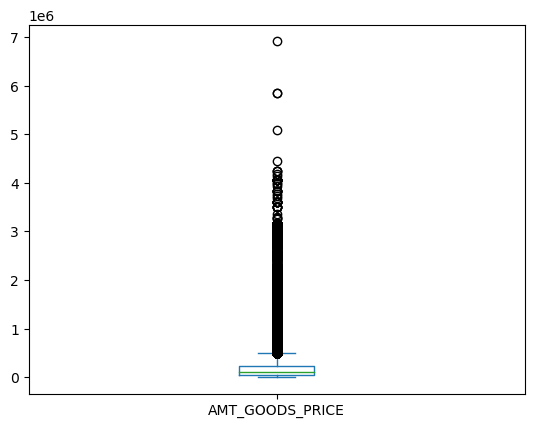

In [148]:
# Lets analyse the column AMT_GOODS_PRICE
app_pr.AMT_GOODS_PRICE.plot.box()

In [149]:
app_pr.AMT_GOODS_PRICE.describe()

count    1.284699e+06
mean     2.278473e+05
std      3.153966e+05
min      0.000000e+00
25%      5.084100e+04
50%      1.123200e+05
75%      2.340000e+05
max      6.905160e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [150]:
app_pr.AMT_GOODS_PRICE.quantile(q = [0.25,0.5,0.75,1])

0.25      50841.0
0.50     112320.0
0.75     234000.0
1.00    6905160.0
Name: AMT_GOODS_PRICE, dtype: float64

#### Inference on the above analysis for imputation
    1. Median is 112320
    2. Mean is 2278473
    3. The column has severe outliers. so median would be the better  option to impute.

<Axes: >

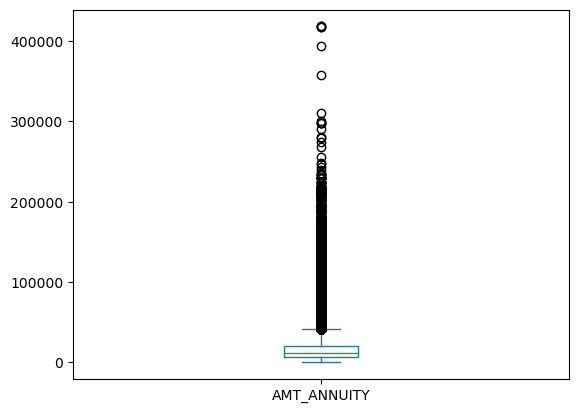

In [151]:
# Lets analyse the column AMT_ANNUITY
app_pr.AMT_ANNUITY.plot.box()

In [152]:
app_pr.AMT_ANNUITY.quantile(q = [0.25,0.5,0.75,1])

0.25      6321.780
0.50     11250.000
0.75     20658.420
1.00    418058.145
Name: AMT_ANNUITY, dtype: float64

In [153]:
app_pr.AMT_ANNUITY.describe()

count    1.297979e+06
mean     1.595512e+04
std      1.478214e+04
min      0.000000e+00
25%      6.321780e+03
50%      1.125000e+04
75%      2.065842e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64

In [154]:
app_pr.AMT_ANNUITY.mean()

15955.120659452119

#### Inference on the above analysis for imputation
    1. Median is 11250.000
    2. Mean is 15955
    3. The column has severe outliers. so median would be the better  option to impute.

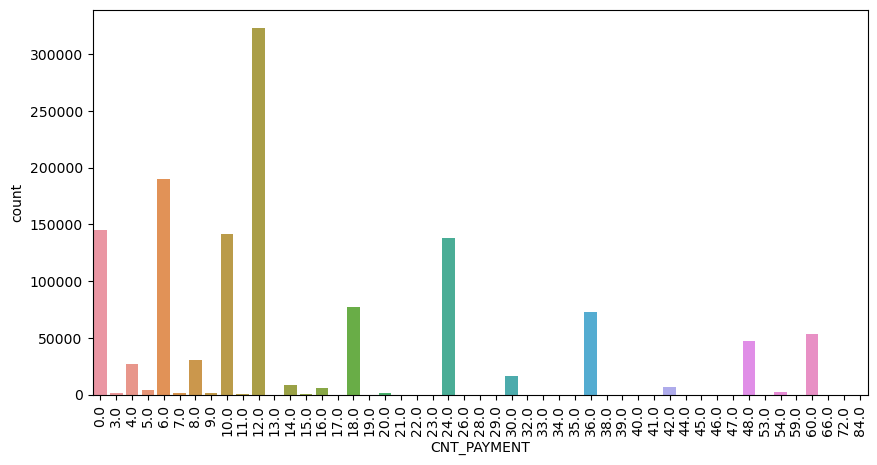

In [155]:
# Lets analyse the column CNT_PAYMENT
plt.figure(figsize=(10,5))
sns.countplot(data=app_pr,x='CNT_PAYMENT')
plt.xticks(rotation=90)
plt.show()

<Axes: >

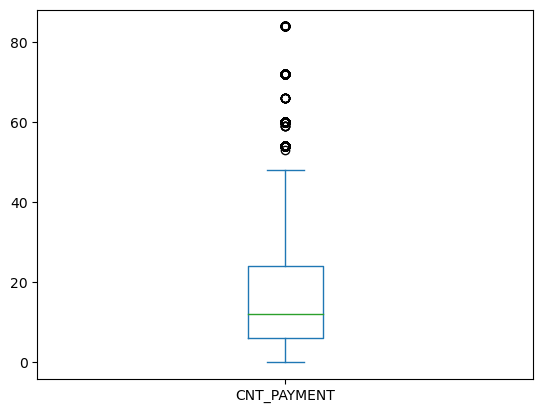

In [156]:
app_pr.CNT_PAYMENT.plot.box()

In [157]:
app_pr.CNT_PAYMENT.describe()

count    1.297984e+06
mean     1.605408e+01
std      1.456729e+01
min      0.000000e+00
25%      6.000000e+00
50%      1.200000e+01
75%      2.400000e+01
max      8.400000e+01
Name: CNT_PAYMENT, dtype: float64

In [158]:
app_pr.CNT_PAYMENT.quantile([0.25,0.5,0.75,1])

0.25     6.0
0.50    12.0
0.75    24.0
1.00    84.0
Name: CNT_PAYMENT, dtype: float64

In [159]:
app_pr.CNT_PAYMENT.mode()

0    12.0
Name: CNT_PAYMENT, dtype: float64

In [160]:
app_pr.CNT_PAYMENT.mean()

16.0540815603274

#### Inference on the above analysis for imputation
    1. Median is 12.0
    2. Mean is 16.0
    3. The column has severe outliers. so mean would be the better option to impute.

In [161]:
# Lets analyse the column PRODUCT_COMBINATION

app_pr.PRODUCT_COMBINATION.value_counts()

Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: PRODUCT_COMBINATION, dtype: int64

In [162]:
app_pr.PRODUCT_COMBINATION.describe()

count     1669868
unique         17
top          Cash
freq       285990
Name: PRODUCT_COMBINATION, dtype: object

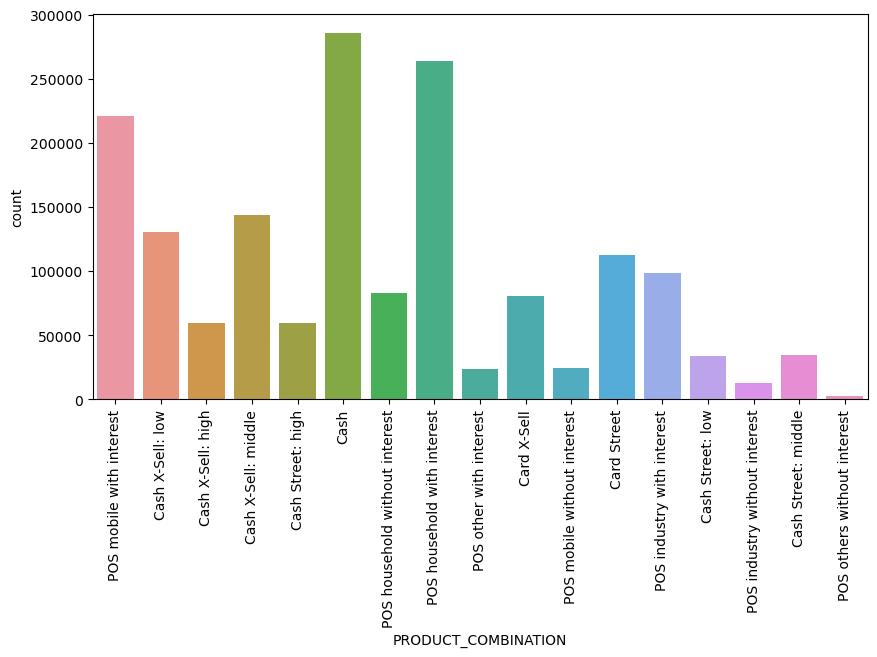

In [163]:
plt.figure(figsize=(10,5))
sns.countplot(data=app_pr,x='PRODUCT_COMBINATION')
plt.xticks(rotation=90)
plt.show()

#### Inference on the above analysis for imputation
    1. Mode is Cash which we could see from the above plot.
    2. It would be better to impute the column with mode.

## 2.3 Inspecting the data types of all the columns

In [164]:
app_pr.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE                    object
SELLERPLACE_AREA                 int64
NAME_SELLER_INDUSTRY            object
CNT_PAYMENT                    float64
NAME_YIELD_GROUP                object
PRODUCT_COMBINATION      

#### Inference:
  On comparing the data with the data types, it seems that no correction is required.

#### Standardizing the negative values

In [165]:
# we could see some negative values present in DAYS_DECISION column
app_pr['DAYS_DECISION']=abs(app_pr['DAYS_DECISION'])

In [166]:
app_pr['DAYS_DECISION'].head()

0     73
1    164
2    301
3    512
4    781
Name: DAYS_DECISION, dtype: int64

#### Correcting the incorrect values

In [167]:
# We could see some incorrect values in the column NAME_CASH_LOAN_PURPOSE
app_pr['NAME_CASH_LOAN_PURPOSE'].value_counts(normalize=True)*100

XAP                                 55.242083
XNA                                 40.588691
Repairs                              1.422872
Other                                0.934491
Urgent needs                         0.503648
Buying a used car                    0.172912
Building a house or an annex         0.161237
Everyday expenses                    0.144652
Medicine                             0.130163
Payments on other loans              0.115614
Education                            0.094180
Journey                              0.074182
Purchase of electronic equipment     0.063525
Buying a new car                     0.060591
Wedding / gift / holiday             0.057597
Buying a home                        0.051790
Car repairs                          0.047718
Furniture                            0.044845
Buying a holiday home / land         0.031912
Business development                 0.025506
Gasification / water supply          0.017962
Buying a garage                   

#### Inference:
    1. We could see XAP, XNA which are contributing more to the number of entries. So it is better to leave as it is.

## 2.4 Analyzing the Outliers

In [168]:
app_pr.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_GOODS_PRICE  HOUR_APPR_PROCESS_START  \
count  1.670213e+06     1.284699e+06             1.670214e+06   
mean   1.961140e+05     2.278473e+05             1.248418e+01   
std    3.185746e+05     3.153966e+05             3.334028e+00   
min    0.000000e+00     0.000000e+00             0.000000e+00   
25%    2.416050e+04     5.084100e+04             1.000000e+01   
50%    8.054100e+04     1.123200e+05             1.200000e+01   
75%    2.164185e+05     2.340000e+05             1.500000e+01   
max    6.905160e+06     6.905160e+06             2.300000e+01   

       NFLAG_LAST_APPL_IN_DAY  DAYS_DECISION  SELLERPLACE_AREA   CNT_PAYMENT  
count            1.670214e+06   1.670214e+06      1.670214e+06  1.297984e+06  
mean             9.964675e-01   8.806797e+02      3.139511e+02  1.605408e+01  
std              5.932963e-02   7.790997e+02      7.127443e+03  1.456729e+01  
min              0.000000e+00   1.000000e+00     -1.000000e+00  0.000000e+00  
25%              1.000000e+00   2.800000e+02     -1.000000e+00  6.000000e+00  
50%              1.000000e+00   5.810000e+02      3.000000e+00  1.200000e+01  
75%              1.000000e+00   1.300000e+03      8.200000e+01  2.400000e+01  
max              1.000000e+00   2.922000e+03      4.000000e+06  8.400000e+01

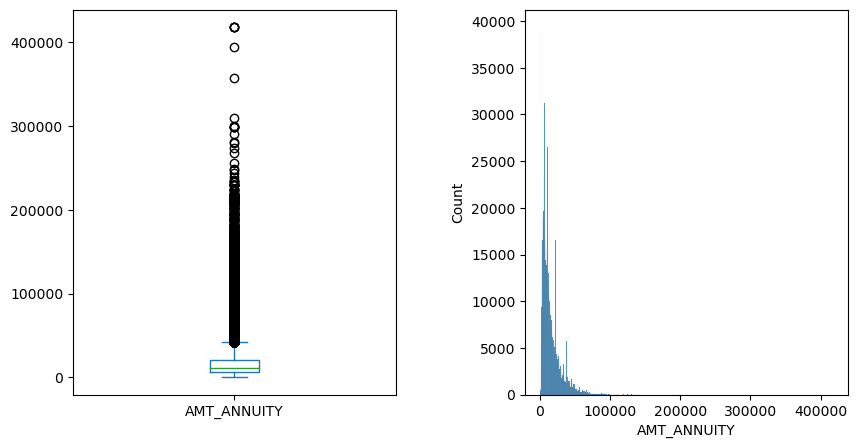

In [169]:
# Lets analyse the column AMT_ANNUITY
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
app_pr.AMT_ANNUITY.plot.box()
plt.subplot(1,2,2)
sns.histplot(app_pr.AMT_ANNUITY)
plt.subplots_adjust(wspace=0.4)


In [170]:
app_pr.AMT_ANNUITY.quantile([0.25,0.5,0.75,1])

0.25      6321.780
0.50     11250.000
0.75     20658.420
1.00    418058.145
Name: AMT_ANNUITY, dtype: float64

The column AMT_ANNUITY has outliers from 418058

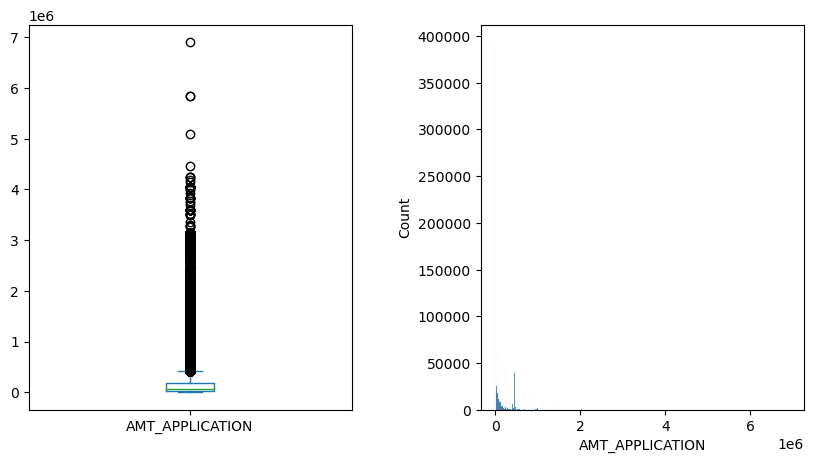

In [171]:
# Lets analyse the column AMT_APPLICATION

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
app_pr.AMT_APPLICATION.plot.box()
plt.subplot(1,2,2)
sns.histplot(app_pr.AMT_APPLICATION)
plt.subplots_adjust(wspace=0.4)

In [172]:
app_pr.AMT_APPLICATION.quantile([0.25,0.5,0.75,1])

0.25      18720.0
0.50      71046.0
0.75     180360.0
1.00    6905160.0
Name: AMT_APPLICATION, dtype: float64

The column AMT_ANNUITY has outliers from 6905160

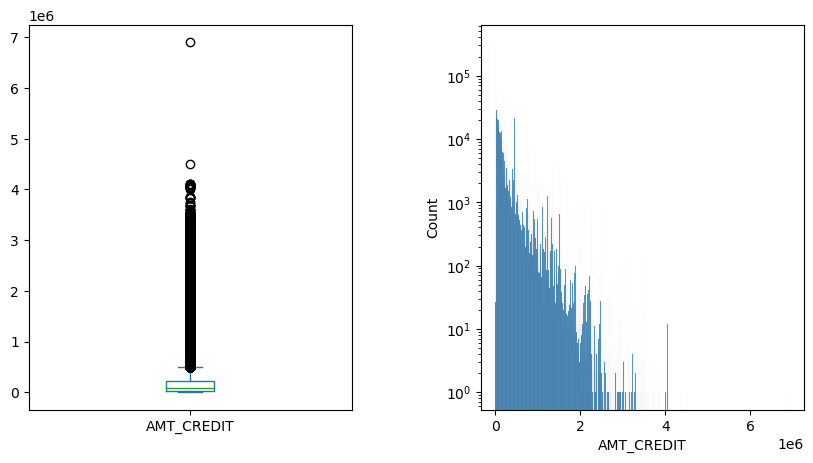

In [173]:
# Lets analyse the column AMT_CREDIT

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
app_pr.AMT_CREDIT.plot.box()
plt.subplot(1,2,2)
sns.histplot(app_pr.AMT_CREDIT)
plt.subplots_adjust(wspace=0.4)
plt.yscale('log')

In [174]:
app_pr.AMT_CREDIT.quantile([0.25,0.5,0.75,1])

0.25      24160.5
0.50      80541.0
0.75     216418.5
1.00    6905160.0
Name: AMT_CREDIT, dtype: float64

The column AMT_CREDIT has outliers from 6905160.0

### Treating Outliers: Capping method 
    My suggestion on how to treat outlier is either dropping the outliers or treating them with IQR. If outliers are more   likely due to data entry errors or if maintaining the original distribution of data is crucial, then it is better to      remove the outliers. If we consider that outliers are still a valuable data point to be considered and to avoid data    loss then it is good to replace the outliers with lower bound and upper bound values.
    
    IQR = Q3 - Q1
    Where, Q3 is 75th percentile
           Q1 is 25th percentile
    Upper bound = Q3 + 1.5 * IQR
    Lower bound = Q1 - 1.5 * IQR
    
If the data point is above upper bound then replace it with upper bound value. Else if the data point is below the lower bound then replace it with lower bound value.

## 2.5. DATA ANALYSIS

### 2.5.1 Univariate analysis on categorical columns

In [175]:
app_pr.select_dtypes(include=['object']).columns

Index(['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY',
       'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

#### Analysing the column PRODUCT_COMBINATION

In [176]:
# Lets analyse the column PRODUCT_COMBINATION
app_pr.PRODUCT_COMBINATION.value_counts()

Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: PRODUCT_COMBINATION, dtype: int64

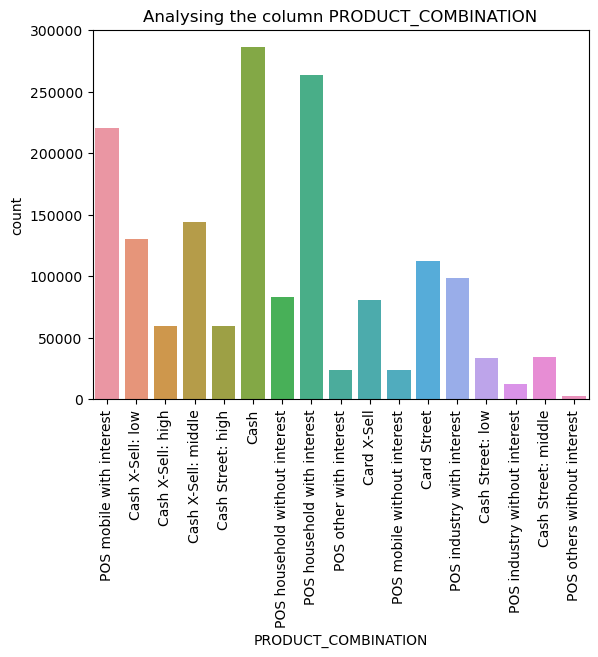

In [177]:
sns.countplot(data=app_pr,x='PRODUCT_COMBINATION')
plt.xticks(rotation=90)
plt.title('Analysing the column PRODUCT_COMBINATION')
plt.show()

#### Inference on the above analysis:
   1. "In the analysis of the graph, it is evident that the product combination labeled 'cash' has received the highest number of loan sanctions, indicating a significant demand or preference for this particular product. Conversely, the combination 'POS others without interest' shows the least number of loan sanctions, suggesting a relatively lower demand or utilization for this specific product offering. 

#### Analysing the column NAME_PAYMENT_TYPE

In [178]:
# Lets analyse the column NAME_PAYMENT_TYPE

app_pr.NAME_PAYMENT_TYPE.value_counts()

Cash through the bank                        1033552
XNA                                           627384
Non-cash from your account                      8193
Cashless from the account of the employer       1085
Name: NAME_PAYMENT_TYPE, dtype: int64

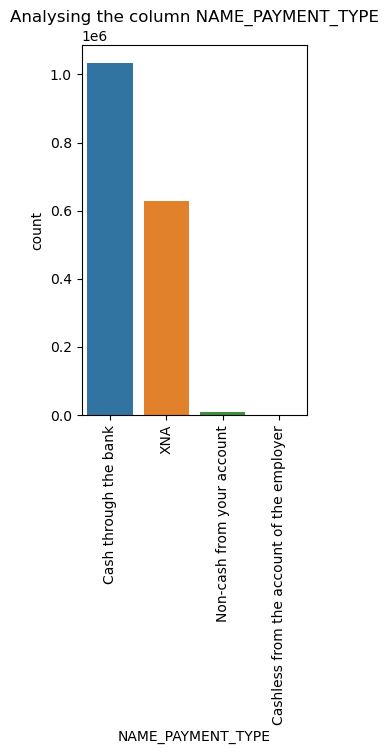

In [179]:
plt.subplot(1,2,1)
sns.countplot(data=app_pr,x='NAME_PAYMENT_TYPE')
plt.xticks(rotation=90)
plt.title('Analysing the column NAME_PAYMENT_TYPE')
plt.show()


#### Inference on the above analysis:
     The graph indicates that a significant majority of clients prefer repaying their amounts through cash via the bank.    This is likely the most common or default method chosen by clients. It has lot of missing values to be actioned.

#### Analysing the column NAME_CONTRACT_STATUS

In [180]:
# Lets analyse the column NAME_CONTRACT_STATUS

app_pr.NAME_CONTRACT_STATUS.value_counts()

Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: NAME_CONTRACT_STATUS, dtype: int64

<Axes: ylabel='NAME_CONTRACT_STATUS'>

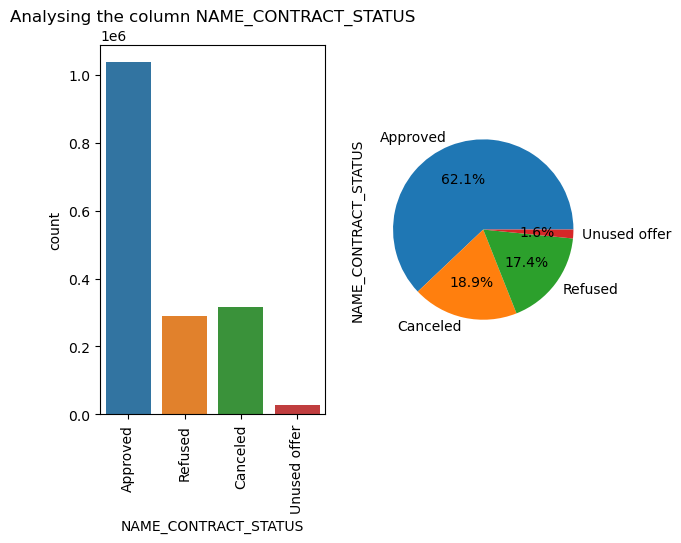

In [181]:
plt.subplot(1,2,1)
sns.countplot(data=app_pr,x='NAME_CONTRACT_STATUS')
plt.xticks(rotation=90)
plt.title('Analysing the column NAME_CONTRACT_STATUS')

plt.subplot(1,2,2)
(app_pr.NAME_CONTRACT_STATUS.value_counts(normalize=True)*100).plot.pie(autopct='%1.1f%%')


#### Inference on the above analysis:
     The graph indicates that a 62.1 % of applications has been approved.This could indicate that the lending or approval process is generally inclusive or that the applicants meet the necessary criteria for approval. 1.6 % has been unused by the clients.

#### Analysing the column CHANNEL_TYPE

In [182]:
# Lets analyse the column CHANNEL_TYPE
app_pr.CHANNEL_TYPE.value_counts()

Credit and cash offices       719968
Country-wide                  494690
Stone                         212083
Regional / Local              108528
Contact center                 71297
AP+ (Cash loan)                57046
Channel of corporate sales      6150
Car dealer                       452
Name: CHANNEL_TYPE, dtype: int64

Text(0.5, 1.0, 'Analysing the column CHANNEL_TYPE')

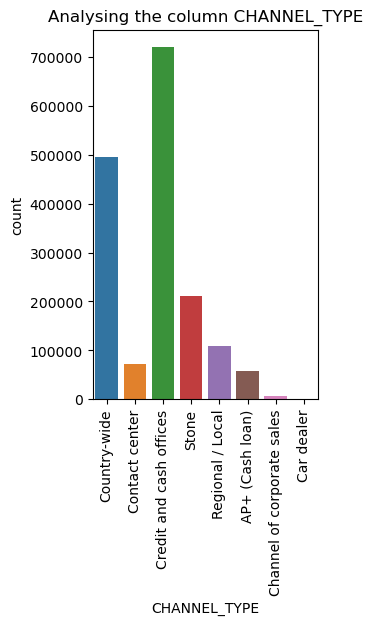

In [183]:
plt.subplot(1,2,1)
sns.countplot(data=app_pr,x='CHANNEL_TYPE')
plt.xticks(rotation=90)
plt.title('Analysing the column CHANNEL_TYPE')


#### Inference on the above analysis:
   This channel appears to be popular, indicating that a significant portion of loan applicants is acquired through credit and cash offices.Credit and cash offices might offer a straightforward and accessible way for applicants to seek and obtain loans.The channels of corporate sales and car dealers seem to have lower observation levels, suggesting that fewer applicants are acquired through these channels.

#### Analysing the column NAME_SELLER_INDUSTRY

In [184]:
# Lets analyse the column NAME_SELLER_INDUSTRY
app_pr.NAME_SELLER_INDUSTRY.value_counts()

XNA                     855720
Consumer electronics    398265
Connectivity            276029
Furniture                57849
Construction             29781
Clothing                 23949
Industry                 19194
Auto technology           4990
Jewelry                   2709
MLM partners              1215
Tourism                    513
Name: NAME_SELLER_INDUSTRY, dtype: int64

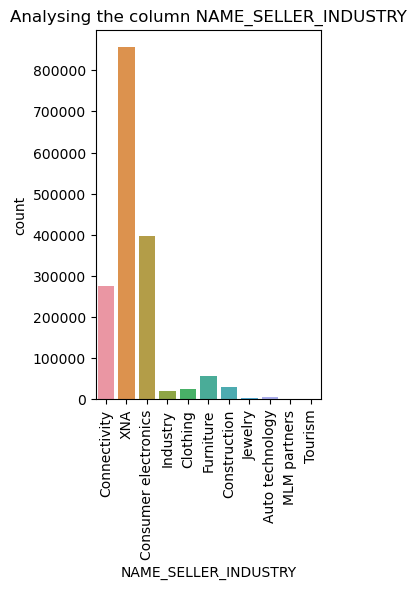

In [185]:
plt.subplot(1,2,1)
sns.countplot(data=app_pr,x='NAME_SELLER_INDUSTRY')
plt.xticks(rotation=90)
plt.title('Analysing the column NAME_SELLER_INDUSTRY')
plt.show()


#### Inference on the above analysis:

It has lot of missing values to be actioned which will impact the analysis. Apart from the missing values, Consumer electronics has got the majority of votes.

#### Analysing the column NAME_CASH_LOAN_PURPOSE

In [186]:
# Lets analyse the column NAME_CASH_LOAN_PURPOSE
app_pr.NAME_CASH_LOAN_PURPOSE.value_counts()

XAP                                 922661
XNA                                 677918
Repairs                              23765
Other                                15608
Urgent needs                          8412
Buying a used car                     2888
Building a house or an annex          2693
Everyday expenses                     2416
Medicine                              2174
Payments on other loans               1931
Education                             1573
Journey                               1239
Purchase of electronic equipment      1061
Buying a new car                      1012
Wedding / gift / holiday               962
Buying a home                          865
Car repairs                            797
Furniture                              749
Buying a holiday home / land           533
Business development                   426
Gasification / water supply            300
Buying a garage                        136
Hobby                                   55
Money for a

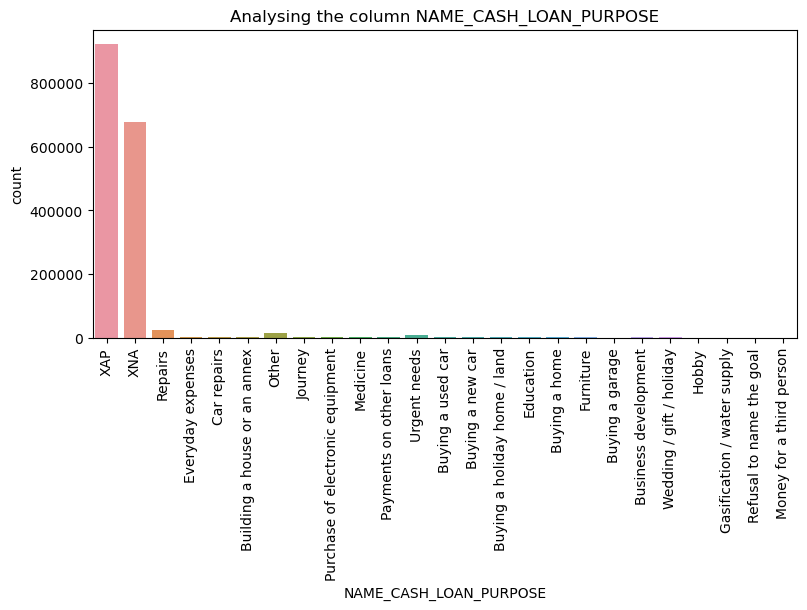

In [187]:
plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
sns.countplot(data=app_pr,x='NAME_CASH_LOAN_PURPOSE')
plt.xticks(rotation=90)
plt.title('Analysing the column NAME_CASH_LOAN_PURPOSE')
plt.show()

#### Inference on the above analysis:

It has lot of missing values to be actioned which will impact the analysis. Apart from incorrect data, major reason for opting loans is for repairs and the least is people refused to mention their reason for opting loans.

### 2.5.2 Univariate analysis on numerical columns

In [188]:
# Analysing the numerical columns
app_pr.select_dtypes(include=["int64","float64"]).columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'AMT_ANNUITY', 'AMT_APPLICATION',
       'AMT_CREDIT', 'AMT_GOODS_PRICE', 'HOUR_APPR_PROCESS_START',
       'NFLAG_LAST_APPL_IN_DAY', 'DAYS_DECISION', 'SELLERPLACE_AREA',
       'CNT_PAYMENT'],
      dtype='object')

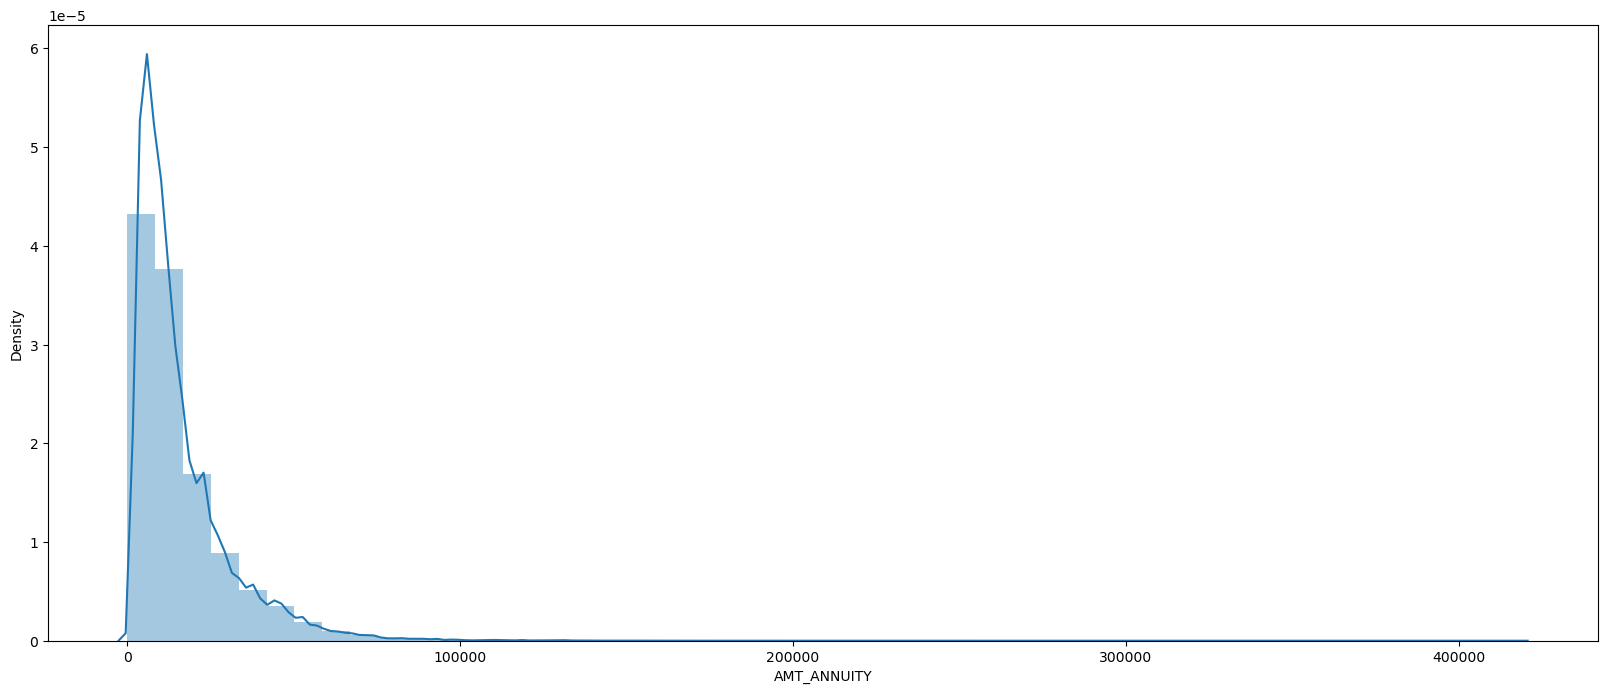

<Axes: >

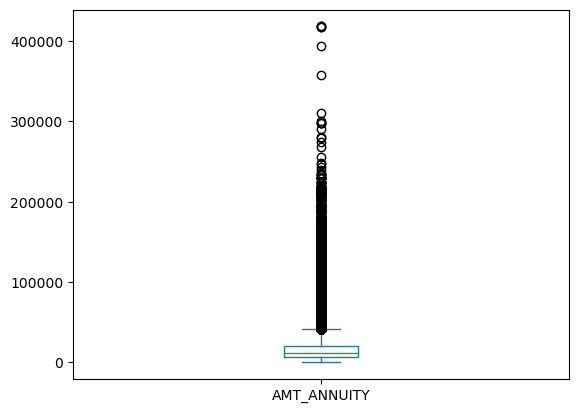

In [189]:
plt.figure(figsize = [20,8])
sns.distplot(app_pr['AMT_ANNUITY'],hist=True)
plt.show()
app_pr.AMT_ANNUITY.plot.box()

#### Inference on the above analysis:
Could not bring out a proper conclusion as there are severe outliers. The number of loan seekers are getting decreased as the loan amount increases.

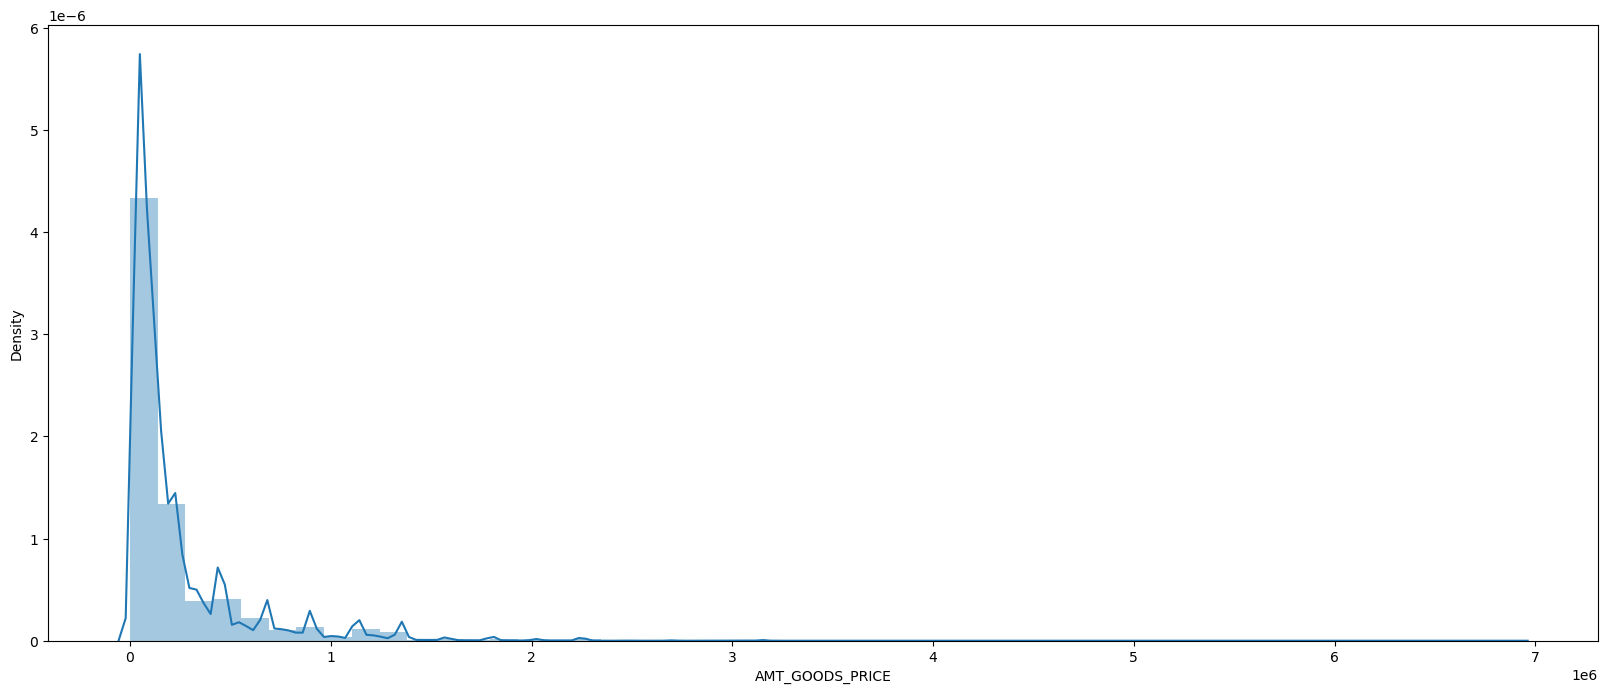

<Axes: >

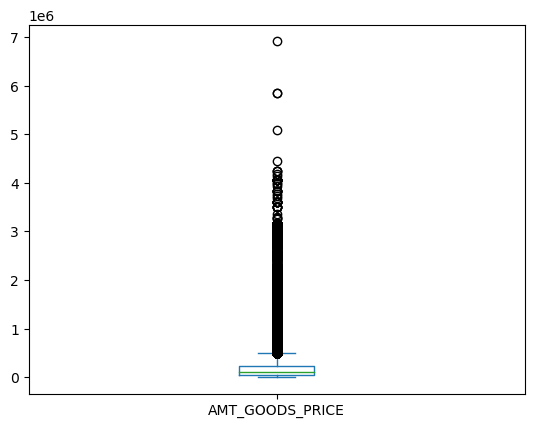

In [190]:
plt.figure(figsize = [20,8])
sns.distplot(app_pr['AMT_GOODS_PRICE'],hist=True)
plt.show()
app_pr.AMT_GOODS_PRICE.plot.box()

#### Inference on the above analysis:
Could not bring out a proper conclusion as there are severe outliers. 

### 2.5.2 Bivariate analysis 

### numerical vs numerical analysis

In [191]:
# Analysing the numerical columns
app_pr.select_dtypes(include=["int64","float64"]).columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'AMT_ANNUITY', 'AMT_APPLICATION',
       'AMT_CREDIT', 'AMT_GOODS_PRICE', 'HOUR_APPR_PROCESS_START',
       'NFLAG_LAST_APPL_IN_DAY', 'DAYS_DECISION', 'SELLERPLACE_AREA',
       'CNT_PAYMENT'],
      dtype='object')

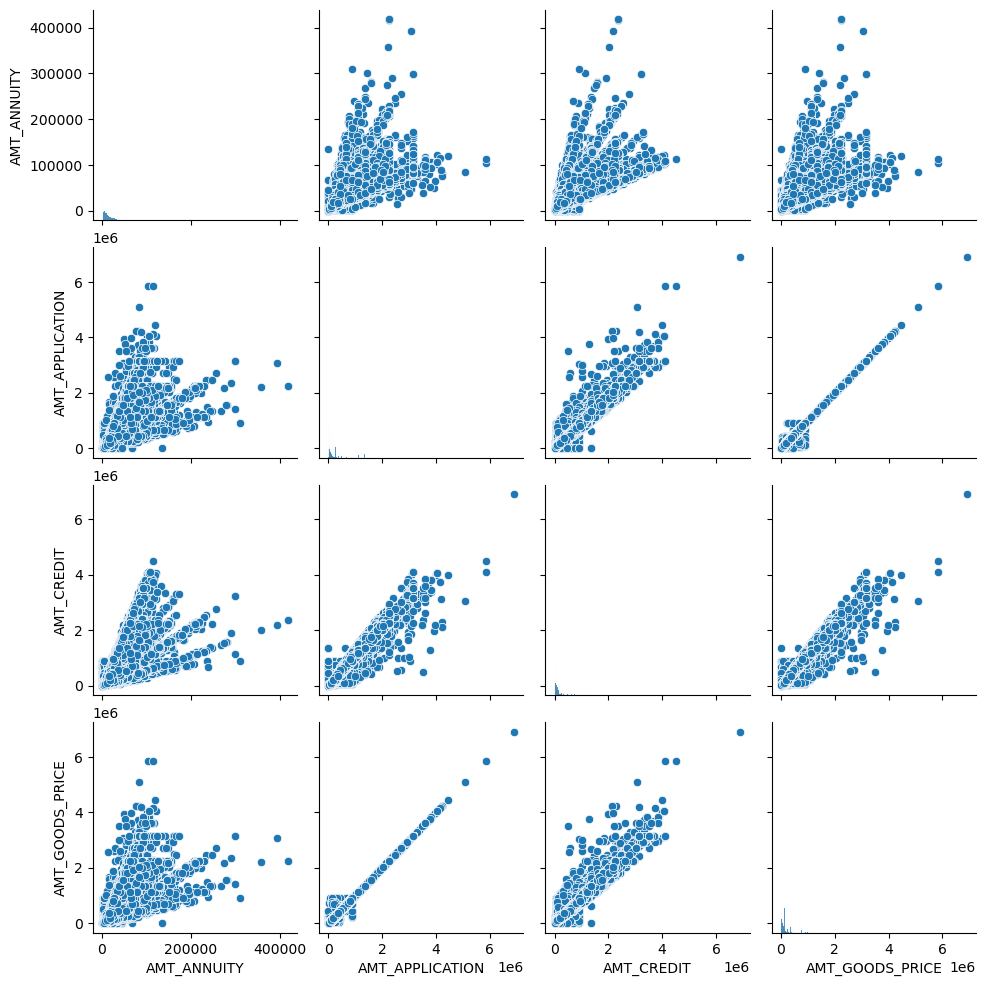

In [192]:
sns.pairplot(app_pr[['AMT_ANNUITY', 'AMT_APPLICATION','AMT_CREDIT', 'AMT_GOODS_PRICE']])

#### Inference on the above analysis:
    1. AMT_ANNUITY have a strong positive correlation with AMT_APPLICATION, AMT_CREDIT and AMT_GOODS_PRICE.
    2. AMT_APPLICATION have a strong positive correlation with AMT_CREDIT and AMT_GOODS_PRICE.
    3. AMT_CREDIT have a strong positive correlation with AMT_GOODS_PRICE

### Categorical vs numerical analysis

In [193]:
# Analysing the numerical columns
app_pr.select_dtypes(include=["int64","float64"]).columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'AMT_ANNUITY', 'AMT_APPLICATION',
       'AMT_CREDIT', 'AMT_GOODS_PRICE', 'HOUR_APPR_PROCESS_START',
       'NFLAG_LAST_APPL_IN_DAY', 'DAYS_DECISION', 'SELLERPLACE_AREA',
       'CNT_PAYMENT'],
      dtype='object')

In [194]:
# Analysing the categorical columns
app_pr.select_dtypes(include=['object']).columns

Index(['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY',
       'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

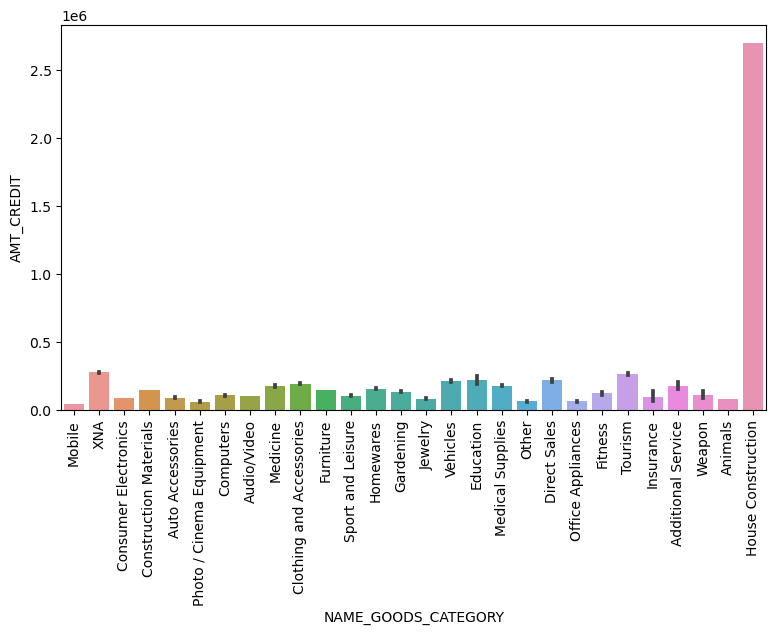

In [195]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.barplot(x='NAME_GOODS_CATEGORY',y='AMT_CREDIT',data=app_pr)
plt.xticks(rotation=90)
plt.show()

#### Inference on the above analysis:
   From the above we could see that peolpe are mostly availing loans for their house construction and next to it is tourism.

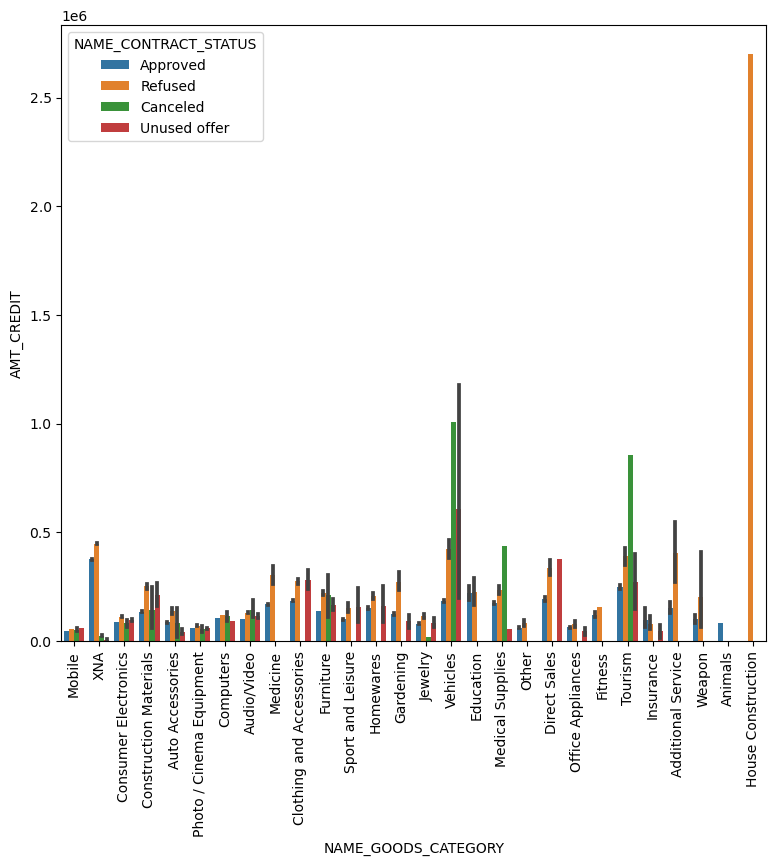

In [196]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.barplot(x='NAME_GOODS_CATEGORY',y='AMT_CREDIT',data=app_pr,hue='NAME_CONTRACT_STATUS')
plt.xticks(rotation=90)
plt.show()

#### Inference on the above analysis:
   From the above we could see that Loan has been approved largely for tourism and next is education. For construcation we could see that ,mostly it is refused.

(array([0, 1, 2]),
 [Text(0, 0, 'XNA'), Text(1, 0, 'x-sell'), Text(2, 0, 'walk-in')])

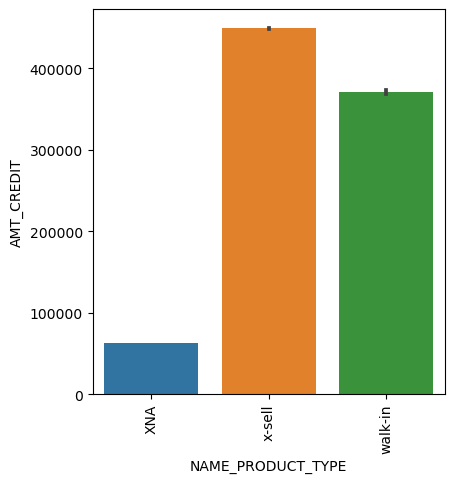

In [197]:
#Analysing the columns NAME_PRODUCT_TYPE and AMT_CREDIT

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.barplot(x='NAME_PRODUCT_TYPE',y='AMT_CREDIT',data=app_pr)
plt.xticks(rotation=90)

In [198]:
app_pr.NAME_PRODUCT_TYPE.value_counts()

XNA        1063666
x-sell      456287
walk-in     150261
Name: NAME_PRODUCT_TYPE, dtype: int64

In [199]:
app_pr.NAME_CONTRACT_STATUS.value_counts()

Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: NAME_CONTRACT_STATUS, dtype: int64

#### Inference on the above analysis:
The customers classified as "x-sell" tend to have a higher number of credit sanctions.The customers labeled as "walk-in" have fewer credit sanctions. This may indicate that the "x-sell" category represents customers who are more actively engaged with the business, leading to higher credit requirements or a higher likelihood of taking up credit offers.

# PART 3 Merging the two datasets

### 3.1 Structure of the data set

In [200]:
final=pd.merge(app_d,app_pr,how='inner',on='SK_ID_CURR')

In [201]:
final.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0      100002       1           Cash loans           M            N   
1      100003       0           Cash loans           F            N   
2      100003       0           Cash loans           F            N   
3      100003       0           Cash loans           F            N   
4      100004       0      Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0               Y             0          202500.0      406597.5   
1               N             0          270000.0     1293502.5   
2               N             0          270000.0     1293502.5   
3               N             0          270000.0     1293502.5   
4               Y             0           67500.0      135000.0   

   AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0        24700.5           351000.0   Unaccompanied          Working   
1        35698.5          1129500.0          Family    State servant   
2        35698.5          1129500.0          Family    State servant   
3        35698.5          1129500.0          Family    State servant   
4         6750.0           135000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2               Higher education               Married  House / apartment   
3               Higher education               Married  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461            637             3648.0   
1                    0.003541       16765           1188             1186.0   
2                    0.003541       16765           1188             1186.0   
3                    0.003541       16765           1188             1186.0   
4                    0.010032       19046            225             4260.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             2120           1               1                0   
1              291           1               1                0   
2              291           1               1                0   
3              291           1               1                0   
4             2531           1               1                1   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0      Core staff              2.0   
3                 1           1           0      Core staff              2.0   
4                 1           1           0        Laborers              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     1                            1   
3                     1                            1   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START_x  HOUR_APPR_PROCESS_START_x  \
0                    WEDNESDAY                         10   
1                       MONDAY                         11   
2                       MONDAY                         11   
3                       MONDAY                         11   
4                       MONDAY                          9   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0  

In [202]:
final.shape

(1413701, 111)

In [203]:
final.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 111 columns):
 #    Column                        Dtype   
---   ------                        -----   
 0    SK_ID_CURR                    int64   
 1    TARGET                        int64   
 2    NAME_CONTRACT_TYPE_x          object  
 3    CODE_GENDER                   object  
 4    FLAG_OWN_CAR                  object  
 5    FLAG_OWN_REALTY               object  
 6    CNT_CHILDREN                  int64   
 7    AMT_INCOME_TOTAL              float64 
 8    AMT_CREDIT_x                  float64 
 9    AMT_ANNUITY_x                 float64 
 10   AMT_GOODS_PRICE_x             float64 
 11   NAME_TYPE_SUITE               object  
 12   NAME_INCOME_TYPE              object  
 13   NAME_EDUCATION_TYPE           object  
 14   NAME_FAMILY_STATUS            object  
 15   NAME_HOUSING_TYPE             object  
 16   REGION_POPULATION_RELATIVE    float64 
 17   DAYS_BIRTH               

In [204]:
final.describe()

SK_ID_CURR        TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  1.413701e+06  1.413701e+06  1.413701e+06      1.413701e+06   
mean   2.784813e+05  8.655296e-02  4.048933e-01      1.733160e+05   
std    1.028118e+05  2.811789e-01  7.173454e-01      1.985734e+05   
min    1.000020e+05  0.000000e+00  0.000000e+00      2.565000e+04   
25%    1.893640e+05  0.000000e+00  0.000000e+00      1.125000e+05   
50%    2.789920e+05  0.000000e+00  0.000000e+00      1.575000e+05   
75%    3.675560e+05  0.000000e+00  1.000000e+00      2.070000e+05   
max    4.562550e+05  1.000000e+00  1.900000e+01      1.170000e+08   

       AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x  \
count  1.413701e+06   1.413608e+06       1.412493e+06   
mean   5.875537e+05   2.701702e+04       5.277186e+05   
std    3.849173e+05   1.395116e+04       3.532465e+05   
min    4.500000e+04   1.615500e+03       4.050000e+04   
25%    2.700000e+05   1.682100e+04       2.385000e+05   
50%    5.084955e+05   2.492550e+04       4.500000e+05   
75%    8.079840e+05   3.454200e+04       6.795000e+05   
max    4.050000e+06   2.250000e+05       4.050000e+06   

       REGION_POPULATION_RELATIVE    DAYS_BIRTH  DAYS_EMPLOYED  \
count                1.413701e+06  1.413701e+06   1.413701e+06   
mean                 2.074985e-02  1.632105e+04   7.266347e+04   
std                  1.334702e-02  4.344557e+03   1.433374e+05   
min                  2.900000e-04  7.489000e+03   0.000000e+00   
25%                  1.003200e-02  1.273900e+04   1.042000e+03   
50%                  1.885000e-02  1.604400e+04   2.401000e+03   
75%                  2.866300e-02  1.998000e+04   6.313000e+03   
max                  7.250800e-02  2.520100e+04   3.652430e+05   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
count       1.413701e+06     1.413701e+06   1413701.0    1.413701e+06   
mean        5.003233e+03     3.034563e+03         1.0    8.064393e-01   
std         3.551051e+03     1.507376e+03         0.0    3.950887e-01   
min         0.000000e+00     0.000000e+00         1.0    0.000000e+00   
25%         2.001000e+03     1.783000e+03         1.0    1.000000e+00   
50%         4.508000e+03     3.330000e+03         1.0    1.000000e+00   
75%         7.510000e+03     4.319000e+03         1.0    1.000000e+00   
max         2.467200e+04     7.197000e+03         1.0    1.000000e+00   

       FLAG_WORK_PHONE  FLAG_CONT_MOBILE    FLAG_PHONE    FLAG_EMAIL  \
count     1.413701e+06      1.413701e+06  1.413701e+06  1.413701e+06   
mean      1.822585e-01      9.992452e-01  2.828752e-01  7.242904e-02   
std       3.860576e-01      2.746247e-02  4.503965e-01  2.591971e-01   
min       0.000000e+00      0.000000e+00  0.000000e+00  0.000000e+00   
25%       0.000000e+00      1.000000e+00  0.000000e+00  0.000000e+00   
50%       0.000000e+00      1.000000e+00  0.000000e+00  0.000000e+00   
75%       0.000000e+00      1.000000e+00  1.000000e+00  0.000000e+00   
max       1.000000e+00      1.000000e+00  1.000000e+00  1.000000e+00   

       CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
count     1.413701e+06          1.413701e+06                 1.413701e+06   
mean      2.150501e+00          2.059638e+00                 2.037603e+00   
std       9.006787e-01          4.957797e-01                 4.886431e-01   
min       1.000000e+00          1.000000e+00                 1.000000e+00   
25%       2.000000e+00          2.000000e+00                 2.000000e+00   
50%       2.000000e+00          2.000000e+00                 2.000000e+00   
75%       3.000000e+00          2.000000e+00                 2.000000e+00   
max       2.000000e+01          3.000000e+00                 3.000000e+00   

       HOUR_APPR_PROCESS_START_x  REG_REGION_NOT_LIVE_REGION  \
count               1.413701e+06                1.413701e+06   
mean                1.198433e+01                1.207327e-02   
std                 3.232181e+00                1.092132e-01   
min                 0

In [205]:
#Looking at the categorical columns

print(final.select_dtypes(include=['object']).columns)
print()
print('Then length of categorical columns : ',len(final.select_dtypes(include=['object']).columns))

Index(['NAME_CONTRACT_TYPE_x', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START_x', 'ORGANIZATION_TYPE',
       'EMERGENCYSTATE_MODE', 'NAME_CONTRACT_TYPE_y',
       'WEEKDAY_APPR_PROCESS_START_y', 'FLAG_LAST_APPL_PER_CONTRACT',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY',
       'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE',
       'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

Then length of categorical columns :  28


In [206]:
#Looking at the numerical columns

print(final.select_dtypes(include=['int64','float64']).columns)
print()
print('Then length of numerical columns : ',len(final.select_dtypes(include=['int64','float64']).columns))

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START_x',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE'

## 3.2 Univariate analysis

#### Analysing the columns NAME_CONTRACT_STATUS

In [207]:
final.NAME_CONTRACT_STATUS.value_counts()

Approved        886099
Canceled        259441
Refused         245390
Unused offer     22771
Name: NAME_CONTRACT_STATUS, dtype: int64

<Axes: xlabel='NAME_CONTRACT_STATUS', ylabel='count'>

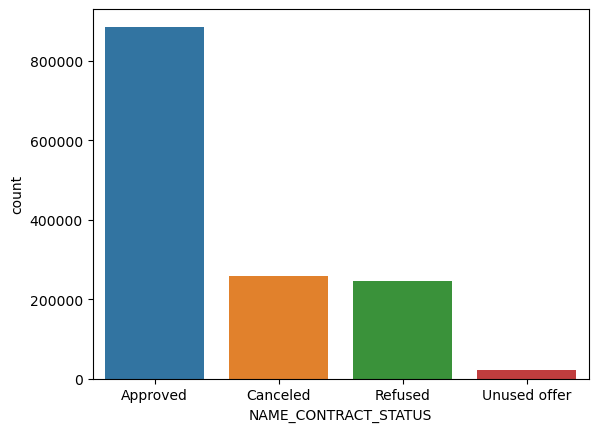

In [208]:
sns.countplot(data=final,x='NAME_CONTRACT_STATUS')

<Axes: ylabel='NAME_CONTRACT_STATUS'>

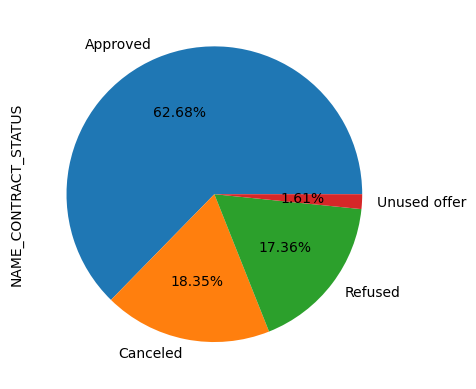

In [209]:
final.NAME_CONTRACT_STATUS.value_counts(normalize=True).plot.pie(autopct='%.2f%%')

#### Inference on the above analysis:
     From the plot we could understand that majority of the loans has been approved and the least is the loans offered has not been utilized which constitutes about 1.61%.

#### Analysing the columns NAME_CLIENT_TYPE

In [210]:
final.NAME_CLIENT_TYPE.value_counts()

Repeater     1037682
New           259540
Refreshed     114936
XNA             1543
Name: NAME_CLIENT_TYPE, dtype: int64

<Axes: xlabel='NAME_CLIENT_TYPE', ylabel='count'>

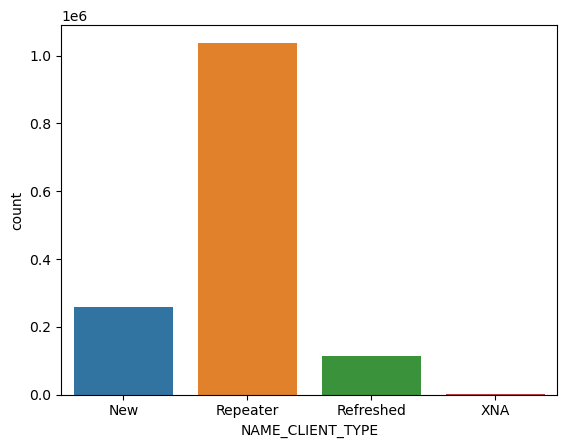

In [211]:
sns.countplot(data=final,x='NAME_CLIENT_TYPE')

<Axes: ylabel='NAME_CLIENT_TYPE'>

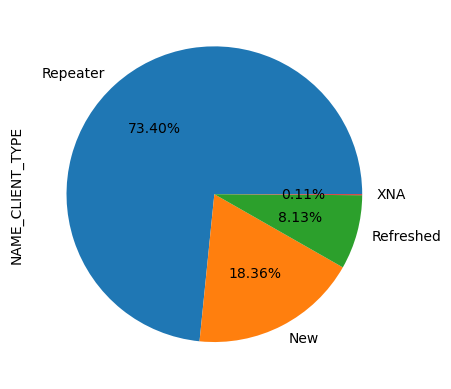

In [212]:
final.NAME_CLIENT_TYPE.value_counts(normalize=True).plot.pie(autopct='%.2f%%')

#### Inference on the above analysis:
     "Repeater" client type has the highest frequency among all loan applications, indicating a significant portion of applicants fall into this category. Additionally, the "New" client type emerges as the second most common among loan applications. 

#### Analysing the columns CHANNEL_TYPE

In [213]:
final.CHANNEL_TYPE.value_counts()

Credit and cash offices       600342
Country-wide                  423062
Stone                         183508
Regional / Local               92472
Contact center                 58891
AP+ (Cash loan)                49624
Channel of corporate sales      5396
Car dealer                       406
Name: CHANNEL_TYPE, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Stone'),
  Text(1, 0, 'Credit and cash offices'),
  Text(2, 0, 'Country-wide'),
  Text(3, 0, 'Regional / Local'),
  Text(4, 0, 'AP+ (Cash loan)'),
  Text(5, 0, 'Contact center'),
  Text(6, 0, 'Channel of corporate sales'),
  Text(7, 0, 'Car dealer')])

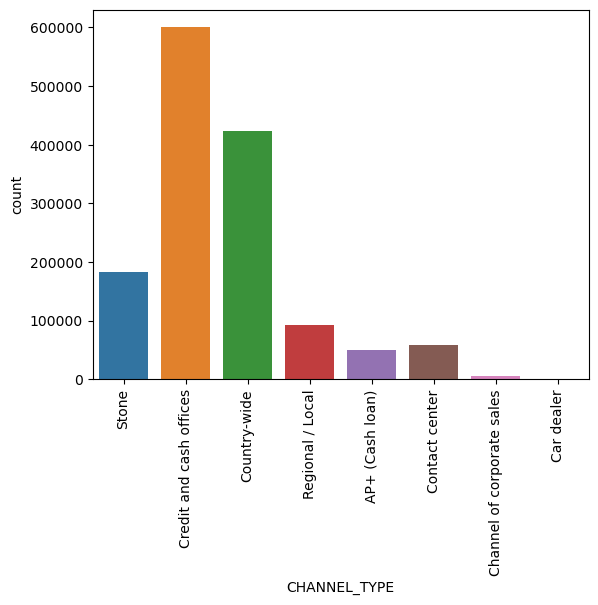

In [214]:
sns.countplot(data=final,x='CHANNEL_TYPE')
plt.xticks(rotation=90)

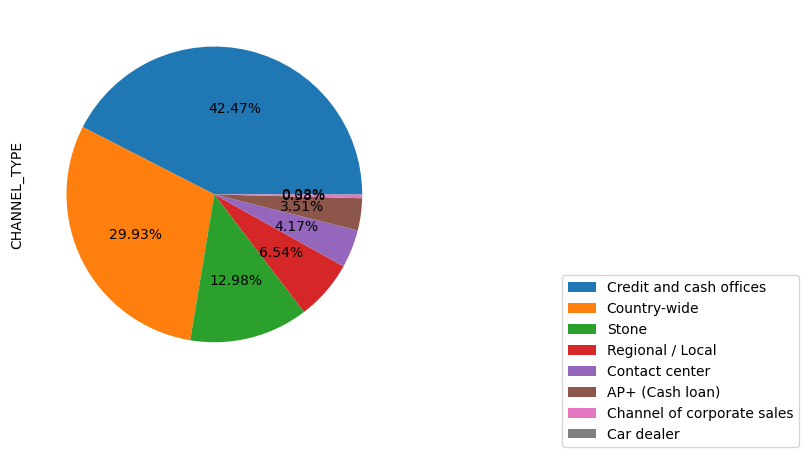

In [215]:
final.CHANNEL_TYPE.value_counts(normalize=True).plot.pie(autopct='%.2f%%',labeldistance=None)
plt.legend(bbox_to_anchor=(2.1,0.3))

#### Inference on the above analysis:
     From the graph, we could understand that Credit and cash offices constitutes larger percentage and the second largest  is country wide channel type

#### Analysing the columns AMT_APPLICATION

<Axes: >

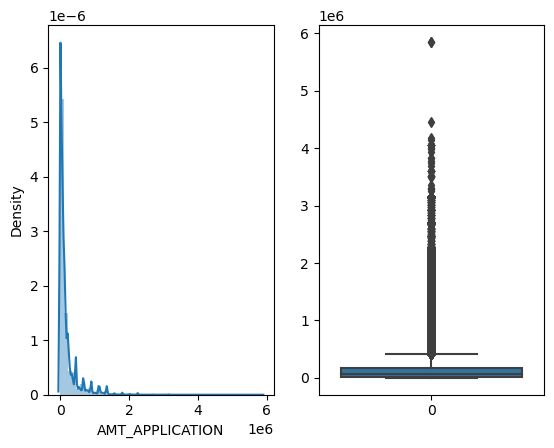

In [216]:
plt.subplot(1,2,1)
sns.distplot(final['AMT_APPLICATION'], hist=True)
plt.subplot(1,2,2)
sns.boxplot(final['AMT_APPLICATION'])

#### Inference on the above analysis:
     We could see there are severe outliers from the box plot. But if we see the hist plot, we could understand that initially, people has applied for a minimal loan amount.

#### Analysing the columns AMT_ANNUITY_y

<Axes: >

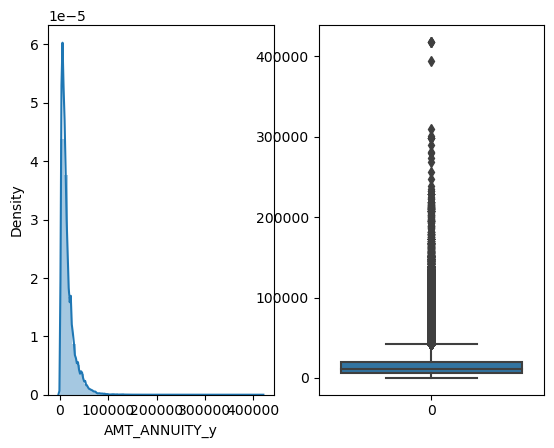

In [217]:
plt.subplot(1,2,1)
sns.distplot(final['AMT_ANNUITY_y'], hist=True)
plt.subplot(1,2,2)
sns.boxplot(final['AMT_ANNUITY_y'])

#### Inference on the above analysis:
     We could see there are severe outliers from the box plot because of which we could not get a meaningful graph.

### Correlation matrix of numerical columns

In [218]:
num_cols = final[['AMT_ANNUITY_x', 'AMT_APPLICATION','AMT_CREDIT_x', 'AMT_GOODS_PRICE_x','AMT_ANNUITY_y', 'AMT_CREDIT_y', 'AMT_GOODS_PRICE_y', 'CNT_PAYMENT']]

In [219]:
num_cols_corr=num_cols.corr()

<Axes: >

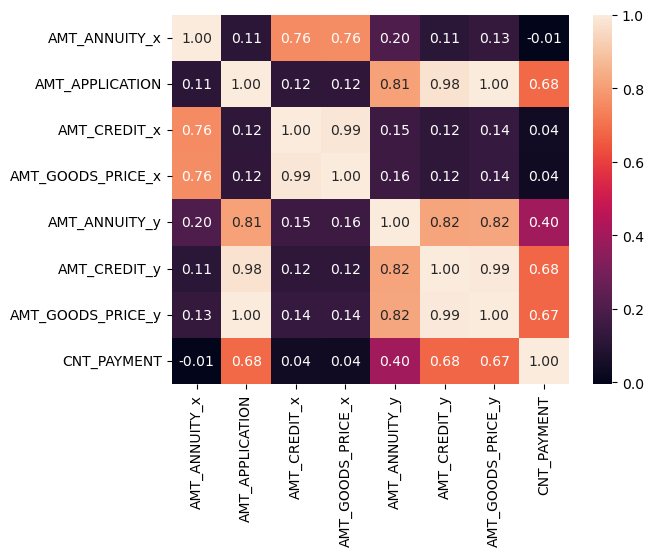

In [220]:
sns.heatmap(data = num_cols_corr, annot = True, fmt='.2f')

In [221]:
num_cols_corr[num_cols_corr <= 0.99].unstack().sort_values(ascending = False).head(22)

AMT_CREDIT_x       AMT_GOODS_PRICE_x    0.986310
AMT_GOODS_PRICE_x  AMT_CREDIT_x         0.986310
AMT_APPLICATION    AMT_CREDIT_y         0.975683
AMT_CREDIT_y       AMT_APPLICATION      0.975683
AMT_GOODS_PRICE_y  AMT_ANNUITY_y        0.822204
AMT_ANNUITY_y      AMT_GOODS_PRICE_y    0.822204
AMT_CREDIT_y       AMT_ANNUITY_y        0.817977
AMT_ANNUITY_y      AMT_CREDIT_y         0.817977
AMT_APPLICATION    AMT_ANNUITY_y        0.809972
AMT_ANNUITY_y      AMT_APPLICATION      0.809972
AMT_ANNUITY_x      AMT_GOODS_PRICE_x    0.762251
AMT_GOODS_PRICE_x  AMT_ANNUITY_x        0.762251
AMT_ANNUITY_x      AMT_CREDIT_x         0.758441
AMT_CREDIT_x       AMT_ANNUITY_x        0.758441
CNT_PAYMENT        AMT_APPLICATION      0.683056
AMT_APPLICATION    CNT_PAYMENT          0.683056
CNT_PAYMENT        AMT_CREDIT_y         0.675539
AMT_CREDIT_y       CNT_PAYMENT          0.675539
AMT_GOODS_PRICE_y  CNT_PAYMENT          0.674547
CNT_PAYMENT        AMT_GOODS_PRICE_y    0.674547
AMT_ANNUITY_y      C

#### Inference from the heat map: 
Below columns are highly correlated

1. AMT_CREDIT_x       AMT_GOODS_PRICE_x
2. AMT_APPLICATION    AMT_CREDIT_y     
3. AMT_GOODS_PRICE_y  AMT_ANNUITY_y 
4. AMT_CREDIT_y       AMT_ANNUITY_y
5. AMT_ANNUITY_y      AMT_APPLICATION



### 3.3 Bivariate analysis

### Continuous V/S Continuous columns

#### Analysing AMT_APPLICATION, AMT_GOODS_PRICE_y, NAME_CONTRACT_STATUS

<Axes: xlabel='AMT_APPLICATION', ylabel='AMT_GOODS_PRICE_y'>

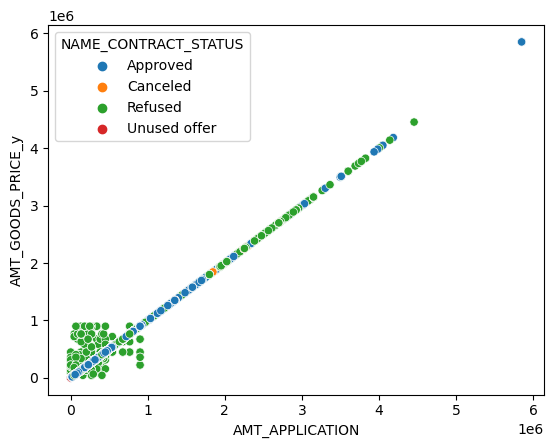

In [222]:
sns.scatterplot(x = final['AMT_APPLICATION'], y = final['AMT_GOODS_PRICE_y'] , data = final,hue = 'NAME_CONTRACT_STATUS')

#### Inference on the above analysis:
    Loan amount mentioned in the application is strongly correlated with the value of goods price.

#### Analysing AMT_APPLICATION, AMT_CREDIT_y, NAME_CONTRACT_STATUS

In [223]:
sns.scatterplot(x = final['AMT_APPLICATION'], y = final['AMT_CREDIT_y'] , data = final,hue = 'NAME_CONTRACT_STATUS')

<Axes: xlabel='AMT_APPLICATION', ylabel='AMT_CREDIT_y'>

Error in callback <function flush_figures at 0x0000018B827F2520> (for post_execute):



KeyboardInterrupt



#### Inference on the above analysis:
     Since outliers are not treated, we could see a little clumpy graph from which we can assume that credit amount is      strongly correlated with amount in application

#### Analysing Age_group,NAME_CONTRACT_STATUS

<Axes: xlabel='Age_group', ylabel='count'>

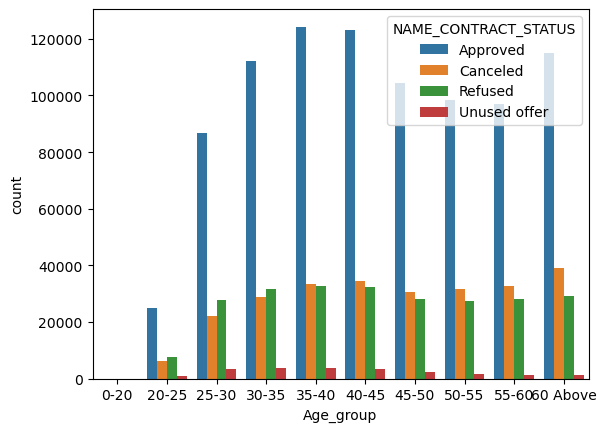

In [224]:
sns.countplot(data=final,x='Age_group',hue='NAME_CONTRACT_STATUS')

#### Inference on the above analysis:
     Applicants under the age 30 to 35 and 35 to 40 has got their loans approved in majority and people between age 20 to 25 and 60 above has got least refusal.

#### Analysing NAME_FAMILY_STATUS, NAME_CONTRACT_STATUS

<Axes: xlabel='NAME_FAMILY_STATUS', ylabel='count'>

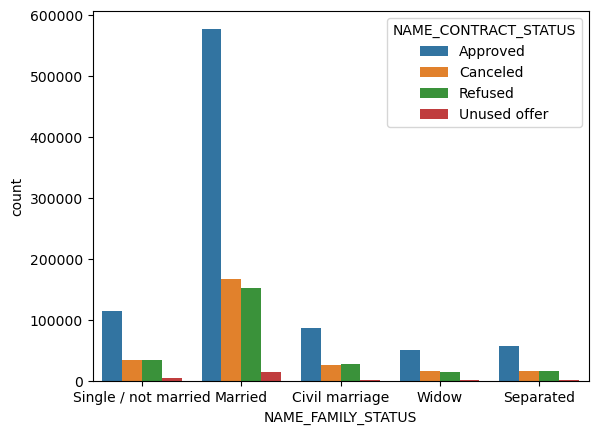

In [225]:
sns.countplot(data=final,x='NAME_FAMILY_STATUS',hue='NAME_CONTRACT_STATUS')

#### Inference on the above analysis:
     Married people has got majority of loans approved.

#### Analysing NAME_CLIENT_TYPE, NAME_CONTRACT_STATUS

<Axes: xlabel='NAME_CLIENT_TYPE', ylabel='count'>

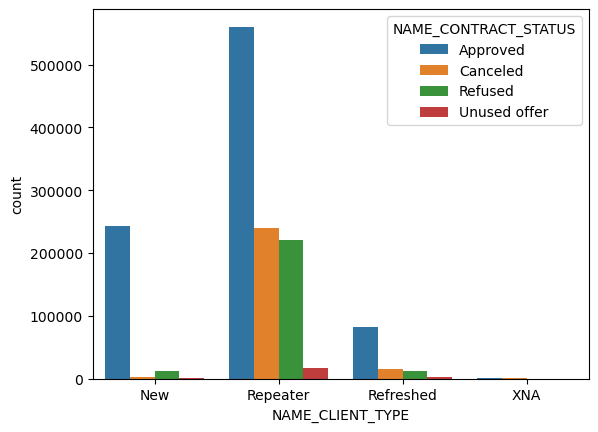

In [226]:
sns.countplot(data=final,x='NAME_CLIENT_TYPE',hue='NAME_CONTRACT_STATUS')

#### Inference on the above analysis:
     Repeater has got majority of loans approved.

### Analysing NAME_CONTRACT_TYPE_x, NAME_CONTRACT_STATUS

<Axes: xlabel='NAME_CONTRACT_TYPE_x', ylabel='count'>

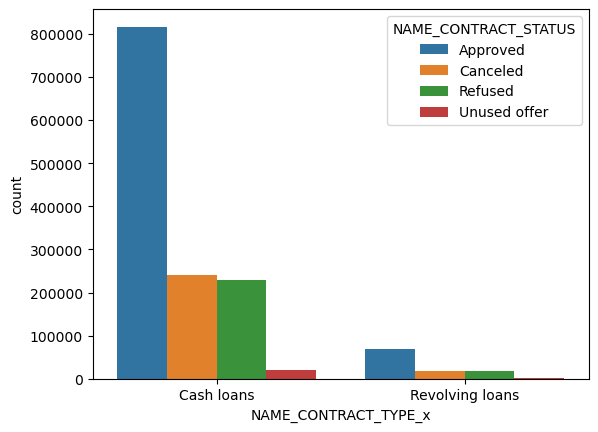

In [227]:
sns.countplot(data=final,x='NAME_CONTRACT_TYPE_x',hue='NAME_CONTRACT_STATUS')

#### Inference on the above analysis:
     Cash loans has got approved large number of times.

In [5]:
!jupyter nbconvert --to webpdf --allow-chromium-download EDA.ipynb

[NbConvertApp] Converting notebook EDA.ipynb to webpdf
[NbConvertApp] Building PDF
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 3660831 bytes to EDA.pdf
